C:\Users\laral\AppData\Local\Temp\ipykernel_23684\3512641168.py:148: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(


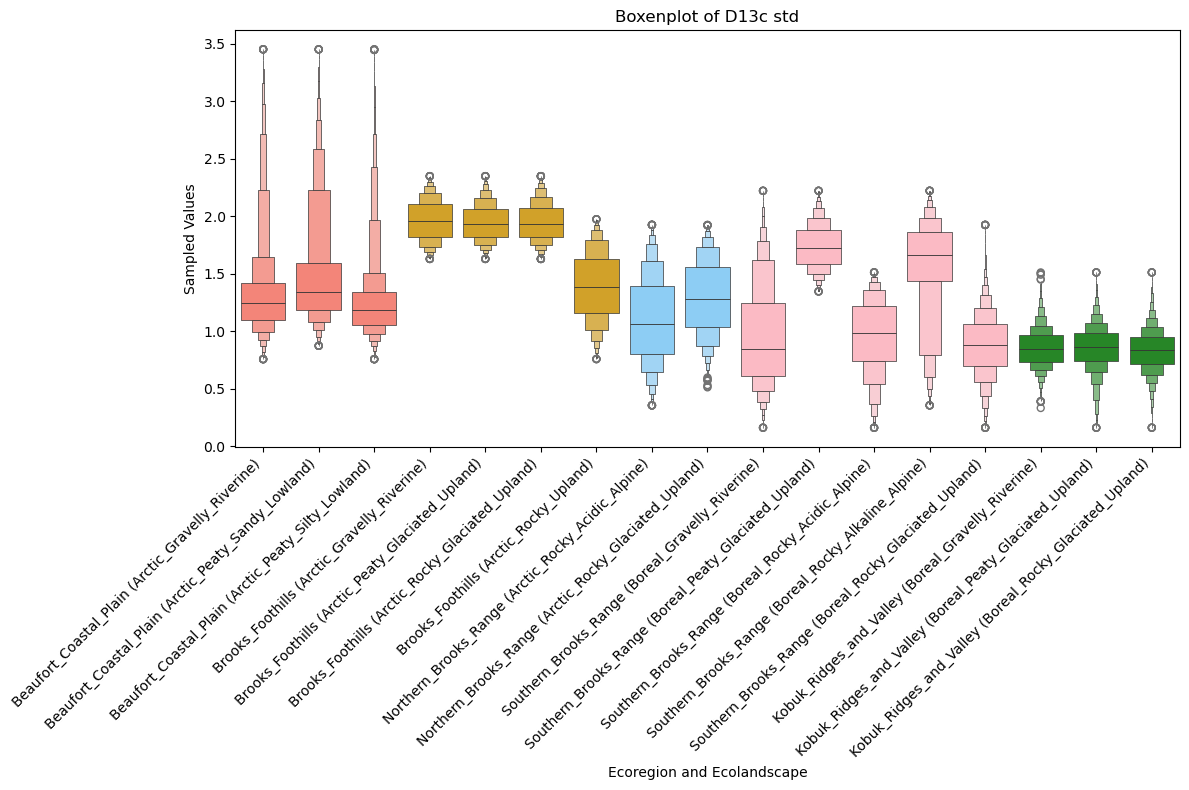

In [2]:
import os
import rasterio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
np.random.seed(42)
# Folder containing the .tif files
# Folder containing the .tif files
tif_folder = r'D:\wenqu\chapter1_2\updated_aviris\AVIRIS_trait_map2\split_raster\d13c\std'

# Dictionary to map each .tif file to its corresponding ecoregion and sample points
tif_info = {
    'Beaufort_Coastal_Plain_Arctic_Gravelly_Riverine_site6ab_d13c_std_masked.tif':('Beaufort_Coastal_Plain', 'Arctic_Gravelly_Riverine', 33300),
    'Beaufort_Coastal_Plain_Arctic_Gravelly_Riverine_site6c_d13c_std_masked.tif':('Beaufort_Coastal_Plain', 'Arctic_Gravelly_Riverine',183250),   
    'Beaufort_Coastal_Plain_Arctic_Gravelly_Riverine_site7_d13c_std_masked.tif':('Beaufort_Coastal_Plain', 'Arctic_Gravelly_Riverine', 182240),  
    
    'Beaufort_Coastal_Plain_Arctic_Peaty_Sandy_Lowland_site6ab_d13c_std_masked.tif':('Beaufort_Coastal_Plain', 'Arctic_Peaty_Sandy_Lowland', 20150),
    'Beaufort_Coastal_Plain_Arctic_Peaty_Sandy_Lowland_site7_d13c_std_masked.tif':('Beaufort_Coastal_Plain', 'Arctic_Peaty_Sandy_Lowland', 182240),  
    
    'Beaufort_Coastal_Plain_Arctic_Peaty_Silty_Lowland_site6ab_d13c_std_masked.tif':('Beaufort_Coastal_Plain', 'Arctic_Peaty_Silty_Lowland', 33300),   
    'Beaufort_Coastal_Plain_Arctic_Peaty_Silty_Lowland_site6c_d13c_std_masked.tif':('Beaufort_Coastal_Plain', 'Arctic_Peaty_Silty_Lowland', 183250), 
    'Beaufort_Coastal_Plain_Arctic_Peaty_Silty_Lowland_site7_d13c_std_masked.tif':('Beaufort_Coastal_Plain', 'Arctic_Peaty_Silty_Lowland', 182240),
    

    'Brooks_Foothills_Arctic_Gravelly_Riverine_site4a_d13c_std_masked.tif':( 'Brooks_Foothills','Arctic_Gravelly_Riverine',369900),
    'Brooks_Foothills_Arctic_Peaty_Glaciated_Upland_site4a_d13c_std_masked.tif':('Brooks_Foothills','Arctic_Peaty_Glaciated_Upland',369900),
    'Brooks_Foothills_Arctic_Rocky_Glaciated_Upland_site4a_d13c_std_masked.tif':('Brooks_Foothills','Arctic_Rocky_Glaciated_Upland',229460),
    'Brooks_Foothills_Arctic_Rocky_Upland_site4a_d13c_std_masked.tif':('Brooks_Foothills','Arctic_Rocky_Upland',12970),
    'Brooks_Foothills_Arctic_Rocky_Upland_site6c_d13c_std_masked.tif':('Brooks_Foothills','Arctic_Rocky_Upland',17740),


    'Northern_Brooks_Range_Arctic_Rocky_Acidic_Alpine_site3b_d13c_std_masked.tif':('Northern_Brooks_Range','Arctic_Rocky_Acidic_Alpine',607120),
    'Northern_Brooks_Range_Arctic_Rocky_Glaciated_Upland_site3b_d13c_std_masked.tif':('Northern_Brooks_Range','Arctic_Rocky_Glaciated_Upland',392870),



    'Southern_Brooks_Range_Boreal_Gravelly_Riverine_site4b_d13c_std_masked.tif':('Southern_Brooks_Range','Boreal_Gravelly_Riverine',70720),
    'Southern_Brooks_Range_Boreal_Gravelly_Riverine_site2a_d13c_std_masked.tif':('Southern_Brooks_Range','Boreal_Gravelly_Riverine',165160),
    'Southern_Brooks_Range_Boreal_Gravelly_Riverine_site3b_d13c_std_masked.tif':('Southern_Brooks_Range','Boreal_Gravelly_Riverine',61660),
    'Southern_Brooks_Range_Boreal_Peaty_Glaciated_Upland_site4b_d13c_std_masked.tif':('Southern_Brooks_Range','Boreal_Peaty_Glaciated_Upland',81620),
    'Southern_Brooks_Range_Boreal_Rocky_Acidic_Alpine_site2a_d13c_std_masked.tif':('Southern_Brooks_Range','Boreal_Rocky_Acidic_Alpine',172720),
    'Southern_Brooks_Range_Boreal_Rocky_Acidic_Alpine_site3b_d13c_std_masked.tif':('Southern_Brooks_Range','Boreal_Rocky_Acidic_Alpine',48130),
    'Southern_Brooks_Range_Boreal_Rocky_Alkaline_Alpine_site4b_d13c_std_masked.tif':('Southern_Brooks_Range','Boreal_Rocky_Alkaline_Alpine',137300),
    'Southern_Brooks_Range_Boreal_Rocky_Alkaline_Alpine_site3b_d13c_std_masked.tif':('Southern_Brooks_Range','Boreal_Rocky_Alkaline_Alpine',34920),
    'Southern_Brooks_Range_Boreal_Rocky_Glaciated_Upland_site2a_d13c_std_masked.tif':('Southern_Brooks_Range','Boreal_Rocky_Glaciated_Upland',165230),
    'Southern_Brooks_Range_Boreal_Rocky_Glaciated_Upland_site3b_d13c_std_masked.tif':('Southern_Brooks_Range','Boreal_Rocky_Glaciated_Upland',62490),


    'Kobuk_Ridges_and_Valley_Boreal_Gravelly_Riverine_site2a_d13c_std_masked.tif':('Kobuk_Ridges_and_Valley','Boreal_Gravelly_Riverine',364920),
    'Kobuk_Ridges_and_Valley_Boreal_Peaty_Glaciated_Upland_site2a_d13c_std_masked.tif':('Kobuk_Ridges_and_Valley','Boreal_Peaty_Glaciated_Upland',371310),
    'Kobuk_Ridges_and_Valley_Boreal_Rocky_Glaciated_Upland_site2a_d13c_std_masked.tif':('Kobuk_Ridges_and_Valley','Boreal_Rocky_Glaciated_Upland',263750)

}


# List to store the summarized data for each unique ecoregion and ecolandscape combination
ecoregion_values = {}

# Loop through all .tif files and sample the specified number of points
for tif_file, (ecoregion, ecolandscape, n_samples) in tif_info.items():
    tif_path = os.path.join(tif_folder, tif_file)
    
    if n_samples == 0:
        continue  # Skip files with zero sample points
    
    # Open the .tif file
    with rasterio.open(tif_path) as src:
        data = src.read(1)  # Read the raster data (assuming the first band)
        valid_mask = ~np.isnan(data)
        valid_indices = np.column_stack(np.where(valid_mask))
        
        if len(valid_indices) >= int(n_samples):
            sampled_indices = valid_indices[np.random.choice(len(valid_indices), int(n_samples), replace=False)]
        else:
            sampled_indices = valid_indices  # Take all points if less than required
        
        sampled_values = data[sampled_indices[:, 0], sampled_indices[:, 1]]
        
        key = (ecoregion, ecolandscape)
        if key not in ecoregion_values:
            ecoregion_values[key] = []
        
        ecoregion_values[key].extend(sampled_values)

# Convert the sampled values to a DataFrame for plotting
df_samples = pd.DataFrame({
    'Ecoregion': [ecoregion for (ecoregion, ecolandscape) in ecoregion_values.keys() for _ in ecoregion_values[(ecoregion, ecolandscape)]],
    'Ecolandscape': [ecolandscape for (ecoregion, ecolandscape) in ecoregion_values.keys() for _ in ecoregion_values[(ecoregion, ecolandscape)]],
    'Sampled Values': [value for values in ecoregion_values.values() for value in values]
})

# Combine Ecoregion and Ecolandscape for unique grouping
df_samples['Group'] = df_samples['Ecoregion'] + " (" + df_samples['Ecolandscape'] + ")"

ecoregion_values = {}

# Loop through all .tif files and sample the specified number of points
for tif_file, (ecoregion, ecolandscape, n_samples) in tif_info.items():
    tif_path = os.path.join(tif_folder, tif_file)
    
    if n_samples == 0:
        continue  # Skip files with zero sample points
    
    # Open the .tif file
    with rasterio.open(tif_path) as src:
        data = src.read(1)  # Read the raster data (assuming the first band)
        valid_mask = ~np.isnan(data)
        valid_indices = np.column_stack(np.where(valid_mask))
        
        if len(valid_indices) >= int(n_samples):
            sampled_indices = valid_indices[np.random.choice(len(valid_indices), int(n_samples), replace=False)]
        else:
            sampled_indices = valid_indices  # Take all points if less than required
        
        sampled_values = data[sampled_indices[:, 0], sampled_indices[:, 1]]
        
        key = (ecoregion, ecolandscape)
        if key not in ecoregion_values:
            ecoregion_values[key] = []
        
        ecoregion_values[key].extend(sampled_values)

# Convert the sampled values to a DataFrame for plotting
df_samples = pd.DataFrame({
    'Ecoregion': [ecoregion for (ecoregion, ecolandscape) in ecoregion_values.keys() for _ in ecoregion_values[(ecoregion, ecolandscape)]],
    'Ecolandscape': [ecolandscape for (ecoregion, ecolandscape) in ecoregion_values.keys() for _ in ecoregion_values[(ecoregion, ecolandscape)]],
    'Sampled Values': [value for values in ecoregion_values.values() for value in values]
})

# Combine Ecoregion and Ecolandscape for unique grouping
df_samples['Group'] = df_samples['Ecoregion'] + " (" + df_samples['Ecolandscape'] + ")"

# Define a specific color palette for each ecoregion with underscores matching the format in df_samples
color_map = {
    'Beaufort_Coastal_Plain': 'salmon',
    'Brooks_Foothills': 'goldenrod',
    'Northern_Brooks_Range': 'lightskyblue',
    'Southern_Brooks_Range': 'lightpink',
    'Kobuk_Ridges_and_Valley': 'forestgreen'
}

# Apply the specified color for each unique ecoregion across its different ecolandscapes
df_samples['Color'] = df_samples['Ecoregion'].map(lambda x: color_map.get(x, 'black'))

# Create the boxenplot grouped by the combined 'Group' (Ecoregion + Ecolandscape)
plt.figure(figsize=(12, 8))
sns.boxenplot(
    data=df_samples, 
    x='Group', 
    y='Sampled Values', 
    palette=df_samples.set_index('Group')['Color'].to_dict(),
    linewidth=.5, 
    saturation=0.9,
    trust_alpha=0.1
)

plt.title('Boxenplot of D13c std')
plt.xlabel('Ecoregion and Ecolandscape')
plt.ylabel('Sampled Values')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig(r'D:\wenqu\chapter1_2\figures\ecolandsacpe_figures\Boxenplot of D13c yamx by Ecolandscape.png', dpi=300, bbox_inches='tight')
plt.show()


In [2]:
import os
import rasterio
import numpy as np
import pandas as pd

np.random.seed(42)

# Folder containing the .tif files
tif_folder = r'D:\wenqu\chapter1_2\figures\ecoregion\eco_lands\d13c_ymax'

# Dictionary to map each .tif file to its corresponding ecoregion and sample points
tif_info = {
    'Beaufort_Coastal_Plain_Arctic_Gravelly_Riverine_site6ab_d13c_ymax.tif': ('Beaufort_Coastal_Plain', 33497),
    'Beaufort_Coastal_Plain_Arctic_Gravelly_Riverine_site6c_d13c_ymax.tif': ('Beaufort_Coastal_Plain', 181197),   
    'Beaufort_Coastal_Plain_Arctic_Gravelly_Riverine_site7_d13c_ymax.tif': ('Beaufort_Coastal_Plain', 183403),    
    'Beaufort_Coastal_Plain_Arctic_Peaty_Sandy_Lowland_site6ab_d13c_ymax.tif': ('Beaufort_Coastal_Plain', 20401),
    'Beaufort_Coastal_Plain_Arctic_Peaty_Sandy_Lowland_site7_d13c_ymax.tif': ('Beaufort_Coastal_Plain', 183403),  
    'Beaufort_Coastal_Plain_Arctic_Peaty_Silty_Lowland_site6ab_d13c_ymax.tif': ('Beaufort_Coastal_Plain', 33497),   
    'Beaufort_Coastal_Plain_Arctic_Peaty_Silty_Lowland_site6c_d13c_ymax.tif': ('Beaufort_Coastal_Plain', 181197), 
    'Beaufort_Coastal_Plain_Arctic_Peaty_Silty_Lowland_site7_d13c_ymax.tif': ('Beaufort_Coastal_Plain', 183403),
    'Brooks_Foothills_Arctic_Rocky_Glaciated_Upland_site4a_d13c_ymax.tif': ('Brooks_Foothills', 81225),
    'Brooks_Foothills_Arctic_Rocky_Glaciated_Upland_site4b_d13c_ymax.tif': ('Brooks_Foothills', 220328),
    'Brooks_Foothills_Arctic_Gravelly_Riverine_site4a_d13c_ymax.tif': ('Brooks_Foothills', 144299),
    'Brooks_Foothills_Arctic_Gravelly_Riverine_site4b_d13c_ymax.tif': ('Brooks_Foothills', 220328),
    'Brooks_Foothills_Arctic_Peaty_Glaciated_Upland_site4a_d13c_ymax.tif': ('Brooks_Foothills', 144299),  
    'Brooks_Foothills_Arctic_Peaty_Glaciated_Upland_site4b_d13c_ymax.tif': ('Brooks_Foothills', 169308),
    'Brooks_Foothills_Arctic_Rocky_Upland_site4a_d13c_ymax.tif': ('Brooks_Foothills', 13812),   
    'Brooks_Foothills_Arctic_Rocky_Upland_site6c_d13c_ymax.tif': ('Brooks_Foothills', 6397), 
    'Northern_Brooks_Range_Arctic_Rocky_Acidic_Alpine_site3b_d13c_ymax.tif': ('Northern_Brooks_Range', 607152), 
    'Northern_Brooks_Range_Arctic_Rocky_Glaciated_Upland_site3b_d13c_ymax.tif': ('Northern_Brooks_Range', 392847), 
    'Southern_Brooks_Range_Boreal_Gravelly_Riverine_site2a_c_1b_d13c_ymax.tif': ('Southern_Brooks_Range', 232652),  
    'Southern_Brooks_Range_Boreal_Gravelly_Riverine_site3b_d13c_ymax.tif': ('Southern_Brooks_Range', 86845), 
    'Southern_Brooks_Range_Boreal_Rocky_Acidic_Alpine_site2a_c_1b_d13c_ymax.tif': ('Southern_Brooks_Range', 242746), 
    'Southern_Brooks_Range_Boreal_Rocky_Acidic_Alpine_site3b_d13c_ymax.tif': ('Southern_Brooks_Range', 67786), 
    'Southern_Brooks_Range_Boreal_Rocky_Alkaline_Alpine_site3b_d13c_ymax.tif': ('Southern_Brooks_Range', 49196),  
    'Southern_Brooks_Range_Boreal_Rocky_Glaciated_Upland_site2a_c_1b_d13c_ymax.tif': ('Southern_Brooks_Range', 232747),  
    'Southern_Brooks_Range_Boreal_Rocky_Glaciated_Upland_site3b_d13c_ymax.tif': ('Southern_Brooks_Range', 88024),
    'Kobuk_Ridges_and_Valley_Boreal_Gravelly_Riverine_site2a_c_1b_d13c_ymax.tif': ('Kobuk_Ridges_and_Valley', 356712),
    'Kobuk_Ridges_and_Valley_Boreal_Peaty_Glaciated_Upland_site2a_c_1b_d13c_ymax.tif': ('Kobuk_Ridges_and_Valley', 363506),
    'Kobuk_Ridges_and_Valley_Boreal_Rocky_Glaciated_Upland_site2a_c_1b_d13c_ymax.tif': ('Kobuk_Ridges_and_Valley', 279781)
}

# Dictionary to store values per ecoregion
ecoregion_values = {}

# Process each file and sample
for tif_file, (ecoregion, n_samples) in tif_info.items():
    tif_path = os.path.join(tif_folder, tif_file)

    if n_samples == 0:
        continue

    try:
        with rasterio.open(tif_path) as src:
            data = src.read(1)
            valid_mask = ~np.isnan(data)
            valid_indices = np.column_stack(np.where(valid_mask))

            if valid_indices.size == 0:
                print(f"No valid data in {tif_file}, skipping.")
                continue

            if len(valid_indices) >= int(n_samples):
                sampled_indices = valid_indices[np.random.choice(len(valid_indices), int(n_samples), replace=False)]
            else:
                sampled_indices = valid_indices

            sampled_values = data[sampled_indices[:, 0], sampled_indices[:, 1]]

            if sampled_values.size == 0:
                print(f"No sampled values in {tif_file}, skipping.")
                continue

            if ecoregion not in ecoregion_values:
                ecoregion_values[ecoregion] = []

            ecoregion_values[ecoregion].extend(sampled_values)

    except Exception as e:
        print(f"Error processing {tif_file}: {e}")
        continue

# Convert results to a DataFrame
df_samples = pd.DataFrame({
    'Ecoregion': [eco for eco, vals in ecoregion_values.items() for _ in vals],
    'Sampled_Value': [val for vals in ecoregion_values.values() for val in vals]
})

# Print unique ecoregions included in the output
print("Ecoregions included in the output:", df_samples['Ecoregion'].unique())

# Save the data to a CSV
output_csv_path = r'D:\wenqu\chapter1_2\figures\ecoregion\statistic_csv\d13c_ymax_sampled_values.csv'
df_samples.to_csv(output_csv_path, index=False)
print(f"Sampled data saved to {output_csv_path}")


No valid data in Brooks_Foothills_Arctic_Gravelly_Riverine_site4b_d13c_ymax.tif, skipping.
Ecoregions included in the output: ['Beaufort_Coastal_Plain' 'Brooks_Foothills' 'Northern_Brooks_Range'
 'Southern_Brooks_Range' 'Kobuk_Ridges_and_Valley']
Sampled data saved to D:\wenqu\chapter1_2\figures\ecoregion\statistic_csv\d13c_ymax_sampled_values.csv


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be

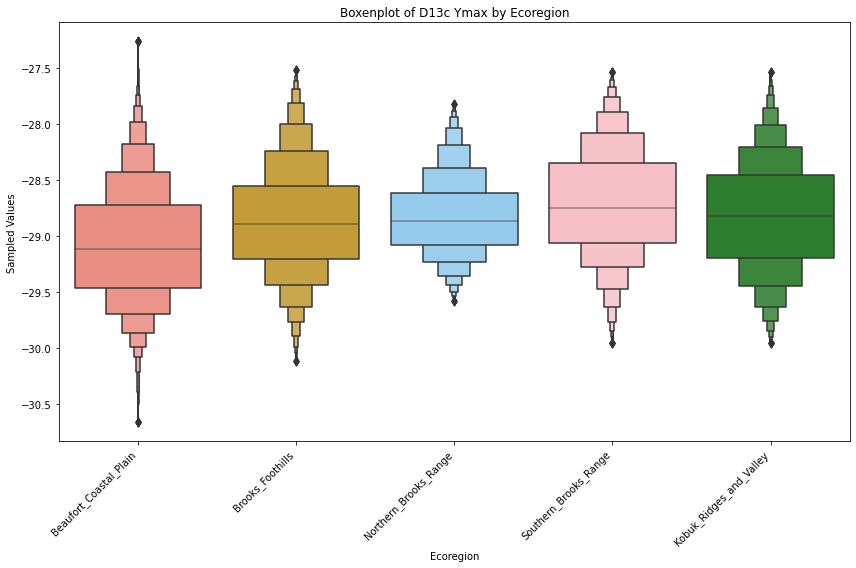

In [2]:
import os
import rasterio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(42)

# Folder containing the .tif files
tif_folder = r'D:\wenqu\chapter1_2\figures\ecoregion\eco_lands\d13c_ymax'

# Dictionary to map each .tif file to its corresponding ecoregion and sample points
tif_info = {
    'Beaufort_Coastal_Plain_Arctic_Gravelly_Riverine_site6ab_d13c_ymax.tif': ('Beaufort_Coastal_Plain', 33497),
    'Beaufort_Coastal_Plain_Arctic_Gravelly_Riverine_site6c_d13c_ymax.tif': ('Beaufort_Coastal_Plain', 181197),   
    'Beaufort_Coastal_Plain_Arctic_Gravelly_Riverine_site7_d13c_ymax.tif': ('Beaufort_Coastal_Plain', 183403),    
    'Beaufort_Coastal_Plain_Arctic_Peaty_Sandy_Lowland_site6ab_d13c_ymax.tif': ('Beaufort_Coastal_Plain', 20401),
    'Beaufort_Coastal_Plain_Arctic_Peaty_Sandy_Lowland_site7_d13c_ymax.tif': ('Beaufort_Coastal_Plain', 183403),  
    'Beaufort_Coastal_Plain_Arctic_Peaty_Silty_Lowland_site6ab_d13c_ymax.tif': ('Beaufort_Coastal_Plain', 33497),   
    'Beaufort_Coastal_Plain_Arctic_Peaty_Silty_Lowland_site6c_d13c_ymax.tif': ('Beaufort_Coastal_Plain', 181197), 
    'Beaufort_Coastal_Plain_Arctic_Peaty_Silty_Lowland_site7_d13c_ymax.tif': ('Beaufort_Coastal_Plain', 183403),
    'Brooks_Foothills_Arctic_Rocky_Glaciated_Upland_site4a_d13c_ymax.tif': ('Brooks_Foothills', 81225),
    'Brooks_Foothills_Arctic_Rocky_Glaciated_Upland_site4b_d13c_ymax.tif': ('Brooks_Foothills', 220328),
    'Brooks_Foothills_Arctic_Gravelly_Riverine_site4a_d13c_ymax.tif': ('Brooks_Foothills', 144299),
    'Brooks_Foothills_Arctic_Gravelly_Riverine_site4b_d13c_ymax.tif': ('Brooks_Foothills', 220328),
    'Brooks_Foothills_Arctic_Peaty_Glaciated_Upland_site4a_d13c_ymax.tif': ('Brooks_Foothills', 144299),  
    'Brooks_Foothills_Arctic_Peaty_Glaciated_Upland_site4b_d13c_ymax.tif': ('Brooks_Foothills', 169308),
    'Brooks_Foothills_Arctic_Rocky_Upland_site4a_d13c_ymax.tif': ('Brooks_Foothills', 13812),   
    'Brooks_Foothills_Arctic_Rocky_Upland_site6c_d13c_ymax.tif': ('Brooks_Foothills', 6397), 
    'Northern_Brooks_Range_Arctic_Rocky_Acidic_Alpine_site3b_d13c_ymax.tif': ('Northern_Brooks_Range', 607152), 
    'Northern_Brooks_Range_Arctic_Rocky_Glaciated_Upland_site3b_d13c_ymax.tif': ('Northern_Brooks_Range', 392847), 
    'Southern_Brooks_Range_Boreal_Gravelly_Riverine_site2a_c_1b_d13c_ymax.tif': ('Southern_Brooks_Range', 232652),  
    'Southern_Brooks_Range_Boreal_Gravelly_Riverine_site3b_d13c_ymax.tif': ('Southern_Brooks_Range', 86845), 
    'Southern_Brooks_Range_Boreal_Rocky_Acidic_Alpine_site2a_c_1b_d13c_ymax.tif': ('Southern_Brooks_Range', 242746), 
    'Southern_Brooks_Range_Boreal_Rocky_Acidic_Alpine_site3b_d13c_ymax.tif': ('Southern_Brooks_Range', 67786), 
    'Southern_Brooks_Range_Boreal_Rocky_Alkaline_Alpine_site3b_d13c_ymax.tif': ('Southern_Brooks_Range', 49196),  
    'Southern_Brooks_Range_Boreal_Rocky_Glaciated_Upland_site2a_c_1b_d13c_ymax.tif': ('Southern_Brooks_Range', 232747),  
    'Southern_Brooks_Range_Boreal_Rocky_Glaciated_Upland_site3b_d13c_ymax.tif': ('Southern_Brooks_Range', 88024),
    'Kobuk_Ridges_and_Valley_Boreal_Gravelly_Riverine_site2a_c_1b_d13c_ymax.tif': ('Kobuk_Ridges_and_Valley', 356712),
    'Kobuk_Ridges_and_Valley_Boreal_Peaty_Glaciated_Upland_site2a_c_1b_d13c_ymax.tif': ('Kobuk_Ridges_and_Valley', 363506),
    'Kobuk_Ridges_and_Valley_Boreal_Rocky_Glaciated_Upland_site2a_c_1b_d13c_ymax.tif': ('Kobuk_Ridges_and_Valley', 279781)
}

# List to store the summarized data for each unique ecoregion
ecoregion_values = {}

# Loop through all .tif files and sample the specified number of points
for tif_file, (ecoregion, n_samples) in tif_info.items():
    tif_path = os.path.join(tif_folder, tif_file)
    
    if n_samples == 0:
        continue  # Skip files with zero sample points
    
    # Open the .tif file
    with rasterio.open(tif_path) as src:
        data = src.read(1)  # Read the raster data (assuming the first band)
        valid_mask = ~np.isnan(data)
        valid_indices = np.column_stack(np.where(valid_mask))
        
        if len(valid_indices) >= int(n_samples):
            sampled_indices = valid_indices[np.random.choice(len(valid_indices), int(n_samples), replace=False)]
        else:
            sampled_indices = valid_indices  # Take all points if less than required
        
        sampled_values = data[sampled_indices[:, 0], sampled_indices[:, 1]]
        
        if ecoregion not in ecoregion_values:
            ecoregion_values[ecoregion] = []
        
        ecoregion_values[ecoregion].extend(sampled_values)

# Convert the sampled values to a DataFrame for plotting
df_samples = pd.DataFrame({
    'Ecoregion': [ecoregion for ecoregion in ecoregion_values.keys() for _ in ecoregion_values[ecoregion]],
    'Sampled Values': [value for values in ecoregion_values.values() for value in values]
})

# Define a specific color palette for each ecoregion
color_map = {
    'Beaufort_Coastal_Plain': 'salmon',
    'Brooks_Foothills': 'goldenrod',
    'Northern_Brooks_Range': 'lightskyblue',
    'Southern_Brooks_Range': 'lightpink',
    'Kobuk_Ridges_and_Valley': 'forestgreen'
}

# Apply the specified color for each ecoregion
df_samples['Color'] = df_samples['Ecoregion'].map(lambda x: color_map.get(x, 'black'))

# Create a palette dictionary for Seaborn
palette = {ecoregion: color_map[ecoregion] for ecoregion in df_samples['Ecoregion'].unique()}

# Create the boxenplot grouped by ecoregion
plt.figure(figsize=(12, 8))
sns.boxenplot(
    data=df_samples, 
    x='Ecoregion', 
    y='Sampled Values', 
    palette=palette
)

plt.title('Boxenplot of D13c Ymax by Ecoregion')
plt.xlabel('Ecoregion')
plt.ylabel('Sampled Values')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig(r'D:\wenqu\chapter1_2\figures\ecolandsacpe_figures\Boxenplot of D13c Ymax by Ecoregion.png', dpi=300, bbox_inches='tight')
plt.show()


# D13 std

C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be

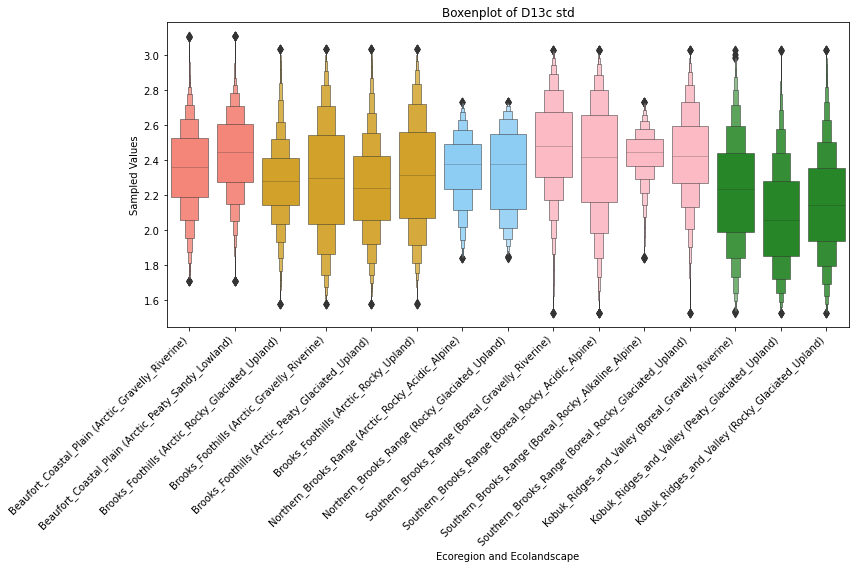

In [3]:
import os
import rasterio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
np.random.seed(42)
# Folder containing the .tif files
tif_folder = r'D:\wenqu\chapter1_2\figures\ecoregion\eco_lands\d13c_std'

# Dictionary to map each .tif file to its corresponding ecoregion and sample points
tif_info = {
'Beaufort_Coastal_Plain_Arctic_Gravelly_Riverine_site6ab_d13c_std.tif':('Beaufort_Coastal_Plain', 'Arctic_Gravelly_Riverine', 33497),
'Beaufort_Coastal_Plain_Arctic_Gravelly_Riverine_site6c_d13c_std.tif':('Beaufort_Coastal_Plain', 'Arctic_Gravelly_Riverine',181197),   
'Beaufort_Coastal_Plain_Arctic_Gravelly_Riverine_site7_d13c_std.tif':('Beaufort_Coastal_Plain', 'Arctic_Gravelly_Riverine', 183403),    
'Beaufort_Coastal_Plain_Arctic_Peaty_Sandy_Lowland_site6ab_d13c_std.tif':('Beaufort_Coastal_Plain', 'Arctic_Peaty_Sandy_Lowland', 20401),
'Beaufort_Coastal_Plain_Arctic_Peaty_Sandy_Lowland_site7_d13c_std.tif':('Beaufort_Coastal_Plain', 'Arctic_Peaty_Sandy_Lowland', 183403),  
'Beaufort_Coastal_Plain_Arctic_Peaty_Silty_Lowland_site6ab_d13c_std.tif':('Beaufort_Coastal_Plain', 'Arctic_Peaty_Sandy_Lowland', 33497),   
'Beaufort_Coastal_Plain_Arctic_Peaty_Silty_Lowland_site6c_d13c_std.tif':('Beaufort_Coastal_Plain', 'Arctic_Peaty_Sandy_Lowland', 181197), 
'Beaufort_Coastal_Plain_Arctic_Peaty_Silty_Lowland_site7_d13c_std.tif':('Beaufort_Coastal_Plain', 'Arctic_Peaty_Sandy_Lowland', 183403),
'Brooks_Foothills_Arctic_Rocky_Glaciated_Upland_site4a_d13c_std.tif':('Brooks_Foothills','Arctic_Rocky_Glaciated_Upland', 81225),
'Brooks_Foothills_Arctic_Rocky_Glaciated_Upland_site4b_d13c_std.tif':('Brooks_Foothills', 'Arctic_Rocky_Glaciated_Upland', 220328),
'Brooks_Foothills_Arctic_Gravelly_Riverine_site4a_d13c_std.tif':('Brooks_Foothills', 'Arctic_Gravelly_Riverine', 144299),
'Brooks_Foothills_Arctic_Gravelly_Riverine_site4b_d13c_std.tif':('Brooks_Foothills', 'Arctic_Gravelly_Riverine', 220328),
'Brooks_Foothills_Arctic_Peaty_Glaciated_Upland_site4a_d13c_std.tif':('Brooks_Foothills', 'Arctic_Peaty_Glaciated_Upland', 144299),  
'Brooks_Foothills_Arctic_Peaty_Glaciated_Upland_site4b_d13c_std.tif':('Brooks_Foothills', 'Arctic_Peaty_Glaciated_Upland', 169308),
'Brooks_Foothills_Arctic_Rocky_Upland_site4a_d13c_std.tif':('Brooks_Foothills', 'Arctic_Rocky_Upland', 13812),   
'Brooks_Foothills_Arctic_Rocky_Upland_site6c_d13c_std.tif':('Brooks_Foothills', 'Arctic_Rocky_Upland', 6397), 
'Northern_Brooks_Range_Arctic_Rocky_Acidic_Alpine_site3b_d13c_std.tif':('Northern_Brooks_Range', 'Arctic_Rocky_Acidic_Alpine', 607152), 
'Northern_Brooks_Range_Arctic_Rocky_Glaciated_Upland_site3b_d13c_std.tif':('Northern_Brooks_Range', 'Rocky_Glaciated_Upland', 392847 ), 
'Southern_Brooks_Range_Boreal_Gravelly_Riverine_site2a_c_1b_d13c_std.tif':('Southern_Brooks_Range', 'Boreal_Gravelly_Riverine', 232652),  
'Southern_Brooks_Range_Boreal_Gravelly_Riverine_site3b_d13c_std.tif':('Southern_Brooks_Range', 'Boreal_Gravelly_Riverine', 86845), 
'Southern_Brooks_Range_Boreal_Rocky_Acidic_Alpine_site2a_c_1b_d13c_std.tif':('Southern_Brooks_Range', 'Boreal_Rocky_Acidic_Alpine', 242746), 
'Southern_Brooks_Range_Boreal_Rocky_Acidic_Alpine_site3b_d13c_std.tif':('Southern_Brooks_Range', 'Boreal_Rocky_Acidic_Alpine', 67786), 
'Southern_Brooks_Range_Boreal_Rocky_Alkaline_Alpine_site3b_d13c_std.tif':('Southern_Brooks_Range', 'Boreal_Rocky_Alkaline_Alpine', 49196),  
'Southern_Brooks_Range_Boreal_Rocky_Glaciated_Upland_site2a_c_1b_d13c_std.tif':('Southern_Brooks_Range', 'Boreal_Rocky_Glaciated_Upland', 232747),  
'Southern_Brooks_Range_Boreal_Rocky_Glaciated_Upland_site3b_d13c_std.tif':('Southern_Brooks_Range', 'Boreal_Rocky_Glaciated_Upland', 88024),
'Kobuk_Ridges_and_Valley_Boreal_Gravelly_Riverine_site2a_c_1b_d13c_std.tif':('Kobuk_Ridges_and_Valley', 'Boreal_Gravelly_Riverine', 356712),
'Kobuk_Ridges_and_Valley_Boreal_Peaty_Glaciated_Upland_site2a_c_1b_d13c_std.tif':('Kobuk_Ridges_and_Valley', 'Peaty_Glaciated_Upland', 363506),
'Kobuk_Ridges_and_Valley_Boreal_Rocky_Glaciated_Upland_site2a_c_1b_d13c_std.tif':('Kobuk_Ridges_and_Valley', 'Rocky_Glaciated_Upland', 279781)
}

# List to store the summarized data for each unique ecoregion and ecolandscape combination
ecoregion_values = {}

# Loop through all .tif files and sample the specified number of points
for tif_file, (ecoregion, ecolandscape, n_samples) in tif_info.items():
    tif_path = os.path.join(tif_folder, tif_file)
    
    if n_samples == 0:
        continue  # Skip files with zero sample points
    
    # Open the .tif file
    with rasterio.open(tif_path) as src:
        data = src.read(1)  # Read the raster data (assuming the first band)
        valid_mask = ~np.isnan(data)
        valid_indices = np.column_stack(np.where(valid_mask))
        
        if len(valid_indices) >= int(n_samples):
            sampled_indices = valid_indices[np.random.choice(len(valid_indices), int(n_samples), replace=False)]
        else:
            sampled_indices = valid_indices  # Take all points if less than required
        
        sampled_values = data[sampled_indices[:, 0], sampled_indices[:, 1]]
        
        key = (ecoregion, ecolandscape)
        if key not in ecoregion_values:
            ecoregion_values[key] = []
        
        ecoregion_values[key].extend(sampled_values)

# Convert the sampled values to a DataFrame for plotting
df_samples = pd.DataFrame({
    'Ecoregion': [ecoregion for (ecoregion, ecolandscape) in ecoregion_values.keys() for _ in ecoregion_values[(ecoregion, ecolandscape)]],
    'Ecolandscape': [ecolandscape for (ecoregion, ecolandscape) in ecoregion_values.keys() for _ in ecoregion_values[(ecoregion, ecolandscape)]],
    'Sampled Values': [value for values in ecoregion_values.values() for value in values]
})

# Combine Ecoregion and Ecolandscape for unique grouping
df_samples['Group'] = df_samples['Ecoregion'] + " (" + df_samples['Ecolandscape'] + ")"

# Define a specific color palette for each ecoregion with underscores matching the format in df_samples
color_map = {
    'Beaufort_Coastal_Plain': 'salmon',
    'Brooks_Foothills': 'goldenrod',
    'Northern_Brooks_Range': 'lightskyblue',
    'Southern_Brooks_Range': 'lightpink',
    'Kobuk_Ridges_and_Valley': 'forestgreen'
}

# Apply the specified color for each unique ecoregion across its different ecolandscapes
df_samples['Color'] = df_samples['Ecoregion'].map(lambda x: color_map.get(x, 'black'))

# Create the boxenplot grouped by the combined 'Group' (Ecoregion + Ecolandscape)
plt.figure(figsize=(12, 8))
sns.boxenplot(
    data=df_samples, 
    x='Group', 
    y='Sampled Values', 
    palette=df_samples.set_index('Group')['Color'].to_dict(),
    linewidth=.5, 
    saturation=0.9,
    trust_alpha=0.1
)

plt.title('Boxenplot of D13c std')
plt.xlabel('Ecoregion and Ecolandscape')
plt.ylabel('Sampled Values')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig(r'D:\wenqu\chapter1_2\figures\ecolandsacpe_figures\Boxenplot of D13c std by Ecolandscape.png', dpi=300, bbox_inches='tight')
plt.show()

C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be

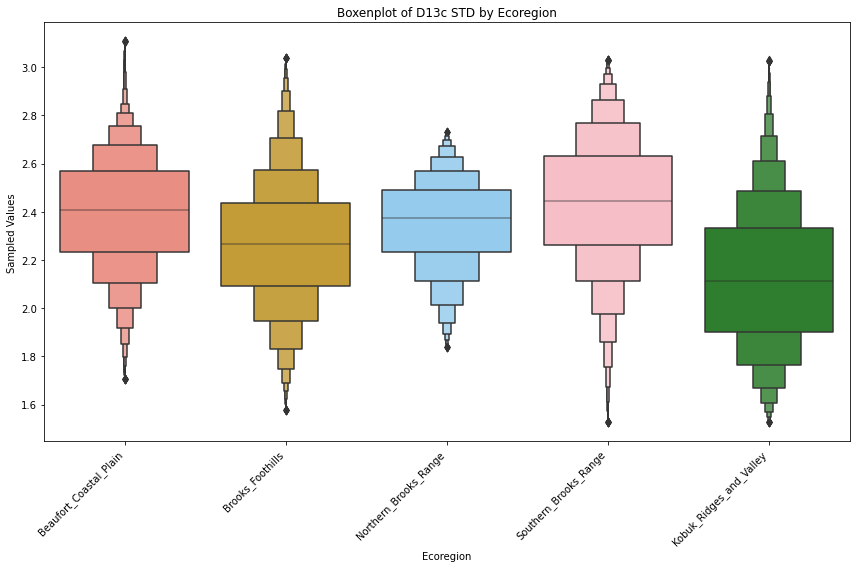

In [4]:
import os
import rasterio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(42)

# Folder containing the .tif files
tif_folder = r'D:\wenqu\chapter1_2\figures\ecoregion\eco_lands\d13c_std'

# Dictionary to map each .tif file to its corresponding ecoregion and sample points
tif_info = {
    'Beaufort_Coastal_Plain_Arctic_Gravelly_Riverine_site6ab_d13c_std.tif': ('Beaufort_Coastal_Plain', 33497),
    'Beaufort_Coastal_Plain_Arctic_Gravelly_Riverine_site6c_d13c_std.tif': ('Beaufort_Coastal_Plain', 181197),   
    'Beaufort_Coastal_Plain_Arctic_Gravelly_Riverine_site7_d13c_std.tif': ('Beaufort_Coastal_Plain', 183403),    
    'Beaufort_Coastal_Plain_Arctic_Peaty_Sandy_Lowland_site6ab_d13c_std.tif': ('Beaufort_Coastal_Plain', 20401),
    'Beaufort_Coastal_Plain_Arctic_Peaty_Sandy_Lowland_site7_d13c_std.tif': ('Beaufort_Coastal_Plain', 183403),  
    'Beaufort_Coastal_Plain_Arctic_Peaty_Silty_Lowland_site6ab_d13c_std.tif': ('Beaufort_Coastal_Plain', 33497),   
    'Beaufort_Coastal_Plain_Arctic_Peaty_Silty_Lowland_site6c_d13c_std.tif': ('Beaufort_Coastal_Plain', 181197), 
    'Beaufort_Coastal_Plain_Arctic_Peaty_Silty_Lowland_site7_d13c_std.tif': ('Beaufort_Coastal_Plain', 183403),
    'Brooks_Foothills_Arctic_Rocky_Glaciated_Upland_site4a_d13c_std.tif': ('Brooks_Foothills', 81225),
    'Brooks_Foothills_Arctic_Rocky_Glaciated_Upland_site4b_d13c_std.tif': ('Brooks_Foothills', 220328),
    'Brooks_Foothills_Arctic_Gravelly_Riverine_site4a_d13c_std.tif': ('Brooks_Foothills', 144299),
    'Brooks_Foothills_Arctic_Gravelly_Riverine_site4b_d13c_std.tif': ('Brooks_Foothills', 220328),
    'Brooks_Foothills_Arctic_Peaty_Glaciated_Upland_site4a_d13c_std.tif': ('Brooks_Foothills', 144299),  
    'Brooks_Foothills_Arctic_Peaty_Glaciated_Upland_site4b_d13c_std.tif': ('Brooks_Foothills', 169308),
    'Brooks_Foothills_Arctic_Rocky_Upland_site4a_d13c_std.tif': ('Brooks_Foothills', 13812),   
    'Brooks_Foothills_Arctic_Rocky_Upland_site6c_d13c_std.tif': ('Brooks_Foothills', 6397), 
    'Northern_Brooks_Range_Arctic_Rocky_Acidic_Alpine_site3b_d13c_std.tif': ('Northern_Brooks_Range', 607152), 
    'Northern_Brooks_Range_Arctic_Rocky_Glaciated_Upland_site3b_d13c_std.tif': ('Northern_Brooks_Range', 392847), 
    'Southern_Brooks_Range_Boreal_Gravelly_Riverine_site2a_c_1b_d13c_std.tif': ('Southern_Brooks_Range', 232652),  
    'Southern_Brooks_Range_Boreal_Gravelly_Riverine_site3b_d13c_std.tif': ('Southern_Brooks_Range', 86845), 
    'Southern_Brooks_Range_Boreal_Rocky_Acidic_Alpine_site2a_c_1b_d13c_std.tif': ('Southern_Brooks_Range', 242746), 
    'Southern_Brooks_Range_Boreal_Rocky_Acidic_Alpine_site3b_d13c_std.tif': ('Southern_Brooks_Range', 67786), 
    'Southern_Brooks_Range_Boreal_Rocky_Alkaline_Alpine_site3b_d13c_std.tif': ('Southern_Brooks_Range', 49196),  
    'Southern_Brooks_Range_Boreal_Rocky_Glaciated_Upland_site2a_c_1b_d13c_std.tif': ('Southern_Brooks_Range', 232747),  
    'Southern_Brooks_Range_Boreal_Rocky_Glaciated_Upland_site3b_d13c_std.tif': ('Southern_Brooks_Range', 88024),
    'Kobuk_Ridges_and_Valley_Boreal_Gravelly_Riverine_site2a_c_1b_d13c_std.tif': ('Kobuk_Ridges_and_Valley', 356712),
    'Kobuk_Ridges_and_Valley_Boreal_Peaty_Glaciated_Upland_site2a_c_1b_d13c_std.tif': ('Kobuk_Ridges_and_Valley', 363506),
    'Kobuk_Ridges_and_Valley_Boreal_Rocky_Glaciated_Upland_site2a_c_1b_d13c_std.tif': ('Kobuk_Ridges_and_Valley', 279781)
}

# List to store the summarized data for each unique ecoregion
ecoregion_values = {}

# Loop through all .tif files and sample the specified number of points
for tif_file, (ecoregion, n_samples) in tif_info.items():
    tif_path = os.path.join(tif_folder, tif_file)
    
    if n_samples == 0:
        continue  # Skip files with zero sample points
    
    # Open the .tif file
    with rasterio.open(tif_path) as src:
        data = src.read(1)  # Read the raster data (assuming the first band)
        valid_mask = ~np.isnan(data)
        valid_indices = np.column_stack(np.where(valid_mask))
        
        if len(valid_indices) >= int(n_samples):
            sampled_indices = valid_indices[np.random.choice(len(valid_indices), int(n_samples), replace=False)]
        else:
            sampled_indices = valid_indices  # Take all points if less than required
        
        sampled_values = data[sampled_indices[:, 0], sampled_indices[:, 1]]
        
        if ecoregion not in ecoregion_values:
            ecoregion_values[ecoregion] = []
        
        ecoregion_values[ecoregion].extend(sampled_values)

# Convert the sampled values to a DataFrame for plotting
df_samples = pd.DataFrame({
    'Ecoregion': [ecoregion for ecoregion in ecoregion_values.keys() for _ in ecoregion_values[ecoregion]],
    'Sampled Values': [value for values in ecoregion_values.values() for value in values]
})

# Define a specific color palette for each ecoregion
color_map = {
    'Beaufort_Coastal_Plain': 'salmon',
    'Brooks_Foothills': 'goldenrod',
    'Northern_Brooks_Range': 'lightskyblue',
    'Southern_Brooks_Range': 'lightpink',
    'Kobuk_Ridges_and_Valley': 'forestgreen'
}

# Apply the specified color for each ecoregion
df_samples['Color'] = df_samples['Ecoregion'].map(lambda x: color_map.get(x, 'black'))

# Create a palette dictionary for Seaborn
palette = {ecoregion: color_map[ecoregion] for ecoregion in df_samples['Ecoregion'].unique()}

# Create the boxenplot grouped by ecoregion
plt.figure(figsize=(12, 8))
sns.boxenplot(
    data=df_samples, 
    x='Ecoregion', 
    y='Sampled Values', 
    palette=palette
)

plt.title('Boxenplot of D13c STD by Ecoregion')
plt.xlabel('Ecoregion')
plt.ylabel('Sampled Values')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig(r'D:\wenqu\chapter1_2\figures\ecolandsacpe_figures\Boxenplot of D13c std by Ecoregion.png', dpi=300, bbox_inches='tight')
plt.show()


# D15n Ymax

C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be

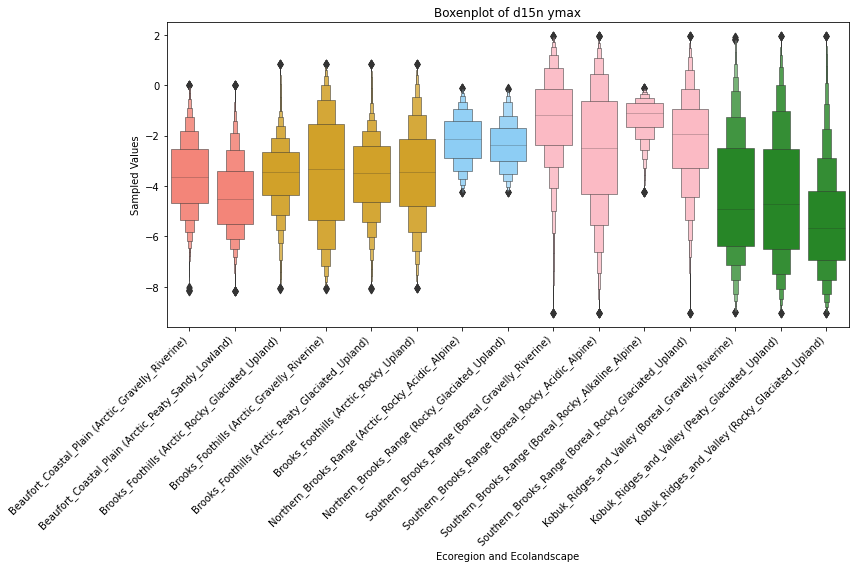

In [5]:
import os
import rasterio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
np.random.seed(42)
# Folder containing the .tif files
tif_folder = r'D:\wenqu\chapter1_2\figures\ecoregion\eco_lands\d15n_ymax'

# Dictionary to map each .tif file to its corresponding ecoregion and sample points
tif_info = {
'Beaufort_Coastal_Plain_Arctic_Gravelly_Riverine_site6ab_d15n_ymax.tif':('Beaufort_Coastal_Plain', 'Arctic_Gravelly_Riverine', 33497),
'Beaufort_Coastal_Plain_Arctic_Gravelly_Riverine_site6c_d15n_ymax.tif':('Beaufort_Coastal_Plain', 'Arctic_Gravelly_Riverine',181197),   
'Beaufort_Coastal_Plain_Arctic_Gravelly_Riverine_site7_d15n_ymax.tif':('Beaufort_Coastal_Plain', 'Arctic_Gravelly_Riverine', 183403),    
'Beaufort_Coastal_Plain_Arctic_Peaty_Sandy_Lowland_site6ab_d15n_ymax.tif':('Beaufort_Coastal_Plain', 'Arctic_Peaty_Sandy_Lowland', 20401),
'Beaufort_Coastal_Plain_Arctic_Peaty_Sandy_Lowland_site7_d15n_ymax.tif':('Beaufort_Coastal_Plain', 'Arctic_Peaty_Sandy_Lowland', 183403),  
'Beaufort_Coastal_Plain_Arctic_Peaty_Silty_Lowland_site6ab_d15n_ymax.tif':('Beaufort_Coastal_Plain', 'Arctic_Peaty_Sandy_Lowland', 33497),   
'Beaufort_Coastal_Plain_Arctic_Peaty_Silty_Lowland_site6c_d15n_ymax.tif':('Beaufort_Coastal_Plain', 'Arctic_Peaty_Sandy_Lowland', 181197), 
'Beaufort_Coastal_Plain_Arctic_Peaty_Silty_Lowland_site7_d15n_ymax.tif':('Beaufort_Coastal_Plain', 'Arctic_Peaty_Sandy_Lowland', 183403),
'Brooks_Foothills_Arctic_Rocky_Glaciated_Upland_site4a_d15n_ymax.tif':('Brooks_Foothills','Arctic_Rocky_Glaciated_Upland', 81225),
'Brooks_Foothills_Arctic_Rocky_Glaciated_Upland_site4b_d15n_ymax.tif':('Brooks_Foothills', 'Arctic_Rocky_Glaciated_Upland', 220328),
'Brooks_Foothills_Arctic_Gravelly_Riverine_site4a_d15n_ymax.tif':('Brooks_Foothills', 'Arctic_Gravelly_Riverine', 144299),
'Brooks_Foothills_Arctic_Gravelly_Riverine_site4b_d15n_ymax.tif':('Brooks_Foothills', 'Arctic_Gravelly_Riverine', 220328),
'Brooks_Foothills_Arctic_Peaty_Glaciated_Upland_site4a_d15n_ymax.tif':('Brooks_Foothills', 'Arctic_Peaty_Glaciated_Upland', 144299),  
'Brooks_Foothills_Arctic_Peaty_Glaciated_Upland_site4b_d15n_ymax.tif':('Brooks_Foothills', 'Arctic_Peaty_Glaciated_Upland', 169308),
'Brooks_Foothills_Arctic_Rocky_Upland_site4a_d15n_ymax.tif':('Brooks_Foothills', 'Arctic_Rocky_Upland', 13812),   
'Brooks_Foothills_Arctic_Rocky_Upland_site6c_d15n_ymax.tif':('Brooks_Foothills', 'Arctic_Rocky_Upland', 6397), 
'Northern_Brooks_Range_Arctic_Rocky_Acidic_Alpine_site3b_d15n_ymax.tif':('Northern_Brooks_Range', 'Arctic_Rocky_Acidic_Alpine', 607152), 
'Northern_Brooks_Range_Arctic_Rocky_Glaciated_Upland_site3b_d15n_ymax.tif':('Northern_Brooks_Range', 'Rocky_Glaciated_Upland', 392847 ), 
'Southern_Brooks_Range_Boreal_Gravelly_Riverine_site2a_c_1b_d15n_ymax.tif':('Southern_Brooks_Range', 'Boreal_Gravelly_Riverine', 232652),  
'Southern_Brooks_Range_Boreal_Gravelly_Riverine_site3b_d15n_ymax.tif':('Southern_Brooks_Range', 'Boreal_Gravelly_Riverine', 86845), 
'Southern_Brooks_Range_Boreal_Rocky_Acidic_Alpine_site2a_c_1b_d15n_ymax.tif':('Southern_Brooks_Range', 'Boreal_Rocky_Acidic_Alpine', 242746), 
'Southern_Brooks_Range_Boreal_Rocky_Acidic_Alpine_site3b_d15n_ymax.tif':('Southern_Brooks_Range', 'Boreal_Rocky_Acidic_Alpine', 67786), 
'Southern_Brooks_Range_Boreal_Rocky_Alkaline_Alpine_site3b_d15n_ymax.tif':('Southern_Brooks_Range', 'Boreal_Rocky_Alkaline_Alpine', 49196),  
'Southern_Brooks_Range_Boreal_Rocky_Glaciated_Upland_site2a_c_1b_d15n_ymax.tif':('Southern_Brooks_Range', 'Boreal_Rocky_Glaciated_Upland', 232747),  
'Southern_Brooks_Range_Boreal_Rocky_Glaciated_Upland_site3b_d15n_ymax.tif':('Southern_Brooks_Range', 'Boreal_Rocky_Glaciated_Upland', 88024),
'Kobuk_Ridges_and_Valley_Boreal_Gravelly_Riverine_site2a_c_1b_d15n_ymax.tif':('Kobuk_Ridges_and_Valley', 'Boreal_Gravelly_Riverine', 356712),
'Kobuk_Ridges_and_Valley_Boreal_Peaty_Glaciated_Upland_site2a_c_1b_d15n_ymax.tif':('Kobuk_Ridges_and_Valley', 'Peaty_Glaciated_Upland', 363506),
'Kobuk_Ridges_and_Valley_Boreal_Rocky_Glaciated_Upland_site2a_c_1b_d15n_ymax.tif':('Kobuk_Ridges_and_Valley', 'Rocky_Glaciated_Upland', 279781)
}

# List to store the summarized data for each unique ecoregion and ecolandscape combination
ecoregion_values = {}

# Loop through all .tif files and sample the specified number of points
for tif_file, (ecoregion, ecolandscape, n_samples) in tif_info.items():
    tif_path = os.path.join(tif_folder, tif_file)
    
    if n_samples == 0:
        continue  # Skip files with zero sample points
    
    # Open the .tif file
    with rasterio.open(tif_path) as src:
        data = src.read(1)  # Read the raster data (assuming the first band)
        valid_mask = ~np.isnan(data)
        valid_indices = np.column_stack(np.where(valid_mask))
        
        if len(valid_indices) >= int(n_samples):
            sampled_indices = valid_indices[np.random.choice(len(valid_indices), int(n_samples), replace=False)]
        else:
            sampled_indices = valid_indices  # Take all points if less than required
        
        sampled_values = data[sampled_indices[:, 0], sampled_indices[:, 1]]
        
        key = (ecoregion, ecolandscape)
        if key not in ecoregion_values:
            ecoregion_values[key] = []
        
        ecoregion_values[key].extend(sampled_values)

# Convert the sampled values to a DataFrame for plotting
df_samples = pd.DataFrame({
    'Ecoregion': [ecoregion for (ecoregion, ecolandscape) in ecoregion_values.keys() for _ in ecoregion_values[(ecoregion, ecolandscape)]],
    'Ecolandscape': [ecolandscape for (ecoregion, ecolandscape) in ecoregion_values.keys() for _ in ecoregion_values[(ecoregion, ecolandscape)]],
    'Sampled Values': [value for values in ecoregion_values.values() for value in values]
})

# Combine Ecoregion and Ecolandscape for unique grouping
df_samples['Group'] = df_samples['Ecoregion'] + " (" + df_samples['Ecolandscape'] + ")"

# Define a specific color palette for each ecoregion with underscores matching the format in df_samples
color_map = {
    'Beaufort_Coastal_Plain': 'salmon',
    'Brooks_Foothills': 'goldenrod',
    'Northern_Brooks_Range': 'lightskyblue',
    'Southern_Brooks_Range': 'lightpink',
    'Kobuk_Ridges_and_Valley': 'forestgreen'
}

# Apply the specified color for each unique ecoregion across its different ecolandscapes
df_samples['Color'] = df_samples['Ecoregion'].map(lambda x: color_map.get(x, 'black'))

# Create the boxenplot grouped by the combined 'Group' (Ecoregion + Ecolandscape)
plt.figure(figsize=(12, 8))
sns.boxenplot(
    data=df_samples, 
    x='Group', 
    y='Sampled Values', 
    palette=df_samples.set_index('Group')['Color'].to_dict(),
    linewidth=.5, 
    saturation=0.9,
    trust_alpha=0.1
)

plt.title('Boxenplot of d15n ymax')
plt.xlabel('Ecoregion and Ecolandscape')
plt.ylabel('Sampled Values')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig(r'D:\wenqu\chapter1_2\figures\ecolandsacpe_figures\Boxenplot of D15n ymax by Ecolandscape.png', dpi=300, bbox_inches='tight')
plt.show()

C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be

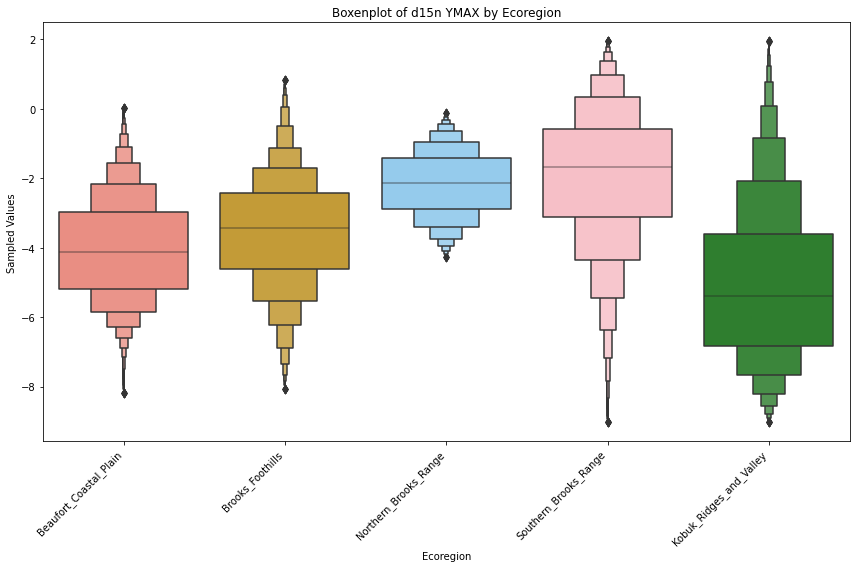

In [6]:
import os
import rasterio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(42)

# Folder containing the .tif files
tif_folder = r'D:\wenqu\chapter1_2\figures\ecoregion\eco_lands\d15n_ymax'

# Dictionary to map each .tif file to its corresponding ecoregion and sample points
tif_info = {
    'Beaufort_Coastal_Plain_Arctic_Gravelly_Riverine_site6ab_d15n_ymax.tif': ('Beaufort_Coastal_Plain', 33497),
    'Beaufort_Coastal_Plain_Arctic_Gravelly_Riverine_site6c_d15n_ymax.tif': ('Beaufort_Coastal_Plain', 181197),   
    'Beaufort_Coastal_Plain_Arctic_Gravelly_Riverine_site7_d15n_ymax.tif': ('Beaufort_Coastal_Plain', 183403),    
    'Beaufort_Coastal_Plain_Arctic_Peaty_Sandy_Lowland_site6ab_d15n_ymax.tif': ('Beaufort_Coastal_Plain', 20401),
    'Beaufort_Coastal_Plain_Arctic_Peaty_Sandy_Lowland_site7_d15n_ymax.tif': ('Beaufort_Coastal_Plain', 183403),  
    'Beaufort_Coastal_Plain_Arctic_Peaty_Silty_Lowland_site6ab_d15n_ymax.tif': ('Beaufort_Coastal_Plain', 33497),   
    'Beaufort_Coastal_Plain_Arctic_Peaty_Silty_Lowland_site6c_d15n_ymax.tif': ('Beaufort_Coastal_Plain', 181197), 
    'Beaufort_Coastal_Plain_Arctic_Peaty_Silty_Lowland_site7_d15n_ymax.tif': ('Beaufort_Coastal_Plain', 183403),
    'Brooks_Foothills_Arctic_Rocky_Glaciated_Upland_site4a_d15n_ymax.tif': ('Brooks_Foothills', 81225),
    'Brooks_Foothills_Arctic_Rocky_Glaciated_Upland_site4b_d15n_ymax.tif': ('Brooks_Foothills', 220328),
    'Brooks_Foothills_Arctic_Gravelly_Riverine_site4a_d15n_ymax.tif': ('Brooks_Foothills', 144299),
    'Brooks_Foothills_Arctic_Gravelly_Riverine_site4b_d15n_ymax.tif': ('Brooks_Foothills', 220328),
    'Brooks_Foothills_Arctic_Peaty_Glaciated_Upland_site4a_d15n_ymax.tif': ('Brooks_Foothills', 144299),  
    'Brooks_Foothills_Arctic_Peaty_Glaciated_Upland_site4b_d15n_ymax.tif': ('Brooks_Foothills', 169308),
    'Brooks_Foothills_Arctic_Rocky_Upland_site4a_d15n_ymax.tif': ('Brooks_Foothills', 13812),   
    'Brooks_Foothills_Arctic_Rocky_Upland_site6c_d15n_ymax.tif': ('Brooks_Foothills', 6397), 
    'Northern_Brooks_Range_Arctic_Rocky_Acidic_Alpine_site3b_d15n_ymax.tif': ('Northern_Brooks_Range', 607152), 
    'Northern_Brooks_Range_Arctic_Rocky_Glaciated_Upland_site3b_d15n_ymax.tif': ('Northern_Brooks_Range', 392847), 
    'Southern_Brooks_Range_Boreal_Gravelly_Riverine_site2a_c_1b_d15n_ymax.tif': ('Southern_Brooks_Range', 232652),  
    'Southern_Brooks_Range_Boreal_Gravelly_Riverine_site3b_d15n_ymax.tif': ('Southern_Brooks_Range', 86845), 
    'Southern_Brooks_Range_Boreal_Rocky_Acidic_Alpine_site2a_c_1b_d15n_ymax.tif': ('Southern_Brooks_Range', 242746), 
    'Southern_Brooks_Range_Boreal_Rocky_Acidic_Alpine_site3b_d15n_ymax.tif': ('Southern_Brooks_Range', 67786), 
    'Southern_Brooks_Range_Boreal_Rocky_Alkaline_Alpine_site3b_d15n_ymax.tif': ('Southern_Brooks_Range', 49196),  
    'Southern_Brooks_Range_Boreal_Rocky_Glaciated_Upland_site2a_c_1b_d15n_ymax.tif': ('Southern_Brooks_Range', 232747),  
    'Southern_Brooks_Range_Boreal_Rocky_Glaciated_Upland_site3b_d15n_ymax.tif': ('Southern_Brooks_Range', 88024),
    'Kobuk_Ridges_and_Valley_Boreal_Gravelly_Riverine_site2a_c_1b_d15n_ymax.tif': ('Kobuk_Ridges_and_Valley', 356712),
    'Kobuk_Ridges_and_Valley_Boreal_Peaty_Glaciated_Upland_site2a_c_1b_d15n_ymax.tif': ('Kobuk_Ridges_and_Valley', 363506),
    'Kobuk_Ridges_and_Valley_Boreal_Rocky_Glaciated_Upland_site2a_c_1b_d15n_ymax.tif': ('Kobuk_Ridges_and_Valley', 279781)
}

# List to store the summarized data for each unique ecoregion
ecoregion_values = {}

# Loop through all .tif files and sample the specified number of points
for tif_file, (ecoregion, n_samples) in tif_info.items():
    tif_path = os.path.join(tif_folder, tif_file)
    
    if n_samples == 0:
        continue  # Skip files with zero sample points
    
    # Open the .tif file
    with rasterio.open(tif_path) as src:
        data = src.read(1)  # Read the raster data (assuming the first band)
        valid_mask = ~np.isnan(data)
        valid_indices = np.column_stack(np.where(valid_mask))
        
        if len(valid_indices) >= int(n_samples):
            sampled_indices = valid_indices[np.random.choice(len(valid_indices), int(n_samples), replace=False)]
        else:
            sampled_indices = valid_indices  # Take all points if less than required
        
        sampled_values = data[sampled_indices[:, 0], sampled_indices[:, 1]]
        
        if ecoregion not in ecoregion_values:
            ecoregion_values[ecoregion] = []
        
        ecoregion_values[ecoregion].extend(sampled_values)

# Convert the sampled values to a DataFrame for plotting
df_samples = pd.DataFrame({
    'Ecoregion': [ecoregion for ecoregion in ecoregion_values.keys() for _ in ecoregion_values[ecoregion]],
    'Sampled Values': [value for values in ecoregion_values.values() for value in values]
})

# Define a specific color palette for each ecoregion
color_map = {
    'Beaufort_Coastal_Plain': 'salmon',
    'Brooks_Foothills': 'goldenrod',
    'Northern_Brooks_Range': 'lightskyblue',
    'Southern_Brooks_Range': 'lightpink',
    'Kobuk_Ridges_and_Valley': 'forestgreen'
}

# Apply the specified color for each ecoregion
df_samples['Color'] = df_samples['Ecoregion'].map(lambda x: color_map.get(x, 'black'))

# Create a palette dictionary for Seaborn
palette = {ecoregion: color_map[ecoregion] for ecoregion in df_samples['Ecoregion'].unique()}

# Create the boxenplot grouped by ecoregion
plt.figure(figsize=(12, 8))
sns.boxenplot(
    data=df_samples, 
    x='Ecoregion', 
    y='Sampled Values', 
    palette=palette
)

plt.title('Boxenplot of d15n YMAX by Ecoregion')
plt.xlabel('Ecoregion')
plt.ylabel('Sampled Values')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig(r'D:\wenqu\chapter1_2\figures\ecolandsacpe_figures\Boxenplot of D15n ymax by Ecoregion.png', dpi=300, bbox_inches='tight')
plt.show()


# D15N std

C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be

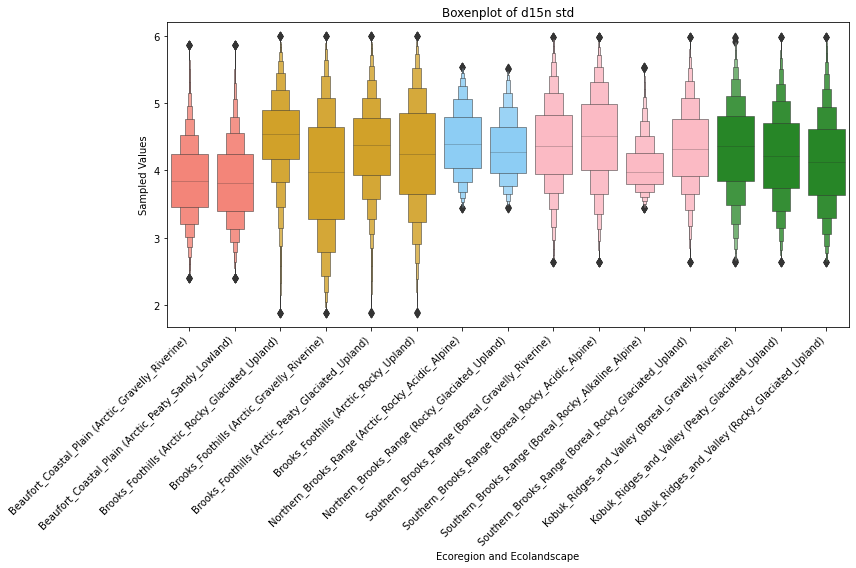

In [7]:
import os
import rasterio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
np.random.seed(42)
# Folder containing the .tif files
tif_folder = r'D:\wenqu\chapter1_2\figures\ecoregion\eco_lands\d15n_std'

# Dictionary to map each .tif file to its corresponding ecoregion and sample points
tif_info = {
'Beaufort_Coastal_Plain_Arctic_Gravelly_Riverine_site6ab_d15n_std.tif':('Beaufort_Coastal_Plain', 'Arctic_Gravelly_Riverine', 33497),
'Beaufort_Coastal_Plain_Arctic_Gravelly_Riverine_site6c_d15n_std.tif':('Beaufort_Coastal_Plain', 'Arctic_Gravelly_Riverine',181197),   
'Beaufort_Coastal_Plain_Arctic_Gravelly_Riverine_site7_d15n_std.tif':('Beaufort_Coastal_Plain', 'Arctic_Gravelly_Riverine', 183403),    
'Beaufort_Coastal_Plain_Arctic_Peaty_Sandy_Lowland_site6ab_d15n_std.tif':('Beaufort_Coastal_Plain', 'Arctic_Peaty_Sandy_Lowland', 20401),
'Beaufort_Coastal_Plain_Arctic_Peaty_Sandy_Lowland_site7_d15n_std.tif':('Beaufort_Coastal_Plain', 'Arctic_Peaty_Sandy_Lowland', 183403),  
'Beaufort_Coastal_Plain_Arctic_Peaty_Silty_Lowland_site6ab_d15n_std.tif':('Beaufort_Coastal_Plain', 'Arctic_Peaty_Sandy_Lowland', 33497),   
'Beaufort_Coastal_Plain_Arctic_Peaty_Silty_Lowland_site6c_d15n_std.tif':('Beaufort_Coastal_Plain', 'Arctic_Peaty_Sandy_Lowland', 181197), 
'Beaufort_Coastal_Plain_Arctic_Peaty_Silty_Lowland_site7_d15n_std.tif':('Beaufort_Coastal_Plain', 'Arctic_Peaty_Sandy_Lowland', 183403),
'Brooks_Foothills_Arctic_Rocky_Glaciated_Upland_site4a_d15n_std.tif':('Brooks_Foothills','Arctic_Rocky_Glaciated_Upland', 81225),
'Brooks_Foothills_Arctic_Rocky_Glaciated_Upland_site4b_d15n_std.tif':('Brooks_Foothills', 'Arctic_Rocky_Glaciated_Upland', 220328),
'Brooks_Foothills_Arctic_Gravelly_Riverine_site4a_d15n_std.tif':('Brooks_Foothills', 'Arctic_Gravelly_Riverine', 144299),
'Brooks_Foothills_Arctic_Gravelly_Riverine_site4b_d15n_std.tif':('Brooks_Foothills', 'Arctic_Gravelly_Riverine', 220328),
'Brooks_Foothills_Arctic_Peaty_Glaciated_Upland_site4a_d15n_std.tif':('Brooks_Foothills', 'Arctic_Peaty_Glaciated_Upland', 144299),  
'Brooks_Foothills_Arctic_Peaty_Glaciated_Upland_site4b_d15n_std.tif':('Brooks_Foothills', 'Arctic_Peaty_Glaciated_Upland', 169308),
'Brooks_Foothills_Arctic_Rocky_Upland_site4a_d15n_std.tif':('Brooks_Foothills', 'Arctic_Rocky_Upland', 13812),   
'Brooks_Foothills_Arctic_Rocky_Upland_site6c_d15n_std.tif':('Brooks_Foothills', 'Arctic_Rocky_Upland', 6397), 
'Northern_Brooks_Range_Arctic_Rocky_Acidic_Alpine_site3b_d15n_std.tif':('Northern_Brooks_Range', 'Arctic_Rocky_Acidic_Alpine', 607152), 
'Northern_Brooks_Range_Arctic_Rocky_Glaciated_Upland_site3b_d15n_std.tif':('Northern_Brooks_Range', 'Rocky_Glaciated_Upland', 392847 ), 
'Southern_Brooks_Range_Boreal_Gravelly_Riverine_site2a_c_1b_d15n_std.tif':('Southern_Brooks_Range', 'Boreal_Gravelly_Riverine', 232652),  
'Southern_Brooks_Range_Boreal_Gravelly_Riverine_site3b_d15n_std.tif':('Southern_Brooks_Range', 'Boreal_Gravelly_Riverine', 86845), 
'Southern_Brooks_Range_Boreal_Rocky_Acidic_Alpine_site2a_c_1b_d15n_std.tif':('Southern_Brooks_Range', 'Boreal_Rocky_Acidic_Alpine', 242746), 
'Southern_Brooks_Range_Boreal_Rocky_Acidic_Alpine_site3b_d15n_std.tif':('Southern_Brooks_Range', 'Boreal_Rocky_Acidic_Alpine', 67786), 
'Southern_Brooks_Range_Boreal_Rocky_Alkaline_Alpine_site3b_d15n_std.tif':('Southern_Brooks_Range', 'Boreal_Rocky_Alkaline_Alpine', 49196),  
'Southern_Brooks_Range_Boreal_Rocky_Glaciated_Upland_site2a_c_1b_d15n_std.tif':('Southern_Brooks_Range', 'Boreal_Rocky_Glaciated_Upland', 232747),  
'Southern_Brooks_Range_Boreal_Rocky_Glaciated_Upland_site3b_d15n_std.tif':('Southern_Brooks_Range', 'Boreal_Rocky_Glaciated_Upland', 88024),
'Kobuk_Ridges_and_Valley_Boreal_Gravelly_Riverine_site2a_c_1b_d15n_std.tif':('Kobuk_Ridges_and_Valley', 'Boreal_Gravelly_Riverine', 356712),
'Kobuk_Ridges_and_Valley_Boreal_Peaty_Glaciated_Upland_site2a_c_1b_d15n_std.tif':('Kobuk_Ridges_and_Valley', 'Peaty_Glaciated_Upland', 363506),
'Kobuk_Ridges_and_Valley_Boreal_Rocky_Glaciated_Upland_site2a_c_1b_d15n_std.tif':('Kobuk_Ridges_and_Valley', 'Rocky_Glaciated_Upland', 279781)
}

# List to store the summarized data for each unique ecoregion and ecolandscape combination
ecoregion_values = {}

# Loop through all .tif files and sample the specified number of points
for tif_file, (ecoregion, ecolandscape, n_samples) in tif_info.items():
    tif_path = os.path.join(tif_folder, tif_file)
    
    if n_samples == 0:
        continue  # Skip files with zero sample points
    
    # Open the .tif file
    with rasterio.open(tif_path) as src:
        data = src.read(1)  # Read the raster data (assuming the first band)
        valid_mask = ~np.isnan(data)
        valid_indices = np.column_stack(np.where(valid_mask))
        
        if len(valid_indices) >= int(n_samples):
            sampled_indices = valid_indices[np.random.choice(len(valid_indices), int(n_samples), replace=False)]
        else:
            sampled_indices = valid_indices  # Take all points if less than required
        
        sampled_values = data[sampled_indices[:, 0], sampled_indices[:, 1]]
        
        key = (ecoregion, ecolandscape)
        if key not in ecoregion_values:
            ecoregion_values[key] = []
        
        ecoregion_values[key].extend(sampled_values)

# Convert the sampled values to a DataFrame for plotting
df_samples = pd.DataFrame({
    'Ecoregion': [ecoregion for (ecoregion, ecolandscape) in ecoregion_values.keys() for _ in ecoregion_values[(ecoregion, ecolandscape)]],
    'Ecolandscape': [ecolandscape for (ecoregion, ecolandscape) in ecoregion_values.keys() for _ in ecoregion_values[(ecoregion, ecolandscape)]],
    'Sampled Values': [value for values in ecoregion_values.values() for value in values]
})

# Combine Ecoregion and Ecolandscape for unique grouping
df_samples['Group'] = df_samples['Ecoregion'] + " (" + df_samples['Ecolandscape'] + ")"

# Define a specific color palette for each ecoregion with underscores matching the format in df_samples
color_map = {
    'Beaufort_Coastal_Plain': 'salmon',
    'Brooks_Foothills': 'goldenrod',
    'Northern_Brooks_Range': 'lightskyblue',
    'Southern_Brooks_Range': 'lightpink',
    'Kobuk_Ridges_and_Valley': 'forestgreen'
}

# Apply the specified color for each unique ecoregion across its different ecolandscapes
df_samples['Color'] = df_samples['Ecoregion'].map(lambda x: color_map.get(x, 'black'))

# Create the boxenplot grouped by the combined 'Group' (Ecoregion + Ecolandscape)
plt.figure(figsize=(12, 8))
sns.boxenplot(
    data=df_samples, 
    x='Group', 
    y='Sampled Values', 
    palette=df_samples.set_index('Group')['Color'].to_dict(),
    linewidth=.5, 
    saturation=0.9,
    trust_alpha=0.1
)

plt.title('Boxenplot of d15n std')
plt.xlabel('Ecoregion and Ecolandscape')
plt.ylabel('Sampled Values')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig(r'D:\wenqu\chapter1_2\figures\ecolandsacpe_figures\Boxenplot of D15n std by Ecolandscape.png', dpi=300, bbox_inches='tight')
plt.show()

C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be

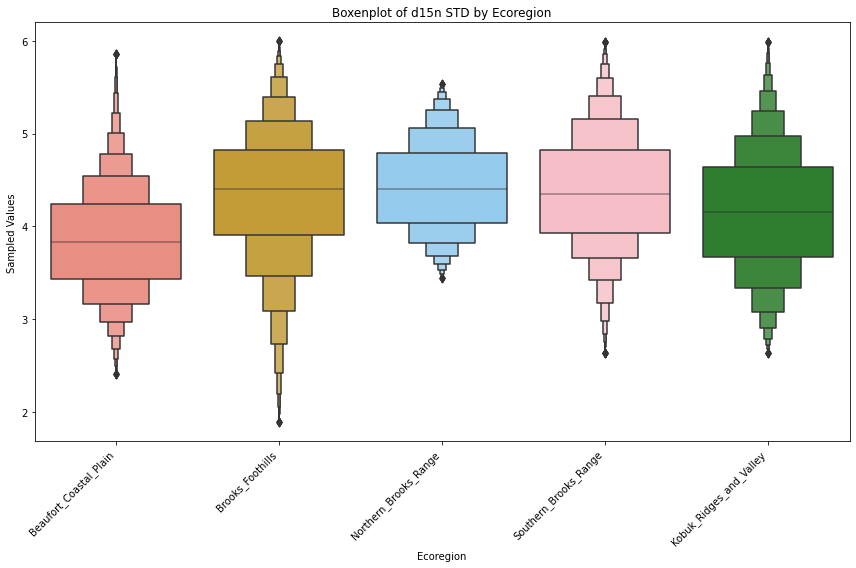

In [8]:
import os
import rasterio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(42)

# Folder containing the .tif files
tif_folder = r'D:\wenqu\chapter1_2\figures\ecoregion\eco_lands\d15n_std'

# Dictionary to map each .tif file to its corresponding ecoregion and sample points
tif_info = {
    'Beaufort_Coastal_Plain_Arctic_Gravelly_Riverine_site6ab_d15n_std.tif': ('Beaufort_Coastal_Plain', 33497),
    'Beaufort_Coastal_Plain_Arctic_Gravelly_Riverine_site6c_d15n_std.tif': ('Beaufort_Coastal_Plain', 181197),   
    'Beaufort_Coastal_Plain_Arctic_Gravelly_Riverine_site7_d15n_std.tif': ('Beaufort_Coastal_Plain', 183403),    
    'Beaufort_Coastal_Plain_Arctic_Peaty_Sandy_Lowland_site6ab_d15n_std.tif': ('Beaufort_Coastal_Plain', 20401),
    'Beaufort_Coastal_Plain_Arctic_Peaty_Sandy_Lowland_site7_d15n_std.tif': ('Beaufort_Coastal_Plain', 183403),  
    'Beaufort_Coastal_Plain_Arctic_Peaty_Silty_Lowland_site6ab_d15n_std.tif': ('Beaufort_Coastal_Plain', 33497),   
    'Beaufort_Coastal_Plain_Arctic_Peaty_Silty_Lowland_site6c_d15n_std.tif': ('Beaufort_Coastal_Plain', 181197), 
    'Beaufort_Coastal_Plain_Arctic_Peaty_Silty_Lowland_site7_d15n_std.tif': ('Beaufort_Coastal_Plain', 183403),
    'Brooks_Foothills_Arctic_Rocky_Glaciated_Upland_site4a_d15n_std.tif': ('Brooks_Foothills', 81225),
    'Brooks_Foothills_Arctic_Rocky_Glaciated_Upland_site4b_d15n_std.tif': ('Brooks_Foothills', 220328),
    'Brooks_Foothills_Arctic_Gravelly_Riverine_site4a_d15n_std.tif': ('Brooks_Foothills', 144299),
    'Brooks_Foothills_Arctic_Gravelly_Riverine_site4b_d15n_std.tif': ('Brooks_Foothills', 220328),
    'Brooks_Foothills_Arctic_Peaty_Glaciated_Upland_site4a_d15n_std.tif': ('Brooks_Foothills', 144299),  
    'Brooks_Foothills_Arctic_Peaty_Glaciated_Upland_site4b_d15n_std.tif': ('Brooks_Foothills', 169308),
    'Brooks_Foothills_Arctic_Rocky_Upland_site4a_d15n_std.tif': ('Brooks_Foothills', 13812),   
    'Brooks_Foothills_Arctic_Rocky_Upland_site6c_d15n_std.tif': ('Brooks_Foothills', 6397), 
    'Northern_Brooks_Range_Arctic_Rocky_Acidic_Alpine_site3b_d15n_std.tif': ('Northern_Brooks_Range', 607152), 
    'Northern_Brooks_Range_Arctic_Rocky_Glaciated_Upland_site3b_d15n_std.tif': ('Northern_Brooks_Range', 392847), 
    'Southern_Brooks_Range_Boreal_Gravelly_Riverine_site2a_c_1b_d15n_std.tif': ('Southern_Brooks_Range', 232652),  
    'Southern_Brooks_Range_Boreal_Gravelly_Riverine_site3b_d15n_std.tif': ('Southern_Brooks_Range', 86845), 
    'Southern_Brooks_Range_Boreal_Rocky_Acidic_Alpine_site2a_c_1b_d15n_std.tif': ('Southern_Brooks_Range', 242746), 
    'Southern_Brooks_Range_Boreal_Rocky_Acidic_Alpine_site3b_d15n_std.tif': ('Southern_Brooks_Range', 67786), 
    'Southern_Brooks_Range_Boreal_Rocky_Alkaline_Alpine_site3b_d15n_std.tif': ('Southern_Brooks_Range', 49196),  
    'Southern_Brooks_Range_Boreal_Rocky_Glaciated_Upland_site2a_c_1b_d15n_std.tif': ('Southern_Brooks_Range', 232747),  
    'Southern_Brooks_Range_Boreal_Rocky_Glaciated_Upland_site3b_d15n_std.tif': ('Southern_Brooks_Range', 88024),
    'Kobuk_Ridges_and_Valley_Boreal_Gravelly_Riverine_site2a_c_1b_d15n_std.tif': ('Kobuk_Ridges_and_Valley', 356712),
    'Kobuk_Ridges_and_Valley_Boreal_Peaty_Glaciated_Upland_site2a_c_1b_d15n_std.tif': ('Kobuk_Ridges_and_Valley', 363506),
    'Kobuk_Ridges_and_Valley_Boreal_Rocky_Glaciated_Upland_site2a_c_1b_d15n_std.tif': ('Kobuk_Ridges_and_Valley', 279781)
}

# List to store the summarized data for each unique ecoregion
ecoregion_values = {}

# Loop through all .tif files and sample the specified number of points
for tif_file, (ecoregion, n_samples) in tif_info.items():
    tif_path = os.path.join(tif_folder, tif_file)
    
    if n_samples == 0:
        continue  # Skip files with zero sample points
    
    # Open the .tif file
    with rasterio.open(tif_path) as src:
        data = src.read(1)  # Read the raster data (assuming the first band)
        valid_mask = ~np.isnan(data)
        valid_indices = np.column_stack(np.where(valid_mask))
        
        if len(valid_indices) >= int(n_samples):
            sampled_indices = valid_indices[np.random.choice(len(valid_indices), int(n_samples), replace=False)]
        else:
            sampled_indices = valid_indices  # Take all points if less than required
        
        sampled_values = data[sampled_indices[:, 0], sampled_indices[:, 1]]
        
        if ecoregion not in ecoregion_values:
            ecoregion_values[ecoregion] = []
        
        ecoregion_values[ecoregion].extend(sampled_values)

# Convert the sampled values to a DataFrame for plotting
df_samples = pd.DataFrame({
    'Ecoregion': [ecoregion for ecoregion in ecoregion_values.keys() for _ in ecoregion_values[ecoregion]],
    'Sampled Values': [value for values in ecoregion_values.values() for value in values]
})

# Define a specific color palette for each ecoregion
color_map = {
    'Beaufort_Coastal_Plain': 'salmon',
    'Brooks_Foothills': 'goldenrod',
    'Northern_Brooks_Range': 'lightskyblue',
    'Southern_Brooks_Range': 'lightpink',
    'Kobuk_Ridges_and_Valley': 'forestgreen'
}

# Apply the specified color for each ecoregion
df_samples['Color'] = df_samples['Ecoregion'].map(lambda x: color_map.get(x, 'black'))

# Create a palette dictionary for Seaborn
palette = {ecoregion: color_map[ecoregion] for ecoregion in df_samples['Ecoregion'].unique()}

# Create the boxenplot grouped by ecoregion
plt.figure(figsize=(12, 8))
sns.boxenplot(
    data=df_samples, 
    x='Ecoregion', 
    y='Sampled Values', 
    palette=palette
)

plt.title('Boxenplot of d15n STD by Ecoregion')
plt.xlabel('Ecoregion')
plt.ylabel('Sampled Values')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig(r'D:\wenqu\chapter1_2\figures\ecolandsacpe_figures\Boxenplot of D15n std by Ecoregion.png', dpi=300, bbox_inches='tight')
plt.show()


# LA ymax

C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be

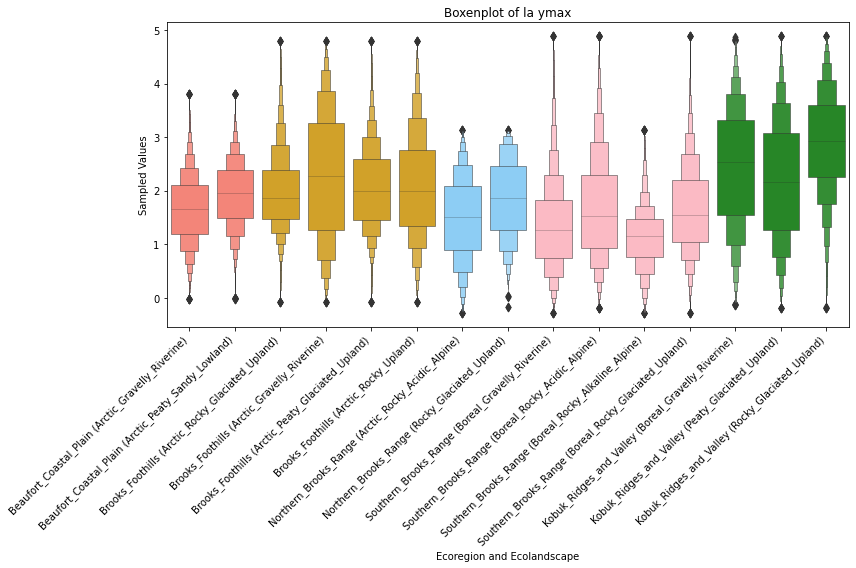

In [9]:
import os
import rasterio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
np.random.seed(42)
# Folder containing the .tif files
tif_folder = r'D:\wenqu\chapter1_2\figures\ecoregion\eco_lands\la_ymax'

# Dictionary to map each .tif file to its corresponding ecoregion and sample points
tif_info = {
'Beaufort_Coastal_Plain_Arctic_Gravelly_Riverine_site6ab_la_ymax.tif':('Beaufort_Coastal_Plain', 'Arctic_Gravelly_Riverine', 33497),
'Beaufort_Coastal_Plain_Arctic_Gravelly_Riverine_site6c_la_ymax.tif':('Beaufort_Coastal_Plain', 'Arctic_Gravelly_Riverine',181197),   
'Beaufort_Coastal_Plain_Arctic_Gravelly_Riverine_site7_la_ymax.tif':('Beaufort_Coastal_Plain', 'Arctic_Gravelly_Riverine', 183403),    
'Beaufort_Coastal_Plain_Arctic_Peaty_Sandy_Lowland_site6ab_la_ymax.tif':('Beaufort_Coastal_Plain', 'Arctic_Peaty_Sandy_Lowland', 20401),
'Beaufort_Coastal_Plain_Arctic_Peaty_Sandy_Lowland_site7_la_ymax.tif':('Beaufort_Coastal_Plain', 'Arctic_Peaty_Sandy_Lowland', 183403),  
'Beaufort_Coastal_Plain_Arctic_Peaty_Silty_Lowland_site6ab_la_ymax.tif':('Beaufort_Coastal_Plain', 'Arctic_Peaty_Sandy_Lowland', 33497),   
'Beaufort_Coastal_Plain_Arctic_Peaty_Silty_Lowland_site6c_la_ymax.tif':('Beaufort_Coastal_Plain', 'Arctic_Peaty_Sandy_Lowland', 181197), 
'Beaufort_Coastal_Plain_Arctic_Peaty_Silty_Lowland_site7_la_ymax.tif':('Beaufort_Coastal_Plain', 'Arctic_Peaty_Sandy_Lowland', 183403),
'Brooks_Foothills_Arctic_Rocky_Glaciated_Upland_site4a_la_ymax.tif':('Brooks_Foothills','Arctic_Rocky_Glaciated_Upland', 81225),
'Brooks_Foothills_Arctic_Rocky_Glaciated_Upland_site4b_la_ymax.tif':('Brooks_Foothills', 'Arctic_Rocky_Glaciated_Upland', 220328),
'Brooks_Foothills_Arctic_Gravelly_Riverine_site4a_la_ymax.tif':('Brooks_Foothills', 'Arctic_Gravelly_Riverine', 144299),
'Brooks_Foothills_Arctic_Gravelly_Riverine_site4b_la_ymax.tif':('Brooks_Foothills', 'Arctic_Gravelly_Riverine', 220328),
'Brooks_Foothills_Arctic_Peaty_Glaciated_Upland_site4a_la_ymax.tif':('Brooks_Foothills', 'Arctic_Peaty_Glaciated_Upland', 144299),  
'Brooks_Foothills_Arctic_Peaty_Glaciated_Upland_site4b_la_ymax.tif':('Brooks_Foothills', 'Arctic_Peaty_Glaciated_Upland', 169308),
'Brooks_Foothills_Arctic_Rocky_Upland_site4a_la_ymax.tif':('Brooks_Foothills', 'Arctic_Rocky_Upland', 13812),   
'Brooks_Foothills_Arctic_Rocky_Upland_site6c_la_ymax.tif':('Brooks_Foothills', 'Arctic_Rocky_Upland', 6397), 
'Northern_Brooks_Range_Arctic_Rocky_Acidic_Alpine_site3b_la_ymax.tif':('Northern_Brooks_Range', 'Arctic_Rocky_Acidic_Alpine', 607152), 
'Northern_Brooks_Range_Arctic_Rocky_Glaciated_Upland_site3b_la_ymax.tif':('Northern_Brooks_Range', 'Rocky_Glaciated_Upland', 392847 ), 
'Southern_Brooks_Range_Boreal_Gravelly_Riverine_site2a_c_1b_la_ymax.tif':('Southern_Brooks_Range', 'Boreal_Gravelly_Riverine', 232652),  
'Southern_Brooks_Range_Boreal_Gravelly_Riverine_site3b_la_ymax.tif':('Southern_Brooks_Range', 'Boreal_Gravelly_Riverine', 86845), 
'Southern_Brooks_Range_Boreal_Rocky_Acidic_Alpine_site2a_c_1b_la_ymax.tif':('Southern_Brooks_Range', 'Boreal_Rocky_Acidic_Alpine', 242746), 
'Southern_Brooks_Range_Boreal_Rocky_Acidic_Alpine_site3b_la_ymax.tif':('Southern_Brooks_Range', 'Boreal_Rocky_Acidic_Alpine', 67786), 
'Southern_Brooks_Range_Boreal_Rocky_Alkaline_Alpine_site3b_la_ymax.tif':('Southern_Brooks_Range', 'Boreal_Rocky_Alkaline_Alpine', 49196),  
'Southern_Brooks_Range_Boreal_Rocky_Glaciated_Upland_site2a_c_1b_la_ymax.tif':('Southern_Brooks_Range', 'Boreal_Rocky_Glaciated_Upland', 232747),  
'Southern_Brooks_Range_Boreal_Rocky_Glaciated_Upland_site3b_la_ymax.tif':('Southern_Brooks_Range', 'Boreal_Rocky_Glaciated_Upland', 88024),
'Kobuk_Ridges_and_Valley_Boreal_Gravelly_Riverine_site2a_c_1b_la_ymax.tif':('Kobuk_Ridges_and_Valley', 'Boreal_Gravelly_Riverine', 356712),
'Kobuk_Ridges_and_Valley_Boreal_Peaty_Glaciated_Upland_site2a_c_1b_la_ymax.tif':('Kobuk_Ridges_and_Valley', 'Peaty_Glaciated_Upland', 363506),
'Kobuk_Ridges_and_Valley_Boreal_Rocky_Glaciated_Upland_site2a_c_1b_la_ymax.tif':('Kobuk_Ridges_and_Valley', 'Rocky_Glaciated_Upland', 279781)
}

# List to store the summarized data for each unique ecoregion and ecolandscape combination
ecoregion_values = {}

# Loop through all .tif files and sample the specified number of points
for tif_file, (ecoregion, ecolandscape, n_samples) in tif_info.items():
    tif_path = os.path.join(tif_folder, tif_file)
    
    if n_samples == 0:
        continue  # Skip files with zero sample points
    
    # Open the .tif file
    with rasterio.open(tif_path) as src:
        data = src.read(1)  # Read the raster data (assuming the first band)
        valid_mask = ~np.isnan(data)
        valid_indices = np.column_stack(np.where(valid_mask))
        
        if len(valid_indices) >= int(n_samples):
            sampled_indices = valid_indices[np.random.choice(len(valid_indices), int(n_samples), replace=False)]
        else:
            sampled_indices = valid_indices  # Take all points if less than required
        
        sampled_values = data[sampled_indices[:, 0], sampled_indices[:, 1]]
        
        key = (ecoregion, ecolandscape)
        if key not in ecoregion_values:
            ecoregion_values[key] = []
        
        ecoregion_values[key].extend(sampled_values)

# Convert the sampled values to a DataFrame for plotting
df_samples = pd.DataFrame({
    'Ecoregion': [ecoregion for (ecoregion, ecolandscape) in ecoregion_values.keys() for _ in ecoregion_values[(ecoregion, ecolandscape)]],
    'Ecolandscape': [ecolandscape for (ecoregion, ecolandscape) in ecoregion_values.keys() for _ in ecoregion_values[(ecoregion, ecolandscape)]],
    'Sampled Values': [value for values in ecoregion_values.values() for value in values]
})

# Combine Ecoregion and Ecolandscape for unique grouping
df_samples['Group'] = df_samples['Ecoregion'] + " (" + df_samples['Ecolandscape'] + ")"

# Define a specific color palette for each ecoregion with underscores matching the format in df_samples
color_map = {
    'Beaufort_Coastal_Plain': 'salmon',
    'Brooks_Foothills': 'goldenrod',
    'Northern_Brooks_Range': 'lightskyblue',
    'Southern_Brooks_Range': 'lightpink',
    'Kobuk_Ridges_and_Valley': 'forestgreen'
}

# Apply the specified color for each unique ecoregion across its different ecolandscapes
df_samples['Color'] = df_samples['Ecoregion'].map(lambda x: color_map.get(x, 'black'))

# Create the boxenplot grouped by the combined 'Group' (Ecoregion + Ecolandscape)
plt.figure(figsize=(12, 8))
sns.boxenplot(
    data=df_samples, 
    x='Group', 
    y='Sampled Values', 
    palette=df_samples.set_index('Group')['Color'].to_dict(),
    linewidth=.5, 
    saturation=0.9,
    trust_alpha=0.1
)

plt.title('Boxenplot of la ymax')
plt.xlabel('Ecoregion and Ecolandscape')
plt.ylabel('Sampled Values')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig(r'D:\wenqu\chapter1_2\figures\ecolandsacpe_figures\Boxenplot of LA ymax by Ecolandscape.png', dpi=300, bbox_inches='tight')
plt.show()

C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be

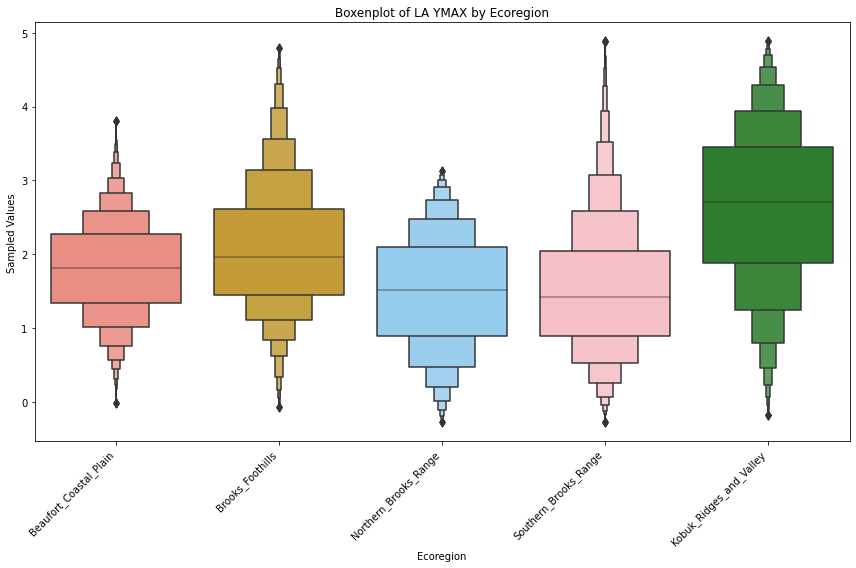

In [10]:
import os
import rasterio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(42)

# Folder containing the .tif files
tif_folder = r'D:\wenqu\chapter1_2\figures\ecoregion\eco_lands\la_ymax'

# Dictionary to map each .tif file to its corresponding ecoregion and sample points
tif_info = {
    'Beaufort_Coastal_Plain_Arctic_Gravelly_Riverine_site6ab_la_ymax.tif': ('Beaufort_Coastal_Plain', 33497),
    'Beaufort_Coastal_Plain_Arctic_Gravelly_Riverine_site6c_la_ymax.tif': ('Beaufort_Coastal_Plain', 181197),   
    'Beaufort_Coastal_Plain_Arctic_Gravelly_Riverine_site7_la_ymax.tif': ('Beaufort_Coastal_Plain', 183403),    
    'Beaufort_Coastal_Plain_Arctic_Peaty_Sandy_Lowland_site6ab_la_ymax.tif': ('Beaufort_Coastal_Plain', 20401),
    'Beaufort_Coastal_Plain_Arctic_Peaty_Sandy_Lowland_site7_la_ymax.tif': ('Beaufort_Coastal_Plain', 183403),  
    'Beaufort_Coastal_Plain_Arctic_Peaty_Silty_Lowland_site6ab_la_ymax.tif': ('Beaufort_Coastal_Plain', 33497),   
    'Beaufort_Coastal_Plain_Arctic_Peaty_Silty_Lowland_site6c_la_ymax.tif': ('Beaufort_Coastal_Plain', 181197), 
    'Beaufort_Coastal_Plain_Arctic_Peaty_Silty_Lowland_site7_la_ymax.tif': ('Beaufort_Coastal_Plain', 183403),
    'Brooks_Foothills_Arctic_Rocky_Glaciated_Upland_site4a_la_ymax.tif': ('Brooks_Foothills', 81225),
    'Brooks_Foothills_Arctic_Rocky_Glaciated_Upland_site4b_la_ymax.tif': ('Brooks_Foothills', 220328),
    'Brooks_Foothills_Arctic_Gravelly_Riverine_site4a_la_ymax.tif': ('Brooks_Foothills', 144299),
    'Brooks_Foothills_Arctic_Gravelly_Riverine_site4b_la_ymax.tif': ('Brooks_Foothills', 220328),
    'Brooks_Foothills_Arctic_Peaty_Glaciated_Upland_site4a_la_ymax.tif': ('Brooks_Foothills', 144299),  
    'Brooks_Foothills_Arctic_Peaty_Glaciated_Upland_site4b_la_ymax.tif': ('Brooks_Foothills', 169308),
    'Brooks_Foothills_Arctic_Rocky_Upland_site4a_la_ymax.tif': ('Brooks_Foothills', 13812),   
    'Brooks_Foothills_Arctic_Rocky_Upland_site6c_la_ymax.tif': ('Brooks_Foothills', 6397), 
    'Northern_Brooks_Range_Arctic_Rocky_Acidic_Alpine_site3b_la_ymax.tif': ('Northern_Brooks_Range', 607152), 
    'Northern_Brooks_Range_Arctic_Rocky_Glaciated_Upland_site3b_la_ymax.tif': ('Northern_Brooks_Range', 392847), 
    'Southern_Brooks_Range_Boreal_Gravelly_Riverine_site2a_c_1b_la_ymax.tif': ('Southern_Brooks_Range', 232652),  
    'Southern_Brooks_Range_Boreal_Gravelly_Riverine_site3b_la_ymax.tif': ('Southern_Brooks_Range', 86845), 
    'Southern_Brooks_Range_Boreal_Rocky_Acidic_Alpine_site2a_c_1b_la_ymax.tif': ('Southern_Brooks_Range', 242746), 
    'Southern_Brooks_Range_Boreal_Rocky_Acidic_Alpine_site3b_la_ymax.tif': ('Southern_Brooks_Range', 67786), 
    'Southern_Brooks_Range_Boreal_Rocky_Alkaline_Alpine_site3b_la_ymax.tif': ('Southern_Brooks_Range', 49196),  
    'Southern_Brooks_Range_Boreal_Rocky_Glaciated_Upland_site2a_c_1b_la_ymax.tif': ('Southern_Brooks_Range', 232747),  
    'Southern_Brooks_Range_Boreal_Rocky_Glaciated_Upland_site3b_la_ymax.tif': ('Southern_Brooks_Range', 88024),
    'Kobuk_Ridges_and_Valley_Boreal_Gravelly_Riverine_site2a_c_1b_la_ymax.tif': ('Kobuk_Ridges_and_Valley', 356712),
    'Kobuk_Ridges_and_Valley_Boreal_Peaty_Glaciated_Upland_site2a_c_1b_la_ymax.tif': ('Kobuk_Ridges_and_Valley', 363506),
    'Kobuk_Ridges_and_Valley_Boreal_Rocky_Glaciated_Upland_site2a_c_1b_la_ymax.tif': ('Kobuk_Ridges_and_Valley', 279781)
}

# List to store the summarized data for each unique ecoregion
ecoregion_values = {}

# Loop through all .tif files and sample the specified number of points
for tif_file, (ecoregion, n_samples) in tif_info.items():
    tif_path = os.path.join(tif_folder, tif_file)
    
    if n_samples == 0:
        continue  # Skip files with zero sample points
    
    # Open the .tif file
    with rasterio.open(tif_path) as src:
        data = src.read(1)  # Read the raster data (assuming the first band)
        valid_mask = ~np.isnan(data)
        valid_indices = np.column_stack(np.where(valid_mask))
        
        if len(valid_indices) >= int(n_samples):
            sampled_indices = valid_indices[np.random.choice(len(valid_indices), int(n_samples), replace=False)]
        else:
            sampled_indices = valid_indices  # Take all points if less than required
        
        sampled_values = data[sampled_indices[:, 0], sampled_indices[:, 1]]
        
        if ecoregion not in ecoregion_values:
            ecoregion_values[ecoregion] = []
        
        ecoregion_values[ecoregion].extend(sampled_values)

# Convert the sampled values to a DataFrame for plotting
df_samples = pd.DataFrame({
    'Ecoregion': [ecoregion for ecoregion in ecoregion_values.keys() for _ in ecoregion_values[ecoregion]],
    'Sampled Values': [value for values in ecoregion_values.values() for value in values]
})

# Define a specific color palette for each ecoregion
color_map = {
    'Beaufort_Coastal_Plain': 'salmon',
    'Brooks_Foothills': 'goldenrod',
    'Northern_Brooks_Range': 'lightskyblue',
    'Southern_Brooks_Range': 'lightpink',
    'Kobuk_Ridges_and_Valley': 'forestgreen'
}

# Apply the specified color for each ecoregion
df_samples['Color'] = df_samples['Ecoregion'].map(lambda x: color_map.get(x, 'black'))

# Create a palette dictionary for Seaborn
palette = {ecoregion: color_map[ecoregion] for ecoregion in df_samples['Ecoregion'].unique()}

# Create the boxenplot grouped by ecoregion
plt.figure(figsize=(12, 8))
sns.boxenplot(
    data=df_samples, 
    x='Ecoregion', 
    y='Sampled Values', 
    palette=palette
)

plt.title('Boxenplot of LA YMAX by Ecoregion')
plt.xlabel('Ecoregion')
plt.ylabel('Sampled Values')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig(r'D:\wenqu\chapter1_2\figures\ecolandsacpe_figures\Boxenplot of LA ymax by Ecoregion.png', dpi=300, bbox_inches='tight')
plt.show()


# LA STD

C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be

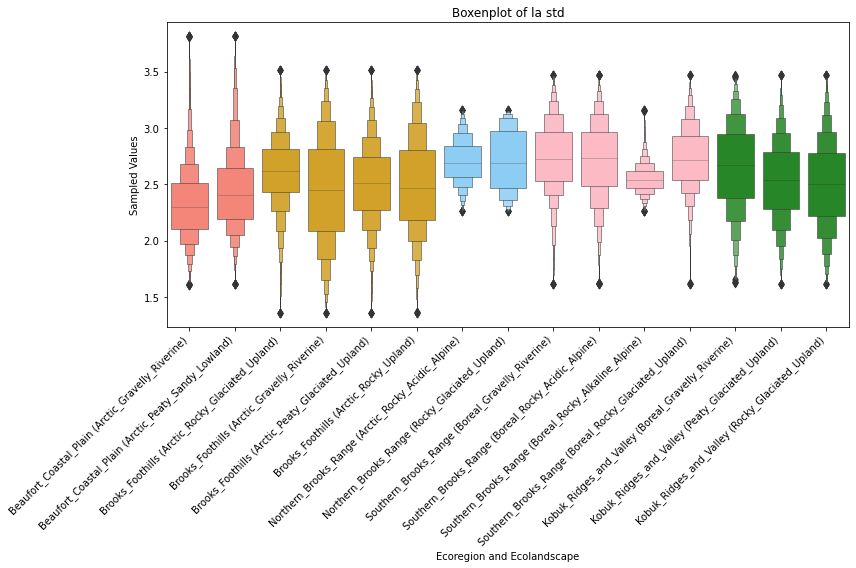

In [11]:
import os
import rasterio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
np.random.seed(42)
# Folder containing the .tif files
tif_folder = r'D:\wenqu\chapter1_2\figures\ecoregion\eco_lands\la_std'

# Dictionary to map each .tif file to its corresponding ecoregion and sample points
tif_info = {
'Beaufort_Coastal_Plain_Arctic_Gravelly_Riverine_site6ab_la_std.tif':('Beaufort_Coastal_Plain', 'Arctic_Gravelly_Riverine', 33497),
'Beaufort_Coastal_Plain_Arctic_Gravelly_Riverine_site6c_la_std.tif':('Beaufort_Coastal_Plain', 'Arctic_Gravelly_Riverine',181197),   
'Beaufort_Coastal_Plain_Arctic_Gravelly_Riverine_site7_la_std.tif':('Beaufort_Coastal_Plain', 'Arctic_Gravelly_Riverine', 183403),    
'Beaufort_Coastal_Plain_Arctic_Peaty_Sandy_Lowland_site6ab_la_std.tif':('Beaufort_Coastal_Plain', 'Arctic_Peaty_Sandy_Lowland', 20401),
'Beaufort_Coastal_Plain_Arctic_Peaty_Sandy_Lowland_site7_la_std.tif':('Beaufort_Coastal_Plain', 'Arctic_Peaty_Sandy_Lowland', 183403),  
'Beaufort_Coastal_Plain_Arctic_Peaty_Silty_Lowland_site6ab_la_std.tif':('Beaufort_Coastal_Plain', 'Arctic_Peaty_Sandy_Lowland', 33497),   
'Beaufort_Coastal_Plain_Arctic_Peaty_Silty_Lowland_site6c_la_std.tif':('Beaufort_Coastal_Plain', 'Arctic_Peaty_Sandy_Lowland', 181197), 
'Beaufort_Coastal_Plain_Arctic_Peaty_Silty_Lowland_site7_la_std.tif':('Beaufort_Coastal_Plain', 'Arctic_Peaty_Sandy_Lowland', 183403),
'Brooks_Foothills_Arctic_Rocky_Glaciated_Upland_site4a_la_std.tif':('Brooks_Foothills','Arctic_Rocky_Glaciated_Upland', 81225),
'Brooks_Foothills_Arctic_Rocky_Glaciated_Upland_site4b_la_std.tif':('Brooks_Foothills', 'Arctic_Rocky_Glaciated_Upland', 220328),
'Brooks_Foothills_Arctic_Gravelly_Riverine_site4a_la_std.tif':('Brooks_Foothills', 'Arctic_Gravelly_Riverine', 144299),
'Brooks_Foothills_Arctic_Gravelly_Riverine_site4b_la_std.tif':('Brooks_Foothills', 'Arctic_Gravelly_Riverine', 220328),
'Brooks_Foothills_Arctic_Peaty_Glaciated_Upland_site4a_la_std.tif':('Brooks_Foothills', 'Arctic_Peaty_Glaciated_Upland', 144299),  
'Brooks_Foothills_Arctic_Peaty_Glaciated_Upland_site4b_la_std.tif':('Brooks_Foothills', 'Arctic_Peaty_Glaciated_Upland', 169308),
'Brooks_Foothills_Arctic_Rocky_Upland_site4a_la_std.tif':('Brooks_Foothills', 'Arctic_Rocky_Upland', 13812),   
'Brooks_Foothills_Arctic_Rocky_Upland_site6c_la_std.tif':('Brooks_Foothills', 'Arctic_Rocky_Upland', 6397), 
'Northern_Brooks_Range_Arctic_Rocky_Acidic_Alpine_site3b_la_std.tif':('Northern_Brooks_Range', 'Arctic_Rocky_Acidic_Alpine', 607152), 
'Northern_Brooks_Range_Arctic_Rocky_Glaciated_Upland_site3b_la_std.tif':('Northern_Brooks_Range', 'Rocky_Glaciated_Upland', 392847 ), 
'Southern_Brooks_Range_Boreal_Gravelly_Riverine_site2a_c_1b_la_std.tif':('Southern_Brooks_Range', 'Boreal_Gravelly_Riverine', 232652),  
'Southern_Brooks_Range_Boreal_Gravelly_Riverine_site3b_la_std.tif':('Southern_Brooks_Range', 'Boreal_Gravelly_Riverine', 86845), 
'Southern_Brooks_Range_Boreal_Rocky_Acidic_Alpine_site2a_c_1b_la_std.tif':('Southern_Brooks_Range', 'Boreal_Rocky_Acidic_Alpine', 242746), 
'Southern_Brooks_Range_Boreal_Rocky_Acidic_Alpine_site3b_la_std.tif':('Southern_Brooks_Range', 'Boreal_Rocky_Acidic_Alpine', 67786), 
'Southern_Brooks_Range_Boreal_Rocky_Alkaline_Alpine_site3b_la_std.tif':('Southern_Brooks_Range', 'Boreal_Rocky_Alkaline_Alpine', 49196),  
'Southern_Brooks_Range_Boreal_Rocky_Glaciated_Upland_site2a_c_1b_la_std.tif':('Southern_Brooks_Range', 'Boreal_Rocky_Glaciated_Upland', 232747),  
'Southern_Brooks_Range_Boreal_Rocky_Glaciated_Upland_site3b_la_std.tif':('Southern_Brooks_Range', 'Boreal_Rocky_Glaciated_Upland', 88024),
'Kobuk_Ridges_and_Valley_Boreal_Gravelly_Riverine_site2a_c_1b_la_std.tif':('Kobuk_Ridges_and_Valley', 'Boreal_Gravelly_Riverine', 356712),
'Kobuk_Ridges_and_Valley_Boreal_Peaty_Glaciated_Upland_site2a_c_1b_la_std.tif':('Kobuk_Ridges_and_Valley', 'Peaty_Glaciated_Upland', 363506),
'Kobuk_Ridges_and_Valley_Boreal_Rocky_Glaciated_Upland_site2a_c_1b_la_std.tif':('Kobuk_Ridges_and_Valley', 'Rocky_Glaciated_Upland', 279781)
}

# List to store the summarized data for each unique ecoregion and ecolandscape combination
ecoregion_values = {}

# Loop through all .tif files and sample the specified number of points
for tif_file, (ecoregion, ecolandscape, n_samples) in tif_info.items():
    tif_path = os.path.join(tif_folder, tif_file)
    
    if n_samples == 0:
        continue  # Skip files with zero sample points
    
    # Open the .tif file
    with rasterio.open(tif_path) as src:
        data = src.read(1)  # Read the raster data (assuming the first band)
        valid_mask = ~np.isnan(data)
        valid_indices = np.column_stack(np.where(valid_mask))
        
        if len(valid_indices) >= int(n_samples):
            sampled_indices = valid_indices[np.random.choice(len(valid_indices), int(n_samples), replace=False)]
        else:
            sampled_indices = valid_indices  # Take all points if less than required
        
        sampled_values = data[sampled_indices[:, 0], sampled_indices[:, 1]]
        
        key = (ecoregion, ecolandscape)
        if key not in ecoregion_values:
            ecoregion_values[key] = []
        
        ecoregion_values[key].extend(sampled_values)

# Convert the sampled values to a DataFrame for plotting
df_samples = pd.DataFrame({
    'Ecoregion': [ecoregion for (ecoregion, ecolandscape) in ecoregion_values.keys() for _ in ecoregion_values[(ecoregion, ecolandscape)]],
    'Ecolandscape': [ecolandscape for (ecoregion, ecolandscape) in ecoregion_values.keys() for _ in ecoregion_values[(ecoregion, ecolandscape)]],
    'Sampled Values': [value for values in ecoregion_values.values() for value in values]
})

# Combine Ecoregion and Ecolandscape for unique grouping
df_samples['Group'] = df_samples['Ecoregion'] + " (" + df_samples['Ecolandscape'] + ")"

# Define a specific color palette for each ecoregion with underscores matching the format in df_samples
color_map = {
    'Beaufort_Coastal_Plain': 'salmon',
    'Brooks_Foothills': 'goldenrod',
    'Northern_Brooks_Range': 'lightskyblue',
    'Southern_Brooks_Range': 'lightpink',
    'Kobuk_Ridges_and_Valley': 'forestgreen'
}

# Apply the specified color for each unique ecoregion across its different ecolandscapes
df_samples['Color'] = df_samples['Ecoregion'].map(lambda x: color_map.get(x, 'black'))

# Create the boxenplot grouped by the combined 'Group' (Ecoregion + Ecolandscape)
plt.figure(figsize=(12, 8))
sns.boxenplot(
    data=df_samples, 
    x='Group', 
    y='Sampled Values', 
    palette=df_samples.set_index('Group')['Color'].to_dict(),
    linewidth=.5, 
    saturation=0.9,
    trust_alpha=0.1
)

plt.title('Boxenplot of la std')
plt.xlabel('Ecoregion and Ecolandscape')
plt.ylabel('Sampled Values')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig(r'D:\wenqu\chapter1_2\figures\ecolandsacpe_figures\Boxenplot of LA std by Ecolandscape.png', dpi=300, bbox_inches='tight')
plt.show()

C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be

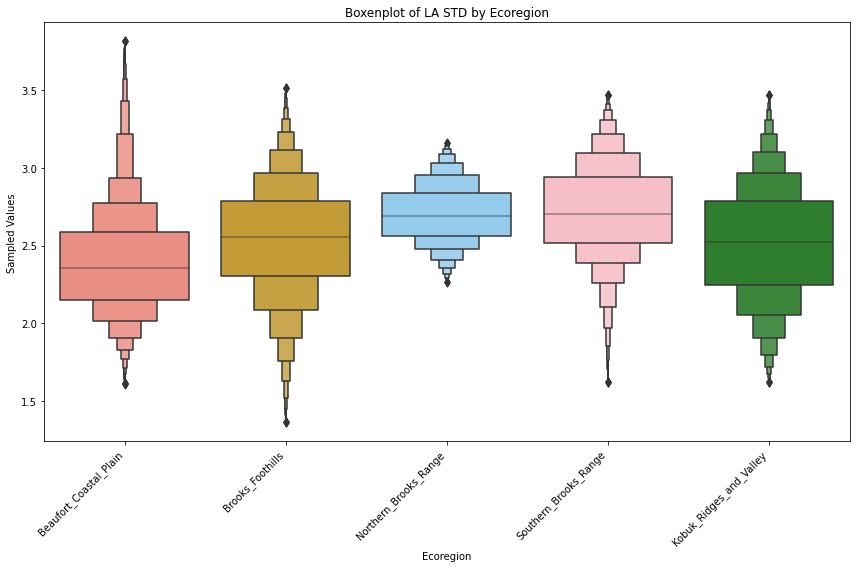

In [12]:
import os
import rasterio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(42)

# Folder containing the .tif files
tif_folder = r'D:\wenqu\chapter1_2\figures\ecoregion\eco_lands\la_std'

# Dictionary to map each .tif file to its corresponding ecoregion and sample points
tif_info = {
    'Beaufort_Coastal_Plain_Arctic_Gravelly_Riverine_site6ab_la_std.tif': ('Beaufort_Coastal_Plain', 33497),
    'Beaufort_Coastal_Plain_Arctic_Gravelly_Riverine_site6c_la_std.tif': ('Beaufort_Coastal_Plain', 181197),   
    'Beaufort_Coastal_Plain_Arctic_Gravelly_Riverine_site7_la_std.tif': ('Beaufort_Coastal_Plain', 183403),    
    'Beaufort_Coastal_Plain_Arctic_Peaty_Sandy_Lowland_site6ab_la_std.tif': ('Beaufort_Coastal_Plain', 20401),
    'Beaufort_Coastal_Plain_Arctic_Peaty_Sandy_Lowland_site7_la_std.tif': ('Beaufort_Coastal_Plain', 183403),  
    'Beaufort_Coastal_Plain_Arctic_Peaty_Silty_Lowland_site6ab_la_std.tif': ('Beaufort_Coastal_Plain', 33497),   
    'Beaufort_Coastal_Plain_Arctic_Peaty_Silty_Lowland_site6c_la_std.tif': ('Beaufort_Coastal_Plain', 181197), 
    'Beaufort_Coastal_Plain_Arctic_Peaty_Silty_Lowland_site7_la_std.tif': ('Beaufort_Coastal_Plain', 183403),
    'Brooks_Foothills_Arctic_Rocky_Glaciated_Upland_site4a_la_std.tif': ('Brooks_Foothills', 81225),
    'Brooks_Foothills_Arctic_Rocky_Glaciated_Upland_site4b_la_std.tif': ('Brooks_Foothills', 220328),
    'Brooks_Foothills_Arctic_Gravelly_Riverine_site4a_la_std.tif': ('Brooks_Foothills', 144299),
    'Brooks_Foothills_Arctic_Gravelly_Riverine_site4b_la_std.tif': ('Brooks_Foothills', 220328),
    'Brooks_Foothills_Arctic_Peaty_Glaciated_Upland_site4a_la_std.tif': ('Brooks_Foothills', 144299),  
    'Brooks_Foothills_Arctic_Peaty_Glaciated_Upland_site4b_la_std.tif': ('Brooks_Foothills', 169308),
    'Brooks_Foothills_Arctic_Rocky_Upland_site4a_la_std.tif': ('Brooks_Foothills', 13812),   
    'Brooks_Foothills_Arctic_Rocky_Upland_site6c_la_std.tif': ('Brooks_Foothills', 6397), 
    'Northern_Brooks_Range_Arctic_Rocky_Acidic_Alpine_site3b_la_std.tif': ('Northern_Brooks_Range', 607152), 
    'Northern_Brooks_Range_Arctic_Rocky_Glaciated_Upland_site3b_la_std.tif': ('Northern_Brooks_Range', 392847), 
    'Southern_Brooks_Range_Boreal_Gravelly_Riverine_site2a_c_1b_la_std.tif': ('Southern_Brooks_Range', 232652),  
    'Southern_Brooks_Range_Boreal_Gravelly_Riverine_site3b_la_std.tif': ('Southern_Brooks_Range', 86845), 
    'Southern_Brooks_Range_Boreal_Rocky_Acidic_Alpine_site2a_c_1b_la_std.tif': ('Southern_Brooks_Range', 242746), 
    'Southern_Brooks_Range_Boreal_Rocky_Acidic_Alpine_site3b_la_std.tif': ('Southern_Brooks_Range', 67786), 
    'Southern_Brooks_Range_Boreal_Rocky_Alkaline_Alpine_site3b_la_std.tif': ('Southern_Brooks_Range', 49196),  
    'Southern_Brooks_Range_Boreal_Rocky_Glaciated_Upland_site2a_c_1b_la_std.tif': ('Southern_Brooks_Range', 232747),  
    'Southern_Brooks_Range_Boreal_Rocky_Glaciated_Upland_site3b_la_std.tif': ('Southern_Brooks_Range', 88024),
    'Kobuk_Ridges_and_Valley_Boreal_Gravelly_Riverine_site2a_c_1b_la_std.tif': ('Kobuk_Ridges_and_Valley', 356712),
    'Kobuk_Ridges_and_Valley_Boreal_Peaty_Glaciated_Upland_site2a_c_1b_la_std.tif': ('Kobuk_Ridges_and_Valley', 363506),
    'Kobuk_Ridges_and_Valley_Boreal_Rocky_Glaciated_Upland_site2a_c_1b_la_std.tif': ('Kobuk_Ridges_and_Valley', 279781)
}

# List to store the summarized data for each unique ecoregion
ecoregion_values = {}

# Loop through all .tif files and sample the specified number of points
for tif_file, (ecoregion, n_samples) in tif_info.items():
    tif_path = os.path.join(tif_folder, tif_file)
    
    if n_samples == 0:
        continue  # Skip files with zero sample points
    
    # Open the .tif file
    with rasterio.open(tif_path) as src:
        data = src.read(1)  # Read the raster data (assuming the first band)
        valid_mask = ~np.isnan(data)
        valid_indices = np.column_stack(np.where(valid_mask))
        
        if len(valid_indices) >= int(n_samples):
            sampled_indices = valid_indices[np.random.choice(len(valid_indices), int(n_samples), replace=False)]
        else:
            sampled_indices = valid_indices  # Take all points if less than required
        
        sampled_values = data[sampled_indices[:, 0], sampled_indices[:, 1]]
        
        if ecoregion not in ecoregion_values:
            ecoregion_values[ecoregion] = []
        
        ecoregion_values[ecoregion].extend(sampled_values)

# Convert the sampled values to a DataFrame for plotting
df_samples = pd.DataFrame({
    'Ecoregion': [ecoregion for ecoregion in ecoregion_values.keys() for _ in ecoregion_values[ecoregion]],
    'Sampled Values': [value for values in ecoregion_values.values() for value in values]
})

# Define a specific color palette for each ecoregion
color_map = {
    'Beaufort_Coastal_Plain': 'salmon',
    'Brooks_Foothills': 'goldenrod',
    'Northern_Brooks_Range': 'lightskyblue',
    'Southern_Brooks_Range': 'lightpink',
    'Kobuk_Ridges_and_Valley': 'forestgreen'
}

# Apply the specified color for each ecoregion
df_samples['Color'] = df_samples['Ecoregion'].map(lambda x: color_map.get(x, 'black'))

# Create a palette dictionary for Seaborn
palette = {ecoregion: color_map[ecoregion] for ecoregion in df_samples['Ecoregion'].unique()}

# Create the boxenplot grouped by ecoregion
plt.figure(figsize=(12, 8))
sns.boxenplot(
    data=df_samples, 
    x='Ecoregion', 
    y='Sampled Values', 
    palette=palette
)

plt.title('Boxenplot of LA STD by Ecoregion')
plt.xlabel('Ecoregion')
plt.ylabel('Sampled Values')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig(r'D:\wenqu\chapter1_2\figures\ecolandsacpe_figures\Boxenplot of LA std by Ecoreion.png', dpi=300, bbox_inches='tight')
plt.show()


# SLA Ymax

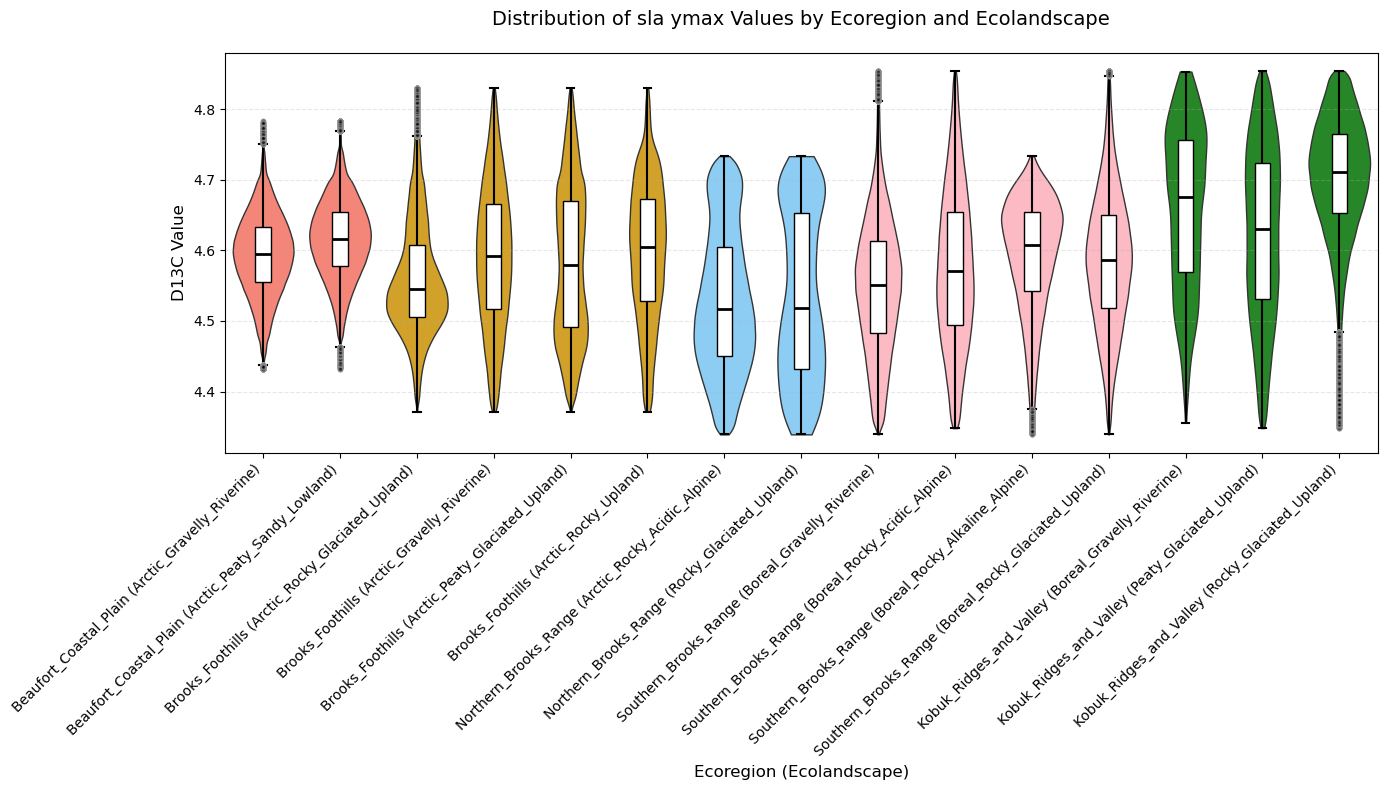

In [1]:
import os
import rasterio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
np.random.seed(42)
# Folder containing the .tif files
tif_folder = r'D:\wenqu\chapter1_2\figures\ecoregion\eco_lands\sla_ymax'

# Dictionary to map each .tif file to its corresponding ecoregion and sample points
tif_info = {
'Beaufort_Coastal_Plain_Arctic_Gravelly_Riverine_site6ab_sla_ymax.tif':('Beaufort_Coastal_Plain', 'Arctic_Gravelly_Riverine', 33497),
'Beaufort_Coastal_Plain_Arctic_Gravelly_Riverine_site6c_sla_ymax.tif':('Beaufort_Coastal_Plain', 'Arctic_Gravelly_Riverine',181197),   
'Beaufort_Coastal_Plain_Arctic_Gravelly_Riverine_site7_sla_ymax.tif':('Beaufort_Coastal_Plain', 'Arctic_Gravelly_Riverine', 183403),    
'Beaufort_Coastal_Plain_Arctic_Peaty_Sandy_Lowland_site6ab_sla_ymax.tif':('Beaufort_Coastal_Plain', 'Arctic_Peaty_Sandy_Lowland', 20401),
'Beaufort_Coastal_Plain_Arctic_Peaty_Sandy_Lowland_site7_sla_ymax.tif':('Beaufort_Coastal_Plain', 'Arctic_Peaty_Sandy_Lowland', 183403),  
'Beaufort_Coastal_Plain_Arctic_Peaty_Silty_Lowland_site6ab_sla_ymax.tif':('Beaufort_Coastal_Plain', 'Arctic_Peaty_Sandy_Lowland', 33497),   
'Beaufort_Coastal_Plain_Arctic_Peaty_Silty_Lowland_site6c_sla_ymax.tif':('Beaufort_Coastal_Plain', 'Arctic_Peaty_Sandy_Lowland', 181197), 
'Beaufort_Coastal_Plain_Arctic_Peaty_Silty_Lowland_site7_sla_ymax.tif':('Beaufort_Coastal_Plain', 'Arctic_Peaty_Sandy_Lowland', 183403),
'Brooks_Foothills_Arctic_Rocky_Glaciated_Upland_site4a_sla_ymax.tif':('Brooks_Foothills','Arctic_Rocky_Glaciated_Upland', 81225),
'Brooks_Foothills_Arctic_Rocky_Glaciated_Upland_site4b_sla_ymax.tif':('Brooks_Foothills', 'Arctic_Rocky_Glaciated_Upland', 220328),
'Brooks_Foothills_Arctic_Gravelly_Riverine_site4a_sla_ymax.tif':('Brooks_Foothills', 'Arctic_Gravelly_Riverine', 144299),
'Brooks_Foothills_Arctic_Gravelly_Riverine_site4b_sla_ymax.tif':('Brooks_Foothills', 'Arctic_Gravelly_Riverine', 220328),
'Brooks_Foothills_Arctic_Peaty_Glaciated_Upland_site4a_sla_ymax.tif':('Brooks_Foothills', 'Arctic_Peaty_Glaciated_Upland', 144299),  
'Brooks_Foothills_Arctic_Peaty_Glaciated_Upland_site4b_sla_ymax.tif':('Brooks_Foothills', 'Arctic_Peaty_Glaciated_Upland', 169308),
'Brooks_Foothills_Arctic_Rocky_Upland_site4a_sla_ymax.tif':('Brooks_Foothills', 'Arctic_Rocky_Upland', 13812),   
'Brooks_Foothills_Arctic_Rocky_Upland_site6c_sla_ymax.tif':('Brooks_Foothills', 'Arctic_Rocky_Upland', 6397), 
'Northern_Brooks_Range_Arctic_Rocky_Acidic_Alpine_site3b_sla_ymax.tif':('Northern_Brooks_Range', 'Arctic_Rocky_Acidic_Alpine', 607152), 
'Northern_Brooks_Range_Arctic_Rocky_Glaciated_Upland_site3b_sla_ymax.tif':('Northern_Brooks_Range', 'Rocky_Glaciated_Upland', 392847 ), 
'Southern_Brooks_Range_Boreal_Gravelly_Riverine_site2a_c_1b_sla_ymax.tif':('Southern_Brooks_Range', 'Boreal_Gravelly_Riverine', 232652),  
'Southern_Brooks_Range_Boreal_Gravelly_Riverine_site3b_sla_ymax.tif':('Southern_Brooks_Range', 'Boreal_Gravelly_Riverine', 86845), 
'Southern_Brooks_Range_Boreal_Rocky_Acidic_Alpine_site2a_c_1b_sla_ymax.tif':('Southern_Brooks_Range', 'Boreal_Rocky_Acidic_Alpine', 242746), 
'Southern_Brooks_Range_Boreal_Rocky_Acidic_Alpine_site3b_sla_ymax.tif':('Southern_Brooks_Range', 'Boreal_Rocky_Acidic_Alpine', 67786), 
'Southern_Brooks_Range_Boreal_Rocky_Alkaline_Alpine_site3b_sla_ymax.tif':('Southern_Brooks_Range', 'Boreal_Rocky_Alkaline_Alpine', 49196),  
'Southern_Brooks_Range_Boreal_Rocky_Glaciated_Upland_site2a_c_1b_sla_ymax.tif':('Southern_Brooks_Range', 'Boreal_Rocky_Glaciated_Upland', 232747),  
'Southern_Brooks_Range_Boreal_Rocky_Glaciated_Upland_site3b_sla_ymax.tif':('Southern_Brooks_Range', 'Boreal_Rocky_Glaciated_Upland', 88024),
'Kobuk_Ridges_and_Valley_Boreal_Gravelly_Riverine_site2a_c_1b_sla_ymax.tif':('Kobuk_Ridges_and_Valley', 'Boreal_Gravelly_Riverine', 356712),
'Kobuk_Ridges_and_Valley_Boreal_Peaty_Glaciated_Upland_site2a_c_1b_sla_ymax.tif':('Kobuk_Ridges_and_Valley', 'Peaty_Glaciated_Upland', 363506),
'Kobuk_Ridges_and_Valley_Boreal_Rocky_Glaciated_Upland_site2a_c_1b_sla_ymax.tif':('Kobuk_Ridges_and_Valley', 'Rocky_Glaciated_Upland', 279781)
}



# Dictionary to store sampled values
ecoregion_values = {}

# Process each .tif file
for tif_file, (ecoregion, ecolandscape, n_samples) in tif_info.items():
    tif_path = os.path.join(tif_folder, tif_file)
    
    if n_samples == 0:
        continue
    
    with rasterio.open(tif_path) as src:
        data = src.read(1)
        valid_mask = ~np.isnan(data)
        valid_indices = np.column_stack(np.where(valid_mask))
        
        if len(valid_indices) >= int(n_samples):
            sampled_indices = valid_indices[np.random.choice(len(valid_indices), int(n_samples), replace=False)]
        else:
            sampled_indices = valid_indices
        
        sampled_values = data[sampled_indices[:, 0], sampled_indices[:, 1]]
        
        key = (ecoregion, ecolandscape)
        if key not in ecoregion_values:
            ecoregion_values[key] = []
        ecoregion_values[key].extend(sampled_values)

# Create DataFrame from sampled values
df_samples = pd.DataFrame({
    'Ecoregion': [ecoregion for (ecoregion, ecolandscape) in ecoregion_values.keys() for _ in ecoregion_values[(ecoregion, ecolandscape)]],
    'Ecolandscape': [ecolandscape for (ecoregion, ecolandscape) in ecoregion_values.keys() for _ in ecoregion_values[(ecoregion, ecolandscape)]],
    'Sampled Values': [value for values in ecoregion_values.values() for value in values]
})

# Create combined group labels
df_samples['Group'] = df_samples['Ecoregion'] + " (" + df_samples['Ecolandscape'] + ")"

# Define color palette for ecoregions only
color_map = {
    'Beaufort_Coastal_Plain': 'salmon',
    'Brooks_Foothills': 'goldenrod',
    'Northern_Brooks_Range': 'lightskyblue',
    'Southern_Brooks_Range': 'lightpink',
    'Kobuk_Ridges_and_Valley': 'forestgreen'
}

# Create the plot
plt.figure(figsize=(14, 8))

# Create violin plots - map colors to Ecoregion only
violins = sns.violinplot(
    data=df_samples,
    x='Group',
    y='Sampled Values',
    hue='Ecoregion',  # Color by ecoregion
    palette=color_map,  # Use our defined color map
    linewidth=1,
    saturation=0.9,
    inner=None,  # We'll add boxplot separately
    cut=0,  # Extend violins to data limits
    dodge=False  # Don't separate violins by hue
)

# Add boxplots inside violins
sns.boxplot(
    data=df_samples,
    x='Group',
    y='Sampled Values',
    width=0.2,
    color='white',
    boxprops={'facecolor':'white', 'edgecolor':'black', 'linewidth':1},
    whiskerprops={'color':'black', 'linewidth':1.5},
    capprops={'color':'black', 'linewidth':1.5},
    medianprops={'color':'black', 'linewidth':2},
    flierprops={'marker':'o', 'markersize':3, 'markerfacecolor':'black', 'alpha':0.5},
    ax=violins
)

# Customize plot appearance
plt.title('Distribution of sla ymax Values by Ecoregion and Ecolandscape', pad=20, fontsize=14)
plt.xlabel('Ecoregion (Ecolandscape)', fontsize=12)
plt.ylabel('D13C Value', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.3)

# Remove the legend (optional)
plt.legend().remove()

# Adjust layout and save
plt.tight_layout()
output_path = r'D:\wenqu\chapter1_2\figures\ecolandsacpe_figures\Violin_with_Boxplot_d15n.png'
plt.savefig(output_path, dpi=300, bbox_inches='tight')
plt.show()

C:\Users\laral\AppData\Local\Temp\ipykernel_29464\2397314317.py:92: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


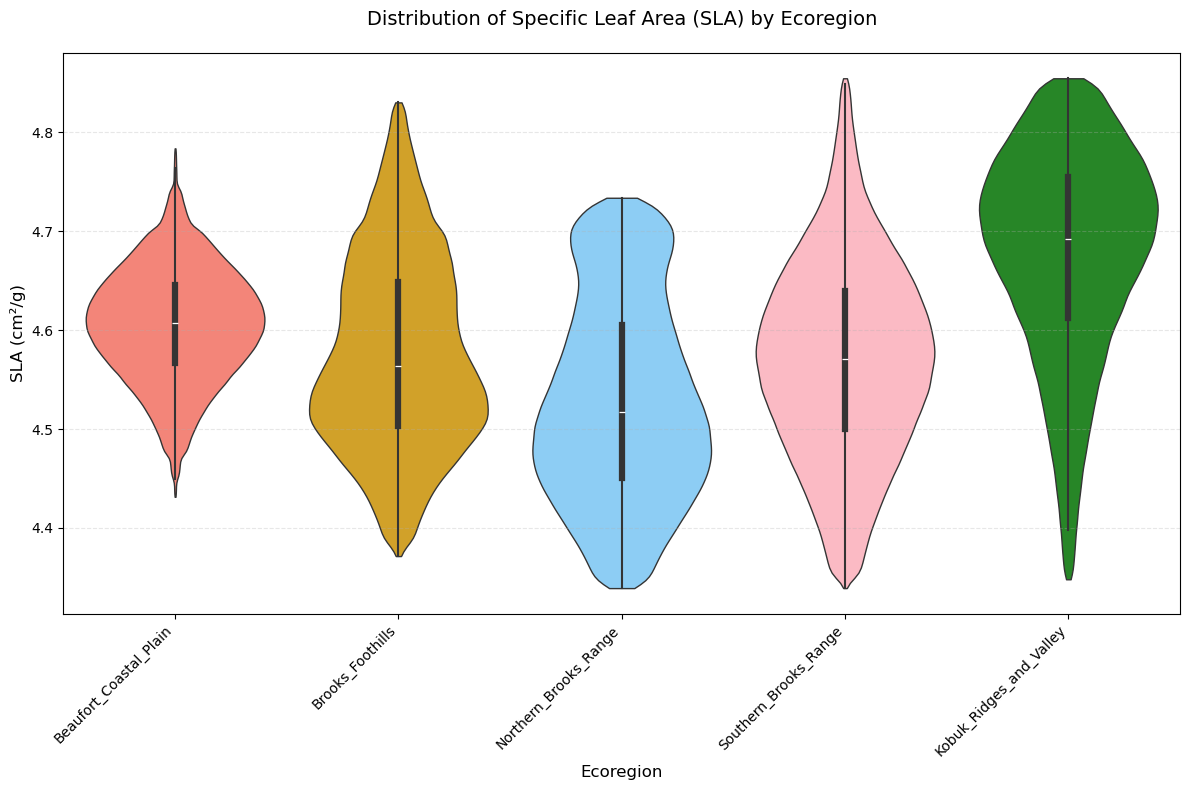

In [3]:
import os
import rasterio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(42)

# Folder containing the .tif files
tif_folder = r'D:\wenqu\chapter1_2\figures\ecoregion\eco_lands\sla_ymax'

# Dictionary to map each .tif file to its corresponding ecoregion and sample points
tif_info = {
    'Beaufort_Coastal_Plain_Arctic_Gravelly_Riverine_site6ab_sla_ymax.tif': ('Beaufort_Coastal_Plain', 33497),
    'Beaufort_Coastal_Plain_Arctic_Gravelly_Riverine_site6c_sla_ymax.tif': ('Beaufort_Coastal_Plain', 181197),   
    'Beaufort_Coastal_Plain_Arctic_Gravelly_Riverine_site7_sla_ymax.tif': ('Beaufort_Coastal_Plain', 183403),    
    'Beaufort_Coastal_Plain_Arctic_Peaty_Sandy_Lowland_site6ab_sla_ymax.tif': ('Beaufort_Coastal_Plain', 20401),
    'Beaufort_Coastal_Plain_Arctic_Peaty_Sandy_Lowland_site7_sla_ymax.tif': ('Beaufort_Coastal_Plain', 183403),  
    'Beaufort_Coastal_Plain_Arctic_Peaty_Silty_Lowland_site6ab_sla_ymax.tif': ('Beaufort_Coastal_Plain', 33497),   
    'Beaufort_Coastal_Plain_Arctic_Peaty_Silty_Lowland_site6c_sla_ymax.tif': ('Beaufort_Coastal_Plain', 181197), 
    'Beaufort_Coastal_Plain_Arctic_Peaty_Silty_Lowland_site7_sla_ymax.tif': ('Beaufort_Coastal_Plain', 183403),
    'Brooks_Foothills_Arctic_Rocky_Glaciated_Upland_site4a_sla_ymax.tif': ('Brooks_Foothills', 81225),
    'Brooks_Foothills_Arctic_Rocky_Glaciated_Upland_site4b_sla_ymax.tif': ('Brooks_Foothills', 220328),
    'Brooks_Foothills_Arctic_Gravelly_Riverine_site4a_sla_ymax.tif': ('Brooks_Foothills', 144299),
    'Brooks_Foothills_Arctic_Gravelly_Riverine_site4b_sla_ymax.tif': ('Brooks_Foothills', 220328),
    'Brooks_Foothills_Arctic_Peaty_Glaciated_Upland_site4a_sla_ymax.tif': ('Brooks_Foothills', 144299),  
    'Brooks_Foothills_Arctic_Peaty_Glaciated_Upland_site4b_sla_ymax.tif': ('Brooks_Foothills', 169308),
    'Brooks_Foothills_Arctic_Rocky_Upland_site4a_sla_ymax.tif': ('Brooks_Foothills', 13812),   
    'Brooks_Foothills_Arctic_Rocky_Upland_site6c_sla_ymax.tif': ('Brooks_Foothills', 6397), 
    'Northern_Brooks_Range_Arctic_Rocky_Acidic_Alpine_site3b_sla_ymax.tif': ('Northern_Brooks_Range', 607152), 
    'Northern_Brooks_Range_Arctic_Rocky_Glaciated_Upland_site3b_sla_ymax.tif': ('Northern_Brooks_Range', 392847), 
    'Southern_Brooks_Range_Boreal_Gravelly_Riverine_site2a_c_1b_sla_ymax.tif': ('Southern_Brooks_Range', 232652),  
    'Southern_Brooks_Range_Boreal_Gravelly_Riverine_site3b_sla_ymax.tif': ('Southern_Brooks_Range', 86845), 
    'Southern_Brooks_Range_Boreal_Rocky_Acidic_Alpine_site2a_c_1b_sla_ymax.tif': ('Southern_Brooks_Range', 242746), 
    'Southern_Brooks_Range_Boreal_Rocky_Acidic_Alpine_site3b_sla_ymax.tif': ('Southern_Brooks_Range', 67786), 
    'Southern_Brooks_Range_Boreal_Rocky_Alkaline_Alpine_site3b_sla_ymax.tif': ('Southern_Brooks_Range', 49196),  
    'Southern_Brooks_Range_Boreal_Rocky_Glaciated_Upland_site2a_c_1b_sla_ymax.tif': ('Southern_Brooks_Range', 232747),  
    'Southern_Brooks_Range_Boreal_Rocky_Glaciated_Upland_site3b_sla_ymax.tif': ('Southern_Brooks_Range', 88024),
    'Kobuk_Ridges_and_Valley_Boreal_Gravelly_Riverine_site2a_c_1b_sla_ymax.tif': ('Kobuk_Ridges_and_Valley', 356712),
    'Kobuk_Ridges_and_Valley_Boreal_Peaty_Glaciated_Upland_site2a_c_1b_sla_ymax.tif': ('Kobuk_Ridges_and_Valley', 363506),
    'Kobuk_Ridges_and_Valley_Boreal_Rocky_Glaciated_Upland_site2a_c_1b_sla_ymax.tif': ('Kobuk_Ridges_and_Valley', 279781)
}



# Dictionary to store sampled values
ecoregion_values = {}

# Process each .tif file
for tif_file, (ecoregion, n_samples) in tif_info.items():
    tif_path = os.path.join(tif_folder, tif_file)
    
    if n_samples == 0:
        continue
    
    with rasterio.open(tif_path) as src:
        data = src.read(1)
        valid_mask = ~np.isnan(data)
        valid_indices = np.column_stack(np.where(valid_mask))
        
        if len(valid_indices) >= int(n_samples):
            sampled_indices = valid_indices[np.random.choice(len(valid_indices), int(n_samples), replace=False)]
        else:
            sampled_indices = valid_indices
        
        sampled_values = data[sampled_indices[:, 0], sampled_indices[:, 1]]
        
        if ecoregion not in ecoregion_values:
            ecoregion_values[ecoregion] = []
        ecoregion_values[ecoregion].extend(sampled_values)

# Create DataFrame from sampled values
df_samples = pd.DataFrame({
    'Ecoregion': [ecoregion for ecoregion in ecoregion_values.keys() for _ in ecoregion_values[ecoregion]],
    'SLA': [value for values in ecoregion_values.values() for value in values]
})

# Define color palette
color_map = {
    'Beaufort_Coastal_Plain': 'salmon',
    'Brooks_Foothills': 'goldenrod',
    'Northern_Brooks_Range': 'lightskyblue',
    'Southern_Brooks_Range': 'lightpink',
    'Kobuk_Ridges_and_Valley': 'forestgreen'
}

# Create the plot
plt.figure(figsize=(12, 8))

# Create violin plots with boxplots inside
sns.violinplot(
    data=df_samples,
    x='Ecoregion',
    y='SLA',
    palette=color_map,
    linewidth=1,
    saturation=0.9,
    inner='box',  # Show boxplot inside violin
    width=0.8,    # Control width of violins
    cut=0         # Extend violins to data limits
)

# Customize plot appearance
plt.title('Distribution of Specific Leaf Area (SLA) by Ecoregion', fontsize=14, pad=20)
plt.xlabel('Ecoregion', fontsize=12)
plt.ylabel('SLA (cm²/g)', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.3)

# Adjust layout and save
plt.tight_layout()
output_path = r'D:\wenqu\chapter1_2\figures\ecolandsacpe_figures\SLA_Violin_with_Boxplot.png'
plt.savefig(output_path, dpi=300, bbox_inches='tight')
plt.show()


# SLA STD

C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be

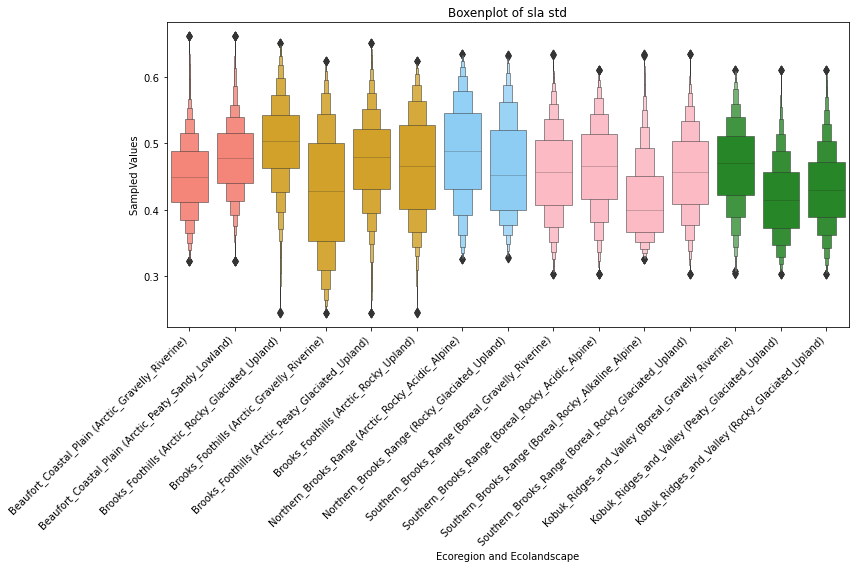

In [15]:
import os
import rasterio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
np.random.seed(42)
# Folder containing the .tif files
tif_folder = r'D:\wenqu\chapter1_2\figures\ecoregion\eco_lands\sla_std'

# Dictionary to map each .tif file to its corresponding ecoregion and sample points
tif_info = {
'Beaufort_Coastal_Plain_Arctic_Gravelly_Riverine_site6ab_sla_std.tif':('Beaufort_Coastal_Plain', 'Arctic_Gravelly_Riverine', 33497),
'Beaufort_Coastal_Plain_Arctic_Gravelly_Riverine_site6c_sla_std.tif':('Beaufort_Coastal_Plain', 'Arctic_Gravelly_Riverine',181197),   
'Beaufort_Coastal_Plain_Arctic_Gravelly_Riverine_site7_sla_std.tif':('Beaufort_Coastal_Plain', 'Arctic_Gravelly_Riverine', 183403),    
'Beaufort_Coastal_Plain_Arctic_Peaty_Sandy_Lowland_site6ab_sla_std.tif':('Beaufort_Coastal_Plain', 'Arctic_Peaty_Sandy_Lowland', 20401),
'Beaufort_Coastal_Plain_Arctic_Peaty_Sandy_Lowland_site7_sla_std.tif':('Beaufort_Coastal_Plain', 'Arctic_Peaty_Sandy_Lowland', 183403),  
'Beaufort_Coastal_Plain_Arctic_Peaty_Silty_Lowland_site6ab_sla_std.tif':('Beaufort_Coastal_Plain', 'Arctic_Peaty_Sandy_Lowland', 33497),   
'Beaufort_Coastal_Plain_Arctic_Peaty_Silty_Lowland_site6c_sla_std.tif':('Beaufort_Coastal_Plain', 'Arctic_Peaty_Sandy_Lowland', 181197), 
'Beaufort_Coastal_Plain_Arctic_Peaty_Silty_Lowland_site7_sla_std.tif':('Beaufort_Coastal_Plain', 'Arctic_Peaty_Sandy_Lowland', 183403),
'Brooks_Foothills_Arctic_Rocky_Glaciated_Upland_site4a_sla_std.tif':('Brooks_Foothills','Arctic_Rocky_Glaciated_Upland', 81225),
'Brooks_Foothills_Arctic_Rocky_Glaciated_Upland_site4b_sla_std.tif':('Brooks_Foothills', 'Arctic_Rocky_Glaciated_Upland', 220328),
'Brooks_Foothills_Arctic_Gravelly_Riverine_site4a_sla_std.tif':('Brooks_Foothills', 'Arctic_Gravelly_Riverine', 144299),
'Brooks_Foothills_Arctic_Gravelly_Riverine_site4b_sla_std.tif':('Brooks_Foothills', 'Arctic_Gravelly_Riverine', 220328),
'Brooks_Foothills_Arctic_Peaty_Glaciated_Upland_site4a_sla_std.tif':('Brooks_Foothills', 'Arctic_Peaty_Glaciated_Upland', 144299),  
'Brooks_Foothills_Arctic_Peaty_Glaciated_Upland_site4b_sla_std.tif':('Brooks_Foothills', 'Arctic_Peaty_Glaciated_Upland', 169308),
'Brooks_Foothills_Arctic_Rocky_Upland_site4a_sla_std.tif':('Brooks_Foothills', 'Arctic_Rocky_Upland', 13812),   
'Brooks_Foothills_Arctic_Rocky_Upland_site6c_sla_std.tif':('Brooks_Foothills', 'Arctic_Rocky_Upland', 6397), 
'Northern_Brooks_Range_Arctic_Rocky_Acidic_Alpine_site3b_sla_std.tif':('Northern_Brooks_Range', 'Arctic_Rocky_Acidic_Alpine', 607152), 
'Northern_Brooks_Range_Arctic_Rocky_Glaciated_Upland_site3b_sla_std.tif':('Northern_Brooks_Range', 'Rocky_Glaciated_Upland', 392847 ), 
'Southern_Brooks_Range_Boreal_Gravelly_Riverine_site2a_c_1b_sla_std.tif':('Southern_Brooks_Range', 'Boreal_Gravelly_Riverine', 232652),  
'Southern_Brooks_Range_Boreal_Gravelly_Riverine_site3b_sla_std.tif':('Southern_Brooks_Range', 'Boreal_Gravelly_Riverine', 86845), 
'Southern_Brooks_Range_Boreal_Rocky_Acidic_Alpine_site2a_c_1b_sla_std.tif':('Southern_Brooks_Range', 'Boreal_Rocky_Acidic_Alpine', 242746), 
'Southern_Brooks_Range_Boreal_Rocky_Acidic_Alpine_site3b_sla_std.tif':('Southern_Brooks_Range', 'Boreal_Rocky_Acidic_Alpine', 67786), 
'Southern_Brooks_Range_Boreal_Rocky_Alkaline_Alpine_site3b_sla_std.tif':('Southern_Brooks_Range', 'Boreal_Rocky_Alkaline_Alpine', 49196),  
'Southern_Brooks_Range_Boreal_Rocky_Glaciated_Upland_site2a_c_1b_sla_std.tif':('Southern_Brooks_Range', 'Boreal_Rocky_Glaciated_Upland', 232747),  
'Southern_Brooks_Range_Boreal_Rocky_Glaciated_Upland_site3b_sla_std.tif':('Southern_Brooks_Range', 'Boreal_Rocky_Glaciated_Upland', 88024),
'Kobuk_Ridges_and_Valley_Boreal_Gravelly_Riverine_site2a_c_1b_sla_std.tif':('Kobuk_Ridges_and_Valley', 'Boreal_Gravelly_Riverine', 356712),
'Kobuk_Ridges_and_Valley_Boreal_Peaty_Glaciated_Upland_site2a_c_1b_sla_std.tif':('Kobuk_Ridges_and_Valley', 'Peaty_Glaciated_Upland', 363506),
'Kobuk_Ridges_and_Valley_Boreal_Rocky_Glaciated_Upland_site2a_c_1b_sla_std.tif':('Kobuk_Ridges_and_Valley', 'Rocky_Glaciated_Upland', 279781)
}

# List to store the summarized data for each unique ecoregion and ecolandscape combination
ecoregion_values = {}

# Loop through all .tif files and sample the specified number of points
for tif_file, (ecoregion, ecolandscape, n_samples) in tif_info.items():
    tif_path = os.path.join(tif_folder, tif_file)
    
    if n_samples == 0:
        continue  # Skip files with zero sample points
    
    # Open the .tif file
    with rasterio.open(tif_path) as src:
        data = src.read(1)  # Read the raster data (assuming the first band)
        valid_mask = ~np.isnan(data)
        valid_indices = np.column_stack(np.where(valid_mask))
        
        if len(valid_indices) >= int(n_samples):
            sampled_indices = valid_indices[np.random.choice(len(valid_indices), int(n_samples), replace=False)]
        else:
            sampled_indices = valid_indices  # Take all points if less than required
        
        sampled_values = data[sampled_indices[:, 0], sampled_indices[:, 1]]
        
        key = (ecoregion, ecolandscape)
        if key not in ecoregion_values:
            ecoregion_values[key] = []
        
        ecoregion_values[key].extend(sampled_values)

# Convert the sampled values to a DataFrame for plotting
df_samples = pd.DataFrame({
    'Ecoregion': [ecoregion for (ecoregion, ecolandscape) in ecoregion_values.keys() for _ in ecoregion_values[(ecoregion, ecolandscape)]],
    'Ecolandscape': [ecolandscape for (ecoregion, ecolandscape) in ecoregion_values.keys() for _ in ecoregion_values[(ecoregion, ecolandscape)]],
    'Sampled Values': [value for values in ecoregion_values.values() for value in values]
})

# Combine Ecoregion and Ecolandscape for unique grouping
df_samples['Group'] = df_samples['Ecoregion'] + " (" + df_samples['Ecolandscape'] + ")"

# Define a specific color palette for each ecoregion with underscores matching the format in df_samples
color_map = {
    'Beaufort_Coastal_Plain': 'salmon',
    'Brooks_Foothills': 'goldenrod',
    'Northern_Brooks_Range': 'lightskyblue',
    'Southern_Brooks_Range': 'lightpink',
    'Kobuk_Ridges_and_Valley': 'forestgreen'
}

# Apply the specified color for each unique ecoregion across its different ecolandscapes
df_samples['Color'] = df_samples['Ecoregion'].map(lambda x: color_map.get(x, 'black'))

# Create the boxenplot grouped by the combined 'Group' (Ecoregion + Ecolandscape)
plt.figure(figsize=(12, 8))
sns.boxenplot(
    data=df_samples, 
    x='Group', 
    y='Sampled Values', 
    palette=df_samples.set_index('Group')['Color'].to_dict(),
    linewidth=.5, 
    saturation=0.9,
    trust_alpha=0.1
)

plt.title('Boxenplot of sla std')
plt.xlabel('Ecoregion and Ecolandscape')
plt.ylabel('Sampled Values')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig(r'D:\wenqu\chapter1_2\figures\ecolandsacpe_figures\Boxenplot of SLA std by Ecolandscape.png', dpi=300, bbox_inches='tight')
plt.show()

C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be

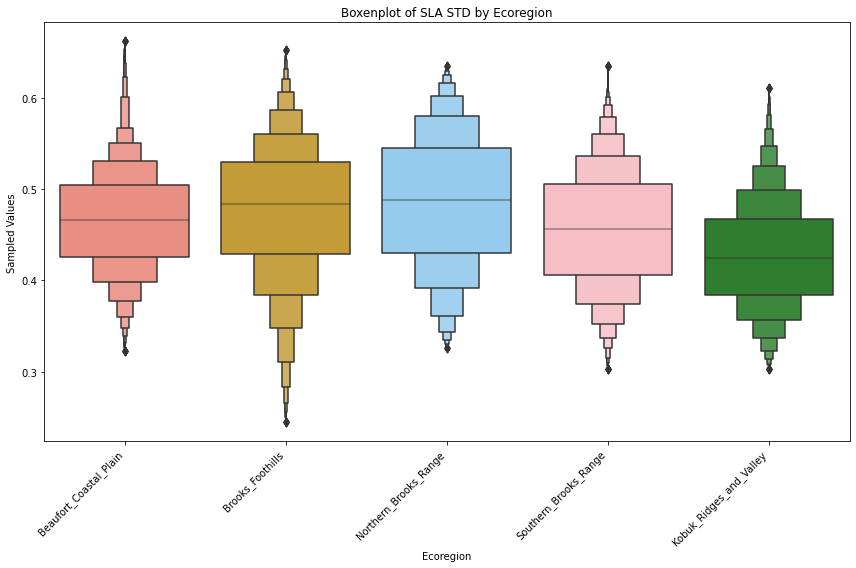

In [16]:
import os
import rasterio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(42)

# Folder containing the .tif files
tif_folder = r'D:\wenqu\chapter1_2\figures\ecoregion\eco_lands\sla_std'

# Dictionary to map each .tif file to its corresponding ecoregion and sample points
tif_info = {
    'Beaufort_Coastal_Plain_Arctic_Gravelly_Riverine_site6ab_sla_std.tif': ('Beaufort_Coastal_Plain', 33497),
    'Beaufort_Coastal_Plain_Arctic_Gravelly_Riverine_site6c_sla_std.tif': ('Beaufort_Coastal_Plain', 181197),   
    'Beaufort_Coastal_Plain_Arctic_Gravelly_Riverine_site7_sla_std.tif': ('Beaufort_Coastal_Plain', 183403),    
    'Beaufort_Coastal_Plain_Arctic_Peaty_Sandy_Lowland_site6ab_sla_std.tif': ('Beaufort_Coastal_Plain', 20401),
    'Beaufort_Coastal_Plain_Arctic_Peaty_Sandy_Lowland_site7_sla_std.tif': ('Beaufort_Coastal_Plain', 183403),  
    'Beaufort_Coastal_Plain_Arctic_Peaty_Silty_Lowland_site6ab_sla_std.tif': ('Beaufort_Coastal_Plain', 33497),   
    'Beaufort_Coastal_Plain_Arctic_Peaty_Silty_Lowland_site6c_sla_std.tif': ('Beaufort_Coastal_Plain', 181197), 
    'Beaufort_Coastal_Plain_Arctic_Peaty_Silty_Lowland_site7_sla_std.tif': ('Beaufort_Coastal_Plain', 183403),
    'Brooks_Foothills_Arctic_Rocky_Glaciated_Upland_site4a_sla_std.tif': ('Brooks_Foothills', 81225),
    'Brooks_Foothills_Arctic_Rocky_Glaciated_Upland_site4b_sla_std.tif': ('Brooks_Foothills', 220328),
    'Brooks_Foothills_Arctic_Gravelly_Riverine_site4a_sla_std.tif': ('Brooks_Foothills', 144299),
    'Brooks_Foothills_Arctic_Gravelly_Riverine_site4b_sla_std.tif': ('Brooks_Foothills', 220328),
    'Brooks_Foothills_Arctic_Peaty_Glaciated_Upland_site4a_sla_std.tif': ('Brooks_Foothills', 144299),  
    'Brooks_Foothills_Arctic_Peaty_Glaciated_Upland_site4b_sla_std.tif': ('Brooks_Foothills', 169308),
    'Brooks_Foothills_Arctic_Rocky_Upland_site4a_sla_std.tif': ('Brooks_Foothills', 13812),   
    'Brooks_Foothills_Arctic_Rocky_Upland_site6c_sla_std.tif': ('Brooks_Foothills', 6397), 
    'Northern_Brooks_Range_Arctic_Rocky_Acidic_Alpine_site3b_sla_std.tif': ('Northern_Brooks_Range', 607152), 
    'Northern_Brooks_Range_Arctic_Rocky_Glaciated_Upland_site3b_sla_std.tif': ('Northern_Brooks_Range', 392847), 
    'Southern_Brooks_Range_Boreal_Gravelly_Riverine_site2a_c_1b_sla_std.tif': ('Southern_Brooks_Range', 232652),  
    'Southern_Brooks_Range_Boreal_Gravelly_Riverine_site3b_sla_std.tif': ('Southern_Brooks_Range', 86845), 
    'Southern_Brooks_Range_Boreal_Rocky_Acidic_Alpine_site2a_c_1b_sla_std.tif': ('Southern_Brooks_Range', 242746), 
    'Southern_Brooks_Range_Boreal_Rocky_Acidic_Alpine_site3b_sla_std.tif': ('Southern_Brooks_Range', 67786), 
    'Southern_Brooks_Range_Boreal_Rocky_Alkaline_Alpine_site3b_sla_std.tif': ('Southern_Brooks_Range', 49196),  
    'Southern_Brooks_Range_Boreal_Rocky_Glaciated_Upland_site2a_c_1b_sla_std.tif': ('Southern_Brooks_Range', 232747),  
    'Southern_Brooks_Range_Boreal_Rocky_Glaciated_Upland_site3b_sla_std.tif': ('Southern_Brooks_Range', 88024),
    'Kobuk_Ridges_and_Valley_Boreal_Gravelly_Riverine_site2a_c_1b_sla_std.tif': ('Kobuk_Ridges_and_Valley', 356712),
    'Kobuk_Ridges_and_Valley_Boreal_Peaty_Glaciated_Upland_site2a_c_1b_sla_std.tif': ('Kobuk_Ridges_and_Valley', 363506),
    'Kobuk_Ridges_and_Valley_Boreal_Rocky_Glaciated_Upland_site2a_c_1b_sla_std.tif': ('Kobuk_Ridges_and_Valley', 279781)
}

# List to store the summarized data for each unique ecoregion
ecoregion_values = {}

# Loop through all .tif files and sample the specified number of points
for tif_file, (ecoregion, n_samples) in tif_info.items():
    tif_path = os.path.join(tif_folder, tif_file)
    
    if n_samples == 0:
        continue  # Skip files with zero sample points
    
    # Open the .tif file
    with rasterio.open(tif_path) as src:
        data = src.read(1)  # Read the raster data (assuming the first band)
        valid_mask = ~np.isnan(data)
        valid_indices = np.column_stack(np.where(valid_mask))
        
        if len(valid_indices) >= int(n_samples):
            sampled_indices = valid_indices[np.random.choice(len(valid_indices), int(n_samples), replace=False)]
        else:
            sampled_indices = valid_indices  # Take all points if less than required
        
        sampled_values = data[sampled_indices[:, 0], sampled_indices[:, 1]]
        
        if ecoregion not in ecoregion_values:
            ecoregion_values[ecoregion] = []
        
        ecoregion_values[ecoregion].extend(sampled_values)

# Convert the sampled values to a DataFrame for plotting
df_samples = pd.DataFrame({
    'Ecoregion': [ecoregion for ecoregion in ecoregion_values.keys() for _ in ecoregion_values[ecoregion]],
    'Sampled Values': [value for values in ecoregion_values.values() for value in values]
})

# Define a specific color palette for each ecoregion
color_map = {
    'Beaufort_Coastal_Plain': 'salmon',
    'Brooks_Foothills': 'goldenrod',
    'Northern_Brooks_Range': 'lightskyblue',
    'Southern_Brooks_Range': 'lightpink',
    'Kobuk_Ridges_and_Valley': 'forestgreen'
}

# Apply the specified color for each ecoregion
df_samples['Color'] = df_samples['Ecoregion'].map(lambda x: color_map.get(x, 'black'))

# Create a palette dictionary for Seaborn
palette = {ecoregion: color_map[ecoregion] for ecoregion in df_samples['Ecoregion'].unique()}

# Create the boxenplot grouped by ecoregion
plt.figure(figsize=(12, 8))
sns.boxenplot(
    data=df_samples, 
    x='Ecoregion', 
    y='Sampled Values', 
    palette=palette
)

plt.title('Boxenplot of SLA STD by Ecoregion')
plt.xlabel('Ecoregion')
plt.ylabel('Sampled Values')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig(r'D:\wenqu\chapter1_2\figures\ecolandsacpe_figures\Boxenplot of SLA std by Ecoregion.png', dpi=300, bbox_inches='tight')
plt.show()


# PC Ymax

C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be

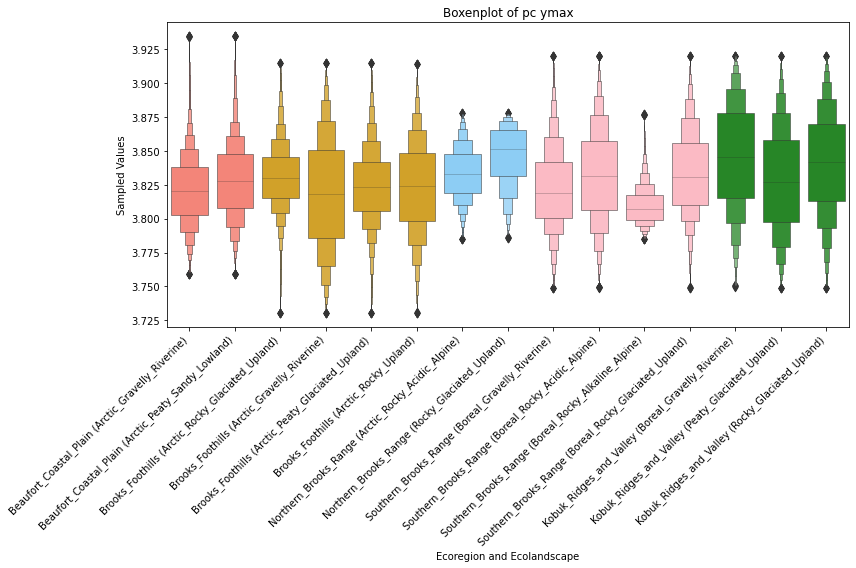

In [17]:
import os
import rasterio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
np.random.seed(42)
# Folder containing the .tif files
tif_folder = r'D:\wenqu\chapter1_2\figures\ecoregion\eco_lands\pc_ymax'

# Dictionary to map each .tif file to its corresponding ecoregion and sample points
tif_info = {
'Beaufort_Coastal_Plain_Arctic_Gravelly_Riverine_site6ab_pc_ymax.tif':('Beaufort_Coastal_Plain', 'Arctic_Gravelly_Riverine', 33497),
'Beaufort_Coastal_Plain_Arctic_Gravelly_Riverine_site6c_pc_ymax.tif':('Beaufort_Coastal_Plain', 'Arctic_Gravelly_Riverine',181197),   
'Beaufort_Coastal_Plain_Arctic_Gravelly_Riverine_site7_pc_ymax.tif':('Beaufort_Coastal_Plain', 'Arctic_Gravelly_Riverine', 183403),    
'Beaufort_Coastal_Plain_Arctic_Peaty_Sandy_Lowland_site6ab_pc_ymax.tif':('Beaufort_Coastal_Plain', 'Arctic_Peaty_Sandy_Lowland', 20401),
'Beaufort_Coastal_Plain_Arctic_Peaty_Sandy_Lowland_site7_pc_ymax.tif':('Beaufort_Coastal_Plain', 'Arctic_Peaty_Sandy_Lowland', 183403),  
'Beaufort_Coastal_Plain_Arctic_Peaty_Silty_Lowland_site6ab_pc_ymax.tif':('Beaufort_Coastal_Plain', 'Arctic_Peaty_Sandy_Lowland', 33497),   
'Beaufort_Coastal_Plain_Arctic_Peaty_Silty_Lowland_site6c_pc_ymax.tif':('Beaufort_Coastal_Plain', 'Arctic_Peaty_Sandy_Lowland', 181197), 
'Beaufort_Coastal_Plain_Arctic_Peaty_Silty_Lowland_site7_pc_ymax.tif':('Beaufort_Coastal_Plain', 'Arctic_Peaty_Sandy_Lowland', 183403),
'Brooks_Foothills_Arctic_Rocky_Glaciated_Upland_site4a_pc_ymax.tif':('Brooks_Foothills','Arctic_Rocky_Glaciated_Upland', 81225),
'Brooks_Foothills_Arctic_Rocky_Glaciated_Upland_site4b_pc_ymax.tif':('Brooks_Foothills', 'Arctic_Rocky_Glaciated_Upland', 220328),
'Brooks_Foothills_Arctic_Gravelly_Riverine_site4a_pc_ymax.tif':('Brooks_Foothills', 'Arctic_Gravelly_Riverine', 144299),
'Brooks_Foothills_Arctic_Gravelly_Riverine_site4b_pc_ymax.tif':('Brooks_Foothills', 'Arctic_Gravelly_Riverine', 220328),
'Brooks_Foothills_Arctic_Peaty_Glaciated_Upland_site4a_pc_ymax.tif':('Brooks_Foothills', 'Arctic_Peaty_Glaciated_Upland', 144299),  
'Brooks_Foothills_Arctic_Peaty_Glaciated_Upland_site4b_pc_ymax.tif':('Brooks_Foothills', 'Arctic_Peaty_Glaciated_Upland', 169308),
'Brooks_Foothills_Arctic_Rocky_Upland_site4a_pc_ymax.tif':('Brooks_Foothills', 'Arctic_Rocky_Upland', 13812),   
'Brooks_Foothills_Arctic_Rocky_Upland_site6c_pc_ymax.tif':('Brooks_Foothills', 'Arctic_Rocky_Upland', 6397), 
'Northern_Brooks_Range_Arctic_Rocky_Acidic_Alpine_site3b_pc_ymax.tif':('Northern_Brooks_Range', 'Arctic_Rocky_Acidic_Alpine', 607152), 
'Northern_Brooks_Range_Arctic_Rocky_Glaciated_Upland_site3b_pc_ymax.tif':('Northern_Brooks_Range', 'Rocky_Glaciated_Upland', 392847 ), 
'Southern_Brooks_Range_Boreal_Gravelly_Riverine_site2a_c_1b_pc_ymax.tif':('Southern_Brooks_Range', 'Boreal_Gravelly_Riverine', 232652),  
'Southern_Brooks_Range_Boreal_Gravelly_Riverine_site3b_pc_ymax.tif':('Southern_Brooks_Range', 'Boreal_Gravelly_Riverine', 86845), 
'Southern_Brooks_Range_Boreal_Rocky_Acidic_Alpine_site2a_c_1b_pc_ymax.tif':('Southern_Brooks_Range', 'Boreal_Rocky_Acidic_Alpine', 242746), 
'Southern_Brooks_Range_Boreal_Rocky_Acidic_Alpine_site3b_pc_ymax.tif':('Southern_Brooks_Range', 'Boreal_Rocky_Acidic_Alpine', 67786), 
'Southern_Brooks_Range_Boreal_Rocky_Alkaline_Alpine_site3b_pc_ymax.tif':('Southern_Brooks_Range', 'Boreal_Rocky_Alkaline_Alpine', 49196),  
'Southern_Brooks_Range_Boreal_Rocky_Glaciated_Upland_site2a_c_1b_pc_ymax.tif':('Southern_Brooks_Range', 'Boreal_Rocky_Glaciated_Upland', 232747),  
'Southern_Brooks_Range_Boreal_Rocky_Glaciated_Upland_site3b_pc_ymax.tif':('Southern_Brooks_Range', 'Boreal_Rocky_Glaciated_Upland', 88024),
'Kobuk_Ridges_and_Valley_Boreal_Gravelly_Riverine_site2a_c_1b_pc_ymax.tif':('Kobuk_Ridges_and_Valley', 'Boreal_Gravelly_Riverine', 356712),
'Kobuk_Ridges_and_Valley_Boreal_Peaty_Glaciated_Upland_site2a_c_1b_pc_ymax.tif':('Kobuk_Ridges_and_Valley', 'Peaty_Glaciated_Upland', 363506),
'Kobuk_Ridges_and_Valley_Boreal_Rocky_Glaciated_Upland_site2a_c_1b_pc_ymax.tif':('Kobuk_Ridges_and_Valley', 'Rocky_Glaciated_Upland', 279781)
}

# List to store the summarized data for each unique ecoregion and ecolandscape combination
ecoregion_values = {}

# Loop through all .tif files and sample the specified number of points
for tif_file, (ecoregion, ecolandscape, n_samples) in tif_info.items():
    tif_path = os.path.join(tif_folder, tif_file)
    
    if n_samples == 0:
        continue  # Skip files with zero sample points
    
    # Open the .tif file
    with rasterio.open(tif_path) as src:
        data = src.read(1)  # Read the raster data (assuming the first band)
        valid_mask = ~np.isnan(data)
        valid_indices = np.column_stack(np.where(valid_mask))
        
        if len(valid_indices) >= int(n_samples):
            sampled_indices = valid_indices[np.random.choice(len(valid_indices), int(n_samples), replace=False)]
        else:
            sampled_indices = valid_indices  # Take all points if less than required
        
        sampled_values = data[sampled_indices[:, 0], sampled_indices[:, 1]]
        
        key = (ecoregion, ecolandscape)
        if key not in ecoregion_values:
            ecoregion_values[key] = []
        
        ecoregion_values[key].extend(sampled_values)

# Convert the sampled values to a DataFrame for plotting
df_samples = pd.DataFrame({
    'Ecoregion': [ecoregion for (ecoregion, ecolandscape) in ecoregion_values.keys() for _ in ecoregion_values[(ecoregion, ecolandscape)]],
    'Ecolandscape': [ecolandscape for (ecoregion, ecolandscape) in ecoregion_values.keys() for _ in ecoregion_values[(ecoregion, ecolandscape)]],
    'Sampled Values': [value for values in ecoregion_values.values() for value in values]
})

# Combine Ecoregion and Ecolandscape for unique grouping
df_samples['Group'] = df_samples['Ecoregion'] + " (" + df_samples['Ecolandscape'] + ")"

# Define a specific color palette for each ecoregion with underscores matching the format in df_samples
color_map = {
    'Beaufort_Coastal_Plain': 'salmon',
    'Brooks_Foothills': 'goldenrod',
    'Northern_Brooks_Range': 'lightskyblue',
    'Southern_Brooks_Range': 'lightpink',
    'Kobuk_Ridges_and_Valley': 'forestgreen'
}

# Apply the specified color for each unique ecoregion across its different ecolandscapes
df_samples['Color'] = df_samples['Ecoregion'].map(lambda x: color_map.get(x, 'black'))

# Create the boxenplot grouped by the combined 'Group' (Ecoregion + Ecolandscape)
plt.figure(figsize=(12, 8))
sns.boxenplot(
    data=df_samples, 
    x='Group', 
    y='Sampled Values', 
    palette=df_samples.set_index('Group')['Color'].to_dict(),
    linewidth=.5, 
    saturation=0.9,
    trust_alpha=0.1
)

plt.title('Boxenplot of pc ymax')
plt.xlabel('Ecoregion and Ecolandscape')
plt.ylabel('Sampled Values')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig(r'D:\wenqu\chapter1_2\figures\ecolandsacpe_figures\Boxenplot of PC YMAX by Ecolandscape.png', dpi=300, bbox_inches='tight')
plt.show()

C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be

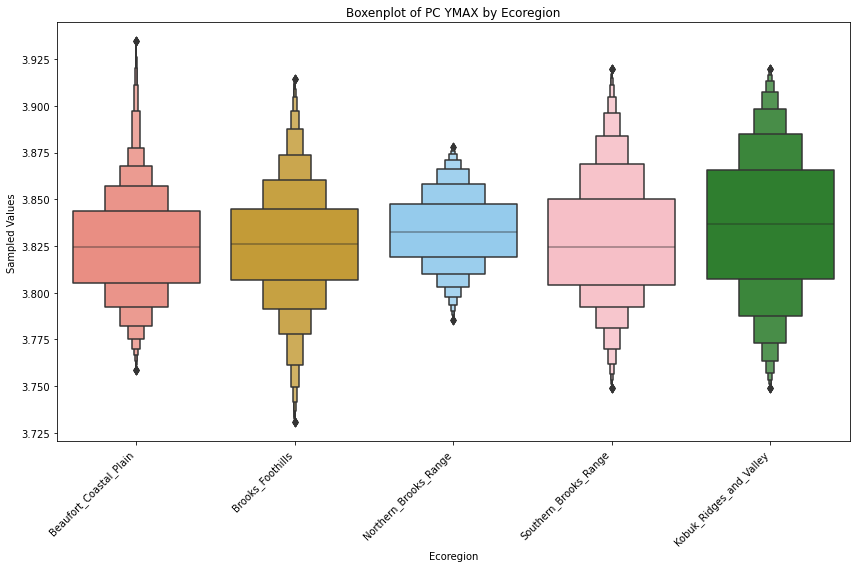

In [18]:
import os
import rasterio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(42)

# Folder containing the .tif files
tif_folder = r'D:\wenqu\chapter1_2\figures\ecoregion\eco_lands\pc_ymax'

# Dictionary to map each .tif file to its corresponding ecoregion and sample points
tif_info = {
    'Beaufort_Coastal_Plain_Arctic_Gravelly_Riverine_site6ab_pc_ymax.tif': ('Beaufort_Coastal_Plain', 33497),
    'Beaufort_Coastal_Plain_Arctic_Gravelly_Riverine_site6c_pc_ymax.tif': ('Beaufort_Coastal_Plain', 181197),   
    'Beaufort_Coastal_Plain_Arctic_Gravelly_Riverine_site7_pc_ymax.tif': ('Beaufort_Coastal_Plain', 183403),    
    'Beaufort_Coastal_Plain_Arctic_Peaty_Sandy_Lowland_site6ab_pc_ymax.tif': ('Beaufort_Coastal_Plain', 20401),
    'Beaufort_Coastal_Plain_Arctic_Peaty_Sandy_Lowland_site7_pc_ymax.tif': ('Beaufort_Coastal_Plain', 183403),  
    'Beaufort_Coastal_Plain_Arctic_Peaty_Silty_Lowland_site6ab_pc_ymax.tif': ('Beaufort_Coastal_Plain', 33497),   
    'Beaufort_Coastal_Plain_Arctic_Peaty_Silty_Lowland_site6c_pc_ymax.tif': ('Beaufort_Coastal_Plain', 181197), 
    'Beaufort_Coastal_Plain_Arctic_Peaty_Silty_Lowland_site7_pc_ymax.tif': ('Beaufort_Coastal_Plain', 183403),
    'Brooks_Foothills_Arctic_Rocky_Glaciated_Upland_site4a_pc_ymax.tif': ('Brooks_Foothills', 81225),
    'Brooks_Foothills_Arctic_Rocky_Glaciated_Upland_site4b_pc_ymax.tif': ('Brooks_Foothills', 220328),
    'Brooks_Foothills_Arctic_Gravelly_Riverine_site4a_pc_ymax.tif': ('Brooks_Foothills', 144299),
    'Brooks_Foothills_Arctic_Gravelly_Riverine_site4b_pc_ymax.tif': ('Brooks_Foothills', 220328),
    'Brooks_Foothills_Arctic_Peaty_Glaciated_Upland_site4a_pc_ymax.tif': ('Brooks_Foothills', 144299),  
    'Brooks_Foothills_Arctic_Peaty_Glaciated_Upland_site4b_pc_ymax.tif': ('Brooks_Foothills', 169308),
    'Brooks_Foothills_Arctic_Rocky_Upland_site4a_pc_ymax.tif': ('Brooks_Foothills', 13812),   
    'Brooks_Foothills_Arctic_Rocky_Upland_site6c_pc_ymax.tif': ('Brooks_Foothills', 6397), 
    'Northern_Brooks_Range_Arctic_Rocky_Acidic_Alpine_site3b_pc_ymax.tif': ('Northern_Brooks_Range', 607152), 
    'Northern_Brooks_Range_Arctic_Rocky_Glaciated_Upland_site3b_pc_ymax.tif': ('Northern_Brooks_Range', 392847), 
    'Southern_Brooks_Range_Boreal_Gravelly_Riverine_site2a_c_1b_pc_ymax.tif': ('Southern_Brooks_Range', 232652),  
    'Southern_Brooks_Range_Boreal_Gravelly_Riverine_site3b_pc_ymax.tif': ('Southern_Brooks_Range', 86845), 
    'Southern_Brooks_Range_Boreal_Rocky_Acidic_Alpine_site2a_c_1b_pc_ymax.tif': ('Southern_Brooks_Range', 242746), 
    'Southern_Brooks_Range_Boreal_Rocky_Acidic_Alpine_site3b_pc_ymax.tif': ('Southern_Brooks_Range', 67786), 
    'Southern_Brooks_Range_Boreal_Rocky_Alkaline_Alpine_site3b_pc_ymax.tif': ('Southern_Brooks_Range', 49196),  
    'Southern_Brooks_Range_Boreal_Rocky_Glaciated_Upland_site2a_c_1b_pc_ymax.tif': ('Southern_Brooks_Range', 232747),  
    'Southern_Brooks_Range_Boreal_Rocky_Glaciated_Upland_site3b_pc_ymax.tif': ('Southern_Brooks_Range', 88024),
    'Kobuk_Ridges_and_Valley_Boreal_Gravelly_Riverine_site2a_c_1b_pc_ymax.tif': ('Kobuk_Ridges_and_Valley', 356712),
    'Kobuk_Ridges_and_Valley_Boreal_Peaty_Glaciated_Upland_site2a_c_1b_pc_ymax.tif': ('Kobuk_Ridges_and_Valley', 363506),
    'Kobuk_Ridges_and_Valley_Boreal_Rocky_Glaciated_Upland_site2a_c_1b_pc_ymax.tif': ('Kobuk_Ridges_and_Valley', 279781)
}

# List to store the summarized data for each unique ecoregion
ecoregion_values = {}

# Loop through all .tif files and sample the specified number of points
for tif_file, (ecoregion, n_samples) in tif_info.items():
    tif_path = os.path.join(tif_folder, tif_file)
    
    if n_samples == 0:
        continue  # Skip files with zero sample points
    
    # Open the .tif file
    with rasterio.open(tif_path) as src:
        data = src.read(1)  # Read the raster data (assuming the first band)
        valid_mask = ~np.isnan(data)
        valid_indices = np.column_stack(np.where(valid_mask))
        
        if len(valid_indices) >= int(n_samples):
            sampled_indices = valid_indices[np.random.choice(len(valid_indices), int(n_samples), replace=False)]
        else:
            sampled_indices = valid_indices  # Take all points if less than required
        
        sampled_values = data[sampled_indices[:, 0], sampled_indices[:, 1]]
        
        if ecoregion not in ecoregion_values:
            ecoregion_values[ecoregion] = []
        
        ecoregion_values[ecoregion].extend(sampled_values)

# Convert the sampled values to a DataFrame for plotting
df_samples = pd.DataFrame({
    'Ecoregion': [ecoregion for ecoregion in ecoregion_values.keys() for _ in ecoregion_values[ecoregion]],
    'Sampled Values': [value for values in ecoregion_values.values() for value in values]
})

# Define a specific color palette for each ecoregion
color_map = {
    'Beaufort_Coastal_Plain': 'salmon',
    'Brooks_Foothills': 'goldenrod',
    'Northern_Brooks_Range': 'lightskyblue',
    'Southern_Brooks_Range': 'lightpink',
    'Kobuk_Ridges_and_Valley': 'forestgreen'
}

# Apply the specified color for each ecoregion
df_samples['Color'] = df_samples['Ecoregion'].map(lambda x: color_map.get(x, 'black'))

# Create a palette dictionary for Seaborn
palette = {ecoregion: color_map[ecoregion] for ecoregion in df_samples['Ecoregion'].unique()}

# Create the boxenplot grouped by ecoregion
plt.figure(figsize=(12, 8))
sns.boxenplot(
    data=df_samples, 
    x='Ecoregion', 
    y='Sampled Values', 
    palette=palette
)

plt.title('Boxenplot of PC YMAX by Ecoregion')
plt.xlabel('Ecoregion')
plt.ylabel('Sampled Values')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig(r'D:\wenqu\chapter1_2\figures\ecolandsacpe_figures\Boxenplot of PC YMAX by Ecoregion.png', dpi=300, bbox_inches='tight')
plt.show()


# PC STD

C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be

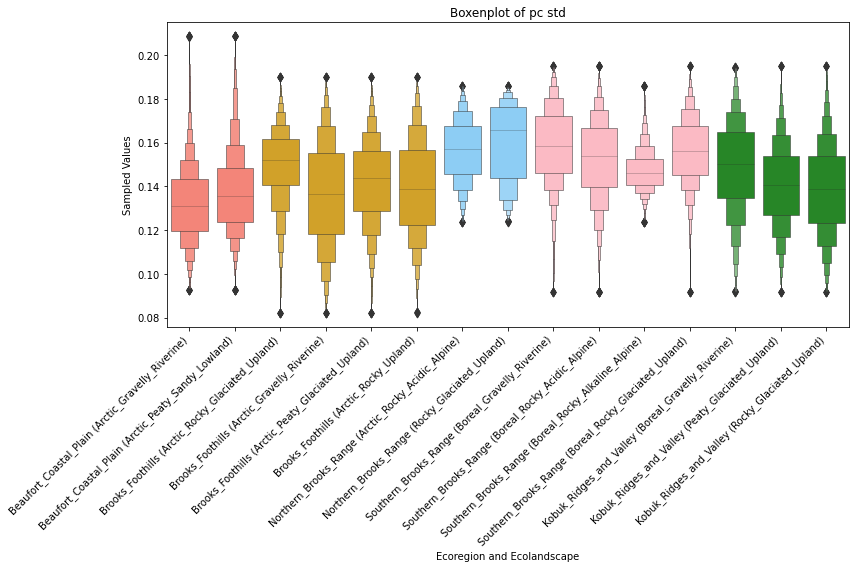

In [19]:
import os
import rasterio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
np.random.seed(42)
# Folder containing the .tif files
tif_folder = r'D:\wenqu\chapter1_2\figures\ecoregion\eco_lands\pc_std'

# Dictionary to map each .tif file to its corresponding ecoregion and sample points
tif_info = {
'Beaufort_Coastal_Plain_Arctic_Gravelly_Riverine_site6ab_pc_std.tif':('Beaufort_Coastal_Plain', 'Arctic_Gravelly_Riverine', 33497),
'Beaufort_Coastal_Plain_Arctic_Gravelly_Riverine_site6c_pc_std.tif':('Beaufort_Coastal_Plain', 'Arctic_Gravelly_Riverine',181197),   
'Beaufort_Coastal_Plain_Arctic_Gravelly_Riverine_site7_pc_std.tif':('Beaufort_Coastal_Plain', 'Arctic_Gravelly_Riverine', 183403),    
'Beaufort_Coastal_Plain_Arctic_Peaty_Sandy_Lowland_site6ab_pc_std.tif':('Beaufort_Coastal_Plain', 'Arctic_Peaty_Sandy_Lowland', 20401),
'Beaufort_Coastal_Plain_Arctic_Peaty_Sandy_Lowland_site7_pc_std.tif':('Beaufort_Coastal_Plain', 'Arctic_Peaty_Sandy_Lowland', 183403),  
'Beaufort_Coastal_Plain_Arctic_Peaty_Silty_Lowland_site6ab_pc_std.tif':('Beaufort_Coastal_Plain', 'Arctic_Peaty_Sandy_Lowland', 33497),   
'Beaufort_Coastal_Plain_Arctic_Peaty_Silty_Lowland_site6c_pc_std.tif':('Beaufort_Coastal_Plain', 'Arctic_Peaty_Sandy_Lowland', 181197), 
'Beaufort_Coastal_Plain_Arctic_Peaty_Silty_Lowland_site7_pc_std.tif':('Beaufort_Coastal_Plain', 'Arctic_Peaty_Sandy_Lowland', 183403),
'Brooks_Foothills_Arctic_Rocky_Glaciated_Upland_site4a_pc_std.tif':('Brooks_Foothills','Arctic_Rocky_Glaciated_Upland', 81225),
'Brooks_Foothills_Arctic_Rocky_Glaciated_Upland_site4b_pc_std.tif':('Brooks_Foothills', 'Arctic_Rocky_Glaciated_Upland', 220328),
'Brooks_Foothills_Arctic_Gravelly_Riverine_site4a_pc_std.tif':('Brooks_Foothills', 'Arctic_Gravelly_Riverine', 144299),
'Brooks_Foothills_Arctic_Gravelly_Riverine_site4b_pc_std.tif':('Brooks_Foothills', 'Arctic_Gravelly_Riverine', 220328),
'Brooks_Foothills_Arctic_Peaty_Glaciated_Upland_site4a_pc_std.tif':('Brooks_Foothills', 'Arctic_Peaty_Glaciated_Upland', 144299),  
'Brooks_Foothills_Arctic_Peaty_Glaciated_Upland_site4b_pc_std.tif':('Brooks_Foothills', 'Arctic_Peaty_Glaciated_Upland', 169308),
'Brooks_Foothills_Arctic_Rocky_Upland_site4a_pc_std.tif':('Brooks_Foothills', 'Arctic_Rocky_Upland', 13812),   
'Brooks_Foothills_Arctic_Rocky_Upland_site6c_pc_std.tif':('Brooks_Foothills', 'Arctic_Rocky_Upland', 6397), 
'Northern_Brooks_Range_Arctic_Rocky_Acidic_Alpine_site3b_pc_std.tif':('Northern_Brooks_Range', 'Arctic_Rocky_Acidic_Alpine', 607152), 
'Northern_Brooks_Range_Arctic_Rocky_Glaciated_Upland_site3b_pc_std.tif':('Northern_Brooks_Range', 'Rocky_Glaciated_Upland', 392847 ), 
'Southern_Brooks_Range_Boreal_Gravelly_Riverine_site2a_c_1b_pc_std.tif':('Southern_Brooks_Range', 'Boreal_Gravelly_Riverine', 232652),  
'Southern_Brooks_Range_Boreal_Gravelly_Riverine_site3b_pc_std.tif':('Southern_Brooks_Range', 'Boreal_Gravelly_Riverine', 86845), 
'Southern_Brooks_Range_Boreal_Rocky_Acidic_Alpine_site2a_c_1b_pc_std.tif':('Southern_Brooks_Range', 'Boreal_Rocky_Acidic_Alpine', 242746), 
'Southern_Brooks_Range_Boreal_Rocky_Acidic_Alpine_site3b_pc_std.tif':('Southern_Brooks_Range', 'Boreal_Rocky_Acidic_Alpine', 67786), 
'Southern_Brooks_Range_Boreal_Rocky_Alkaline_Alpine_site3b_pc_std.tif':('Southern_Brooks_Range', 'Boreal_Rocky_Alkaline_Alpine', 49196),  
'Southern_Brooks_Range_Boreal_Rocky_Glaciated_Upland_site2a_c_1b_pc_std.tif':('Southern_Brooks_Range', 'Boreal_Rocky_Glaciated_Upland', 232747),  
'Southern_Brooks_Range_Boreal_Rocky_Glaciated_Upland_site3b_pc_std.tif':('Southern_Brooks_Range', 'Boreal_Rocky_Glaciated_Upland', 88024),
'Kobuk_Ridges_and_Valley_Boreal_Gravelly_Riverine_site2a_c_1b_pc_std.tif':('Kobuk_Ridges_and_Valley', 'Boreal_Gravelly_Riverine', 356712),
'Kobuk_Ridges_and_Valley_Boreal_Peaty_Glaciated_Upland_site2a_c_1b_pc_std.tif':('Kobuk_Ridges_and_Valley', 'Peaty_Glaciated_Upland', 363506),
'Kobuk_Ridges_and_Valley_Boreal_Rocky_Glaciated_Upland_site2a_c_1b_pc_std.tif':('Kobuk_Ridges_and_Valley', 'Rocky_Glaciated_Upland', 279781)
}

# List to store the summarized data for each unique ecoregion and ecolandscape combination
ecoregion_values = {}

# Loop through all .tif files and sample the specified number of points
for tif_file, (ecoregion, ecolandscape, n_samples) in tif_info.items():
    tif_path = os.path.join(tif_folder, tif_file)
    
    if n_samples == 0:
        continue  # Skip files with zero sample points
    
    # Open the .tif file
    with rasterio.open(tif_path) as src:
        data = src.read(1)  # Read the raster data (assuming the first band)
        valid_mask = ~np.isnan(data)
        valid_indices = np.column_stack(np.where(valid_mask))
        
        if len(valid_indices) >= int(n_samples):
            sampled_indices = valid_indices[np.random.choice(len(valid_indices), int(n_samples), replace=False)]
        else:
            sampled_indices = valid_indices  # Take all points if less than required
        
        sampled_values = data[sampled_indices[:, 0], sampled_indices[:, 1]]
        
        key = (ecoregion, ecolandscape)
        if key not in ecoregion_values:
            ecoregion_values[key] = []
        
        ecoregion_values[key].extend(sampled_values)

# Convert the sampled values to a DataFrame for plotting
df_samples = pd.DataFrame({
    'Ecoregion': [ecoregion for (ecoregion, ecolandscape) in ecoregion_values.keys() for _ in ecoregion_values[(ecoregion, ecolandscape)]],
    'Ecolandscape': [ecolandscape for (ecoregion, ecolandscape) in ecoregion_values.keys() for _ in ecoregion_values[(ecoregion, ecolandscape)]],
    'Sampled Values': [value for values in ecoregion_values.values() for value in values]
})

# Combine Ecoregion and Ecolandscape for unique grouping
df_samples['Group'] = df_samples['Ecoregion'] + " (" + df_samples['Ecolandscape'] + ")"

# Define a specific color palette for each ecoregion with underscores matching the format in df_samples
color_map = {
    'Beaufort_Coastal_Plain': 'salmon',
    'Brooks_Foothills': 'goldenrod',
    'Northern_Brooks_Range': 'lightskyblue',
    'Southern_Brooks_Range': 'lightpink',
    'Kobuk_Ridges_and_Valley': 'forestgreen'
}

# Apply the specified color for each unique ecoregion across its different ecolandscapes
df_samples['Color'] = df_samples['Ecoregion'].map(lambda x: color_map.get(x, 'black'))

# Create the boxenplot grouped by the combined 'Group' (Ecoregion + Ecolandscape)
plt.figure(figsize=(12, 8))
sns.boxenplot(
    data=df_samples, 
    x='Group', 
    y='Sampled Values', 
    palette=df_samples.set_index('Group')['Color'].to_dict(),
    linewidth=.5, 
    saturation=0.9,
    trust_alpha=0.1
)

plt.title('Boxenplot of pc std')
plt.xlabel('Ecoregion and Ecolandscape')
plt.ylabel('Sampled Values')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig(r'D:\wenqu\chapter1_2\figures\ecolandsacpe_figures\Boxenplot of PC STD by Ecolandscape.png', dpi=300, bbox_inches='tight')
plt.show()

C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be

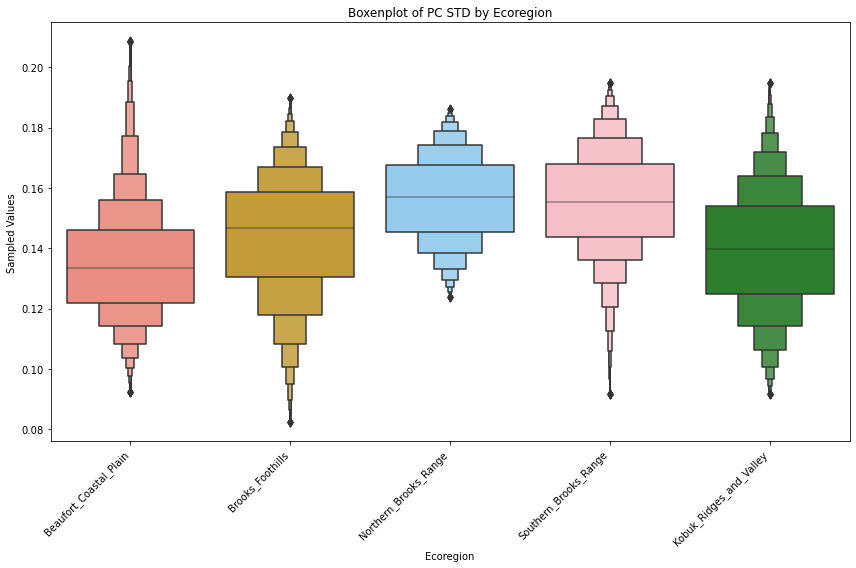

In [20]:
import os
import rasterio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(42)

# Folder containing the .tif files
tif_folder = r'D:\wenqu\chapter1_2\figures\ecoregion\eco_lands\pc_std'

# Dictionary to map each .tif file to its corresponding ecoregion and sample points
tif_info = {
    'Beaufort_Coastal_Plain_Arctic_Gravelly_Riverine_site6ab_pc_std.tif': ('Beaufort_Coastal_Plain', 33497),
    'Beaufort_Coastal_Plain_Arctic_Gravelly_Riverine_site6c_pc_std.tif': ('Beaufort_Coastal_Plain', 181197),   
    'Beaufort_Coastal_Plain_Arctic_Gravelly_Riverine_site7_pc_std.tif': ('Beaufort_Coastal_Plain', 183403),    
    'Beaufort_Coastal_Plain_Arctic_Peaty_Sandy_Lowland_site6ab_pc_std.tif': ('Beaufort_Coastal_Plain', 20401),
    'Beaufort_Coastal_Plain_Arctic_Peaty_Sandy_Lowland_site7_pc_std.tif': ('Beaufort_Coastal_Plain', 183403),  
    'Beaufort_Coastal_Plain_Arctic_Peaty_Silty_Lowland_site6ab_pc_std.tif': ('Beaufort_Coastal_Plain', 33497),   
    'Beaufort_Coastal_Plain_Arctic_Peaty_Silty_Lowland_site6c_pc_std.tif': ('Beaufort_Coastal_Plain', 181197), 
    'Beaufort_Coastal_Plain_Arctic_Peaty_Silty_Lowland_site7_pc_std.tif': ('Beaufort_Coastal_Plain', 183403),
    'Brooks_Foothills_Arctic_Rocky_Glaciated_Upland_site4a_pc_std.tif': ('Brooks_Foothills', 81225),
    'Brooks_Foothills_Arctic_Rocky_Glaciated_Upland_site4b_pc_std.tif': ('Brooks_Foothills', 220328),
    'Brooks_Foothills_Arctic_Gravelly_Riverine_site4a_pc_std.tif': ('Brooks_Foothills', 144299),
    'Brooks_Foothills_Arctic_Gravelly_Riverine_site4b_pc_std.tif': ('Brooks_Foothills', 220328),
    'Brooks_Foothills_Arctic_Peaty_Glaciated_Upland_site4a_pc_std.tif': ('Brooks_Foothills', 144299),  
    'Brooks_Foothills_Arctic_Peaty_Glaciated_Upland_site4b_pc_std.tif': ('Brooks_Foothills', 169308),
    'Brooks_Foothills_Arctic_Rocky_Upland_site4a_pc_std.tif': ('Brooks_Foothills', 13812),   
    'Brooks_Foothills_Arctic_Rocky_Upland_site6c_pc_std.tif': ('Brooks_Foothills', 6397), 
    'Northern_Brooks_Range_Arctic_Rocky_Acidic_Alpine_site3b_pc_std.tif': ('Northern_Brooks_Range', 607152), 
    'Northern_Brooks_Range_Arctic_Rocky_Glaciated_Upland_site3b_pc_std.tif': ('Northern_Brooks_Range', 392847), 
    'Southern_Brooks_Range_Boreal_Gravelly_Riverine_site2a_c_1b_pc_std.tif': ('Southern_Brooks_Range', 232652),  
    'Southern_Brooks_Range_Boreal_Gravelly_Riverine_site3b_pc_std.tif': ('Southern_Brooks_Range', 86845), 
    'Southern_Brooks_Range_Boreal_Rocky_Acidic_Alpine_site2a_c_1b_pc_std.tif': ('Southern_Brooks_Range', 242746), 
    'Southern_Brooks_Range_Boreal_Rocky_Acidic_Alpine_site3b_pc_std.tif': ('Southern_Brooks_Range', 67786), 
    'Southern_Brooks_Range_Boreal_Rocky_Alkaline_Alpine_site3b_pc_std.tif': ('Southern_Brooks_Range', 49196),  
    'Southern_Brooks_Range_Boreal_Rocky_Glaciated_Upland_site2a_c_1b_pc_std.tif': ('Southern_Brooks_Range', 232747),  
    'Southern_Brooks_Range_Boreal_Rocky_Glaciated_Upland_site3b_pc_std.tif': ('Southern_Brooks_Range', 88024),
    'Kobuk_Ridges_and_Valley_Boreal_Gravelly_Riverine_site2a_c_1b_pc_std.tif': ('Kobuk_Ridges_and_Valley', 356712),
    'Kobuk_Ridges_and_Valley_Boreal_Peaty_Glaciated_Upland_site2a_c_1b_pc_std.tif': ('Kobuk_Ridges_and_Valley', 363506),
    'Kobuk_Ridges_and_Valley_Boreal_Rocky_Glaciated_Upland_site2a_c_1b_pc_std.tif': ('Kobuk_Ridges_and_Valley', 279781)
}

# List to store the summarized data for each unique ecoregion
ecoregion_values = {}

# Loop through all .tif files and sample the specified number of points
for tif_file, (ecoregion, n_samples) in tif_info.items():
    tif_path = os.path.join(tif_folder, tif_file)
    
    if n_samples == 0:
        continue  # Skip files with zero sample points
    
    # Open the .tif file
    with rasterio.open(tif_path) as src:
        data = src.read(1)  # Read the raster data (assuming the first band)
        valid_mask = ~np.isnan(data)
        valid_indices = np.column_stack(np.where(valid_mask))
        
        if len(valid_indices) >= int(n_samples):
            sampled_indices = valid_indices[np.random.choice(len(valid_indices), int(n_samples), replace=False)]
        else:
            sampled_indices = valid_indices  # Take all points if less than required
        
        sampled_values = data[sampled_indices[:, 0], sampled_indices[:, 1]]
        
        if ecoregion not in ecoregion_values:
            ecoregion_values[ecoregion] = []
        
        ecoregion_values[ecoregion].extend(sampled_values)

# Convert the sampled values to a DataFrame for plotting
df_samples = pd.DataFrame({
    'Ecoregion': [ecoregion for ecoregion in ecoregion_values.keys() for _ in ecoregion_values[ecoregion]],
    'Sampled Values': [value for values in ecoregion_values.values() for value in values]
})

# Define a specific color palette for each ecoregion
color_map = {
    'Beaufort_Coastal_Plain': 'salmon',
    'Brooks_Foothills': 'goldenrod',
    'Northern_Brooks_Range': 'lightskyblue',
    'Southern_Brooks_Range': 'lightpink',
    'Kobuk_Ridges_and_Valley': 'forestgreen'
}

# Apply the specified color for each ecoregion
df_samples['Color'] = df_samples['Ecoregion'].map(lambda x: color_map.get(x, 'black'))

# Create a palette dictionary for Seaborn
palette = {ecoregion: color_map[ecoregion] for ecoregion in df_samples['Ecoregion'].unique()}

# Create the boxenplot grouped by ecoregion
plt.figure(figsize=(12, 8))
sns.boxenplot(
    data=df_samples, 
    x='Ecoregion', 
    y='Sampled Values', 
    palette=palette
)

plt.title('Boxenplot of PC STD by Ecoregion')
plt.xlabel('Ecoregion')
plt.ylabel('Sampled Values')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig(r'D:\wenqu\chapter1_2\figures\ecolandsacpe_figures\Boxenplot of PC STD by Ecoregion.png', dpi=300, bbox_inches='tight')
plt.show()


# LDMC Ymax

C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be

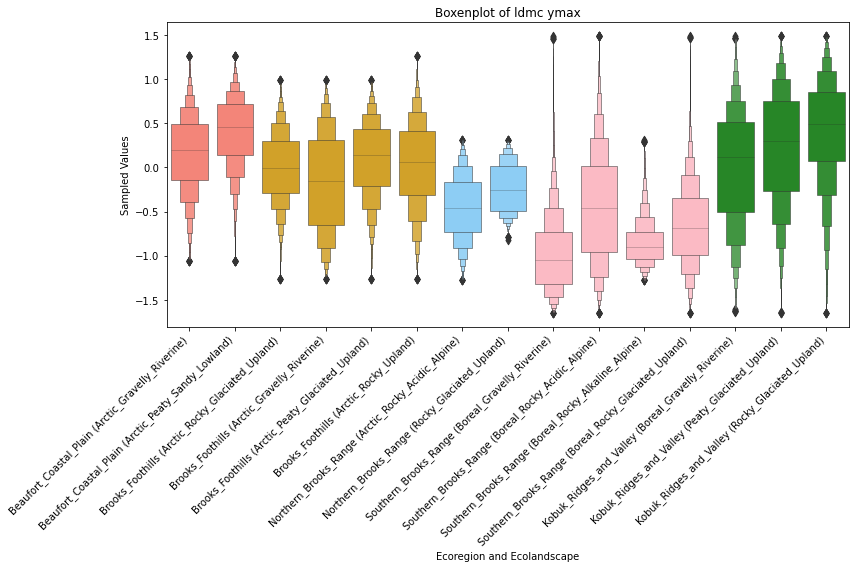

In [21]:
import os
import rasterio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
np.random.seed(42)
# Folder containing the .tif files
tif_folder = r'D:\wenqu\chapter1_2\figures\ecoregion\eco_lands\ldmc_ymax'

# Dictionary to map each .tif file to its corresponding ecoregion and sample points
tif_info = {
'Beaufort_Coastal_Plain_Arctic_Gravelly_Riverine_site6ab_ldmc_ymax.tif':('Beaufort_Coastal_Plain', 'Arctic_Gravelly_Riverine', 33497),
'Beaufort_Coastal_Plain_Arctic_Gravelly_Riverine_site6c_ldmc_ymax.tif':('Beaufort_Coastal_Plain', 'Arctic_Gravelly_Riverine',181197),   
'Beaufort_Coastal_Plain_Arctic_Gravelly_Riverine_site7_ldmc_ymax.tif':('Beaufort_Coastal_Plain', 'Arctic_Gravelly_Riverine', 183403),    
'Beaufort_Coastal_Plain_Arctic_Peaty_Sandy_Lowland_site6ab_ldmc_ymax.tif':('Beaufort_Coastal_Plain', 'Arctic_Peaty_Sandy_Lowland', 20401),
'Beaufort_Coastal_Plain_Arctic_Peaty_Sandy_Lowland_site7_ldmc_ymax.tif':('Beaufort_Coastal_Plain', 'Arctic_Peaty_Sandy_Lowland', 183403),  
'Beaufort_Coastal_Plain_Arctic_Peaty_Silty_Lowland_site6ab_ldmc_ymax.tif':('Beaufort_Coastal_Plain', 'Arctic_Peaty_Sandy_Lowland', 33497),   
'Beaufort_Coastal_Plain_Arctic_Peaty_Silty_Lowland_site6c_ldmc_ymax.tif':('Beaufort_Coastal_Plain', 'Arctic_Peaty_Sandy_Lowland', 181197), 
'Beaufort_Coastal_Plain_Arctic_Peaty_Silty_Lowland_site7_ldmc_ymax.tif':('Beaufort_Coastal_Plain', 'Arctic_Peaty_Sandy_Lowland', 183403),
'Brooks_Foothills_Arctic_Rocky_Glaciated_Upland_site4a_ldmc_ymax.tif':('Brooks_Foothills','Arctic_Rocky_Glaciated_Upland', 81225),
'Brooks_Foothills_Arctic_Rocky_Glaciated_Upland_site4b_ldmc_ymax.tif':('Brooks_Foothills', 'Arctic_Rocky_Glaciated_Upland', 220328),
'Brooks_Foothills_Arctic_Gravelly_Riverine_site4a_ldmc_ymax.tif':('Brooks_Foothills', 'Arctic_Gravelly_Riverine', 144299),
'Brooks_Foothills_Arctic_Gravelly_Riverine_site4b_ldmc_ymax.tif':('Brooks_Foothills', 'Arctic_Gravelly_Riverine', 220328),
'Brooks_Foothills_Arctic_Peaty_Glaciated_Upland_site4a_ldmc_ymax.tif':('Brooks_Foothills', 'Arctic_Peaty_Glaciated_Upland', 144299),  
'Brooks_Foothills_Arctic_Peaty_Glaciated_Upland_site4b_ldmc_ymax.tif':('Brooks_Foothills', 'Arctic_Peaty_Glaciated_Upland', 169308),
'Brooks_Foothills_Arctic_Rocky_Upland_site4a_ldmc_ymax.tif':('Brooks_Foothills', 'Arctic_Rocky_Upland', 13812),   
'Brooks_Foothills_Arctic_Rocky_Upland_site6c_ldmc_ymax.tif':('Brooks_Foothills', 'Arctic_Rocky_Upland', 6397), 
'Northern_Brooks_Range_Arctic_Rocky_Acidic_Alpine_site3b_ldmc_ymax.tif':('Northern_Brooks_Range', 'Arctic_Rocky_Acidic_Alpine', 607152), 
'Northern_Brooks_Range_Arctic_Rocky_Glaciated_Upland_site3b_ldmc_ymax.tif':('Northern_Brooks_Range', 'Rocky_Glaciated_Upland', 392847 ), 
'Southern_Brooks_Range_Boreal_Gravelly_Riverine_site2a_c_1b_ldmc_ymax.tif':('Southern_Brooks_Range', 'Boreal_Gravelly_Riverine', 232652),  
'Southern_Brooks_Range_Boreal_Gravelly_Riverine_site3b_ldmc_ymax.tif':('Southern_Brooks_Range', 'Boreal_Gravelly_Riverine', 86845), 
'Southern_Brooks_Range_Boreal_Rocky_Acidic_Alpine_site2a_c_1b_ldmc_ymax.tif':('Southern_Brooks_Range', 'Boreal_Rocky_Acidic_Alpine', 242746), 
'Southern_Brooks_Range_Boreal_Rocky_Acidic_Alpine_site3b_ldmc_ymax.tif':('Southern_Brooks_Range', 'Boreal_Rocky_Acidic_Alpine', 67786), 
'Southern_Brooks_Range_Boreal_Rocky_Alkaline_Alpine_site3b_ldmc_ymax.tif':('Southern_Brooks_Range', 'Boreal_Rocky_Alkaline_Alpine', 49196),  
'Southern_Brooks_Range_Boreal_Rocky_Glaciated_Upland_site2a_c_1b_ldmc_ymax.tif':('Southern_Brooks_Range', 'Boreal_Rocky_Glaciated_Upland', 232747),  
'Southern_Brooks_Range_Boreal_Rocky_Glaciated_Upland_site3b_ldmc_ymax.tif':('Southern_Brooks_Range', 'Boreal_Rocky_Glaciated_Upland', 88024),
'Kobuk_Ridges_and_Valley_Boreal_Gravelly_Riverine_site2a_c_1b_ldmc_ymax.tif':('Kobuk_Ridges_and_Valley', 'Boreal_Gravelly_Riverine', 356712),
'Kobuk_Ridges_and_Valley_Boreal_Peaty_Glaciated_Upland_site2a_c_1b_ldmc_ymax.tif':('Kobuk_Ridges_and_Valley', 'Peaty_Glaciated_Upland', 363506),
'Kobuk_Ridges_and_Valley_Boreal_Rocky_Glaciated_Upland_site2a_c_1b_ldmc_ymax.tif':('Kobuk_Ridges_and_Valley', 'Rocky_Glaciated_Upland', 279781)
}

# List to store the summarized data for each unique ecoregion and ecolandscape combination
ecoregion_values = {}

# Loop through all .tif files and sample the specified number of points
for tif_file, (ecoregion, ecolandscape, n_samples) in tif_info.items():
    tif_path = os.path.join(tif_folder, tif_file)
    
    if n_samples == 0:
        continue  # Skip files with zero sample points
    
    # Open the .tif file
    with rasterio.open(tif_path) as src:
        data = src.read(1)  # Read the raster data (assuming the first band)
        valid_mask = ~np.isnan(data)
        valid_indices = np.column_stack(np.where(valid_mask))
        
        if len(valid_indices) >= int(n_samples):
            sampled_indices = valid_indices[np.random.choice(len(valid_indices), int(n_samples), replace=False)]
        else:
            sampled_indices = valid_indices  # Take all points if less than required
        
        sampled_values = data[sampled_indices[:, 0], sampled_indices[:, 1]]
        
        key = (ecoregion, ecolandscape)
        if key not in ecoregion_values:
            ecoregion_values[key] = []
        
        ecoregion_values[key].extend(sampled_values)

# Convert the sampled values to a DataFrame for plotting
df_samples = pd.DataFrame({
    'Ecoregion': [ecoregion for (ecoregion, ecolandscape) in ecoregion_values.keys() for _ in ecoregion_values[(ecoregion, ecolandscape)]],
    'Ecolandscape': [ecolandscape for (ecoregion, ecolandscape) in ecoregion_values.keys() for _ in ecoregion_values[(ecoregion, ecolandscape)]],
    'Sampled Values': [value for values in ecoregion_values.values() for value in values]
})

# Combine Ecoregion and Ecolandscape for unique grouping
df_samples['Group'] = df_samples['Ecoregion'] + " (" + df_samples['Ecolandscape'] + ")"

# Define a specific color palette for each ecoregion with underscores matching the format in df_samples
color_map = {
    'Beaufort_Coastal_Plain': 'salmon',
    'Brooks_Foothills': 'goldenrod',
    'Northern_Brooks_Range': 'lightskyblue',
    'Southern_Brooks_Range': 'lightpink',
    'Kobuk_Ridges_and_Valley': 'forestgreen'
}

# Apply the specified color for each unique ecoregion across its different ecolandscapes
df_samples['Color'] = df_samples['Ecoregion'].map(lambda x: color_map.get(x, 'black'))

# Create the boxenplot grouped by the combined 'Group' (Ecoregion + Ecolandscape)
plt.figure(figsize=(12, 8))
sns.boxenplot(
    data=df_samples, 
    x='Group', 
    y='Sampled Values', 
    palette=df_samples.set_index('Group')['Color'].to_dict(),
    linewidth=.5, 
    saturation=0.9,
    trust_alpha=0.1
)

plt.title('Boxenplot of ldmc ymax')
plt.xlabel('Ecoregion and Ecolandscape')
plt.ylabel('Sampled Values')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig(r'D:\wenqu\chapter1_2\figures\ecolandsacpe_figures\Boxenplot of LDMC YMAX by Ecolandsacpe.png', dpi=300, bbox_inches='tight')
plt.show()

C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be

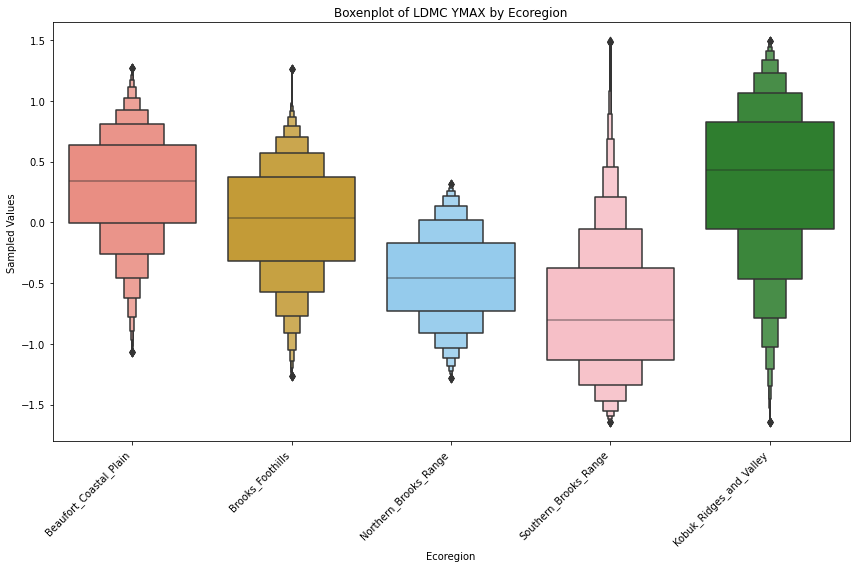

In [22]:
import os
import rasterio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(42)

# Folder containing the .tif files
tif_folder = r'D:\wenqu\chapter1_2\figures\ecoregion\eco_lands\ldmc_ymax'

# Dictionary to map each .tif file to its corresponding ecoregion and sample points
tif_info = {
    'Beaufort_Coastal_Plain_Arctic_Gravelly_Riverine_site6ab_ldmc_ymax.tif': ('Beaufort_Coastal_Plain', 33497),
    'Beaufort_Coastal_Plain_Arctic_Gravelly_Riverine_site6c_ldmc_ymax.tif': ('Beaufort_Coastal_Plain', 181197),   
    'Beaufort_Coastal_Plain_Arctic_Gravelly_Riverine_site7_ldmc_ymax.tif': ('Beaufort_Coastal_Plain', 183403),    
    'Beaufort_Coastal_Plain_Arctic_Peaty_Sandy_Lowland_site6ab_ldmc_ymax.tif': ('Beaufort_Coastal_Plain', 20401),
    'Beaufort_Coastal_Plain_Arctic_Peaty_Sandy_Lowland_site7_ldmc_ymax.tif': ('Beaufort_Coastal_Plain', 183403),  
    'Beaufort_Coastal_Plain_Arctic_Peaty_Silty_Lowland_site6ab_ldmc_ymax.tif': ('Beaufort_Coastal_Plain', 33497),   
    'Beaufort_Coastal_Plain_Arctic_Peaty_Silty_Lowland_site6c_ldmc_ymax.tif': ('Beaufort_Coastal_Plain', 181197), 
    'Beaufort_Coastal_Plain_Arctic_Peaty_Silty_Lowland_site7_ldmc_ymax.tif': ('Beaufort_Coastal_Plain', 183403),
    'Brooks_Foothills_Arctic_Rocky_Glaciated_Upland_site4a_ldmc_ymax.tif': ('Brooks_Foothills', 81225),
    'Brooks_Foothills_Arctic_Rocky_Glaciated_Upland_site4b_ldmc_ymax.tif': ('Brooks_Foothills', 220328),
    'Brooks_Foothills_Arctic_Gravelly_Riverine_site4a_ldmc_ymax.tif': ('Brooks_Foothills', 144299),
    'Brooks_Foothills_Arctic_Gravelly_Riverine_site4b_ldmc_ymax.tif': ('Brooks_Foothills', 220328),
    'Brooks_Foothills_Arctic_Peaty_Glaciated_Upland_site4a_ldmc_ymax.tif': ('Brooks_Foothills', 144299),  
    'Brooks_Foothills_Arctic_Peaty_Glaciated_Upland_site4b_ldmc_ymax.tif': ('Brooks_Foothills', 169308),
    'Brooks_Foothills_Arctic_Rocky_Upland_site4a_ldmc_ymax.tif': ('Brooks_Foothills', 13812),   
    'Brooks_Foothills_Arctic_Rocky_Upland_site6c_ldmc_ymax.tif': ('Brooks_Foothills', 6397), 
    'Northern_Brooks_Range_Arctic_Rocky_Acidic_Alpine_site3b_ldmc_ymax.tif': ('Northern_Brooks_Range', 607152), 
    'Northern_Brooks_Range_Arctic_Rocky_Glaciated_Upland_site3b_ldmc_ymax.tif': ('Northern_Brooks_Range', 392847), 
    'Southern_Brooks_Range_Boreal_Gravelly_Riverine_site2a_c_1b_ldmc_ymax.tif': ('Southern_Brooks_Range', 232652),  
    'Southern_Brooks_Range_Boreal_Gravelly_Riverine_site3b_ldmc_ymax.tif': ('Southern_Brooks_Range', 86845), 
    'Southern_Brooks_Range_Boreal_Rocky_Acidic_Alpine_site2a_c_1b_ldmc_ymax.tif': ('Southern_Brooks_Range', 242746), 
    'Southern_Brooks_Range_Boreal_Rocky_Acidic_Alpine_site3b_ldmc_ymax.tif': ('Southern_Brooks_Range', 67786), 
    'Southern_Brooks_Range_Boreal_Rocky_Alkaline_Alpine_site3b_ldmc_ymax.tif': ('Southern_Brooks_Range', 49196),  
    'Southern_Brooks_Range_Boreal_Rocky_Glaciated_Upland_site2a_c_1b_ldmc_ymax.tif': ('Southern_Brooks_Range', 232747),  
    'Southern_Brooks_Range_Boreal_Rocky_Glaciated_Upland_site3b_ldmc_ymax.tif': ('Southern_Brooks_Range', 88024),
    'Kobuk_Ridges_and_Valley_Boreal_Gravelly_Riverine_site2a_c_1b_ldmc_ymax.tif': ('Kobuk_Ridges_and_Valley', 356712),
    'Kobuk_Ridges_and_Valley_Boreal_Peaty_Glaciated_Upland_site2a_c_1b_ldmc_ymax.tif': ('Kobuk_Ridges_and_Valley', 363506),
    'Kobuk_Ridges_and_Valley_Boreal_Rocky_Glaciated_Upland_site2a_c_1b_ldmc_ymax.tif': ('Kobuk_Ridges_and_Valley', 279781)
}

# List to store the summarized data for each unique ecoregion
ecoregion_values = {}

# Loop through all .tif files and sample the specified number of points
for tif_file, (ecoregion, n_samples) in tif_info.items():
    tif_path = os.path.join(tif_folder, tif_file)
    
    if n_samples == 0:
        continue  # Skip files with zero sample points
    
    # Open the .tif file
    with rasterio.open(tif_path) as src:
        data = src.read(1)  # Read the raster data (assuming the first band)
        valid_mask = ~np.isnan(data)
        valid_indices = np.column_stack(np.where(valid_mask))
        
        if len(valid_indices) >= int(n_samples):
            sampled_indices = valid_indices[np.random.choice(len(valid_indices), int(n_samples), replace=False)]
        else:
            sampled_indices = valid_indices  # Take all points if less than required
        
        sampled_values = data[sampled_indices[:, 0], sampled_indices[:, 1]]
        
        if ecoregion not in ecoregion_values:
            ecoregion_values[ecoregion] = []
        
        ecoregion_values[ecoregion].extend(sampled_values)

# Convert the sampled values to a DataFrame for plotting
df_samples = pd.DataFrame({
    'Ecoregion': [ecoregion for ecoregion in ecoregion_values.keys() for _ in ecoregion_values[ecoregion]],
    'Sampled Values': [value for values in ecoregion_values.values() for value in values]
})

# Define a specific color palette for each ecoregion
color_map = {
    'Beaufort_Coastal_Plain': 'salmon',
    'Brooks_Foothills': 'goldenrod',
    'Northern_Brooks_Range': 'lightskyblue',
    'Southern_Brooks_Range': 'lightpink',
    'Kobuk_Ridges_and_Valley': 'forestgreen'
}

# Apply the specified color for each ecoregion
df_samples['Color'] = df_samples['Ecoregion'].map(lambda x: color_map.get(x, 'black'))

# Create a palette dictionary for Seaborn
palette = {ecoregion: color_map[ecoregion] for ecoregion in df_samples['Ecoregion'].unique()}

# Create the boxenplot grouped by ecoregion
plt.figure(figsize=(12, 8))
sns.boxenplot(
    data=df_samples, 
    x='Ecoregion', 
    y='Sampled Values', 
    palette=palette
)

plt.title('Boxenplot of LDMC YMAX by Ecoregion')
plt.xlabel('Ecoregion')
plt.ylabel('Sampled Values')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig(r'D:\wenqu\chapter1_2\figures\ecolandsacpe_figures\Boxenplot of LDMC YMAX by Ecoregion.png', dpi=300, bbox_inches='tight')
plt.show()


# LDMC STD

C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be

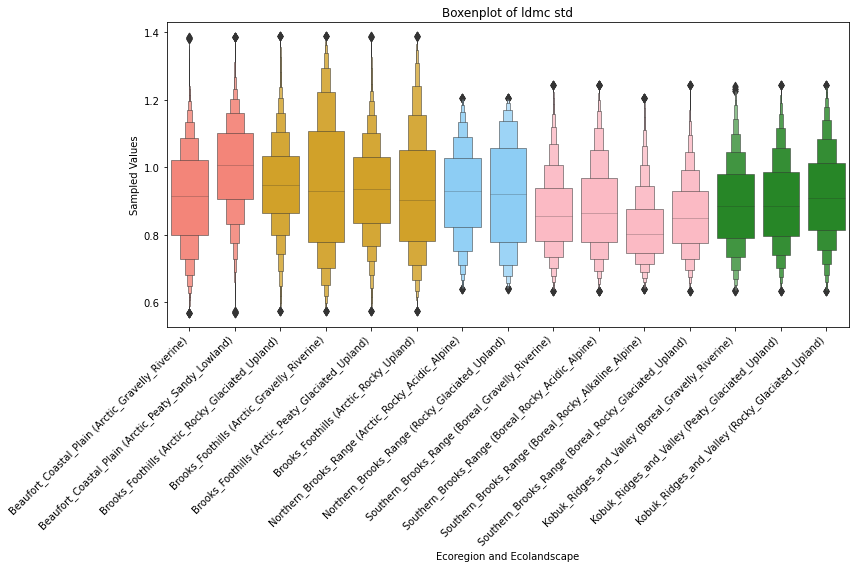

In [23]:
import os
import rasterio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
np.random.seed(42)
# Folder containing the .tif files
tif_folder = r'D:\wenqu\chapter1_2\figures\ecoregion\eco_lands\ldmc_std'

# Dictionary to map each .tif file to its corresponding ecoregion and sample points
tif_info = {
'Beaufort_Coastal_Plain_Arctic_Gravelly_Riverine_site6ab_ldmc_std.tif':('Beaufort_Coastal_Plain', 'Arctic_Gravelly_Riverine', 33497),
'Beaufort_Coastal_Plain_Arctic_Gravelly_Riverine_site6c_ldmc_std.tif':('Beaufort_Coastal_Plain', 'Arctic_Gravelly_Riverine',181197),   
'Beaufort_Coastal_Plain_Arctic_Gravelly_Riverine_site7_ldmc_std.tif':('Beaufort_Coastal_Plain', 'Arctic_Gravelly_Riverine', 183403),    
'Beaufort_Coastal_Plain_Arctic_Peaty_Sandy_Lowland_site6ab_ldmc_std.tif':('Beaufort_Coastal_Plain', 'Arctic_Peaty_Sandy_Lowland', 20401),
'Beaufort_Coastal_Plain_Arctic_Peaty_Sandy_Lowland_site7_ldmc_std.tif':('Beaufort_Coastal_Plain', 'Arctic_Peaty_Sandy_Lowland', 183403),  
'Beaufort_Coastal_Plain_Arctic_Peaty_Silty_Lowland_site6ab_ldmc_std.tif':('Beaufort_Coastal_Plain', 'Arctic_Peaty_Sandy_Lowland', 33497),   
'Beaufort_Coastal_Plain_Arctic_Peaty_Silty_Lowland_site6c_ldmc_std.tif':('Beaufort_Coastal_Plain', 'Arctic_Peaty_Sandy_Lowland', 181197), 
'Beaufort_Coastal_Plain_Arctic_Peaty_Silty_Lowland_site7_ldmc_std.tif':('Beaufort_Coastal_Plain', 'Arctic_Peaty_Sandy_Lowland', 183403),
'Brooks_Foothills_Arctic_Rocky_Glaciated_Upland_site4a_ldmc_std.tif':('Brooks_Foothills','Arctic_Rocky_Glaciated_Upland', 81225),
'Brooks_Foothills_Arctic_Rocky_Glaciated_Upland_site4b_ldmc_std.tif':('Brooks_Foothills', 'Arctic_Rocky_Glaciated_Upland', 220328),
'Brooks_Foothills_Arctic_Gravelly_Riverine_site4a_ldmc_std.tif':('Brooks_Foothills', 'Arctic_Gravelly_Riverine', 144299),
'Brooks_Foothills_Arctic_Gravelly_Riverine_site4b_ldmc_std.tif':('Brooks_Foothills', 'Arctic_Gravelly_Riverine', 220328),
'Brooks_Foothills_Arctic_Peaty_Glaciated_Upland_site4a_ldmc_std.tif':('Brooks_Foothills', 'Arctic_Peaty_Glaciated_Upland', 144299),  
'Brooks_Foothills_Arctic_Peaty_Glaciated_Upland_site4b_ldmc_std.tif':('Brooks_Foothills', 'Arctic_Peaty_Glaciated_Upland', 169308),
'Brooks_Foothills_Arctic_Rocky_Upland_site4a_ldmc_std.tif':('Brooks_Foothills', 'Arctic_Rocky_Upland', 13812),   
'Brooks_Foothills_Arctic_Rocky_Upland_site6c_ldmc_std.tif':('Brooks_Foothills', 'Arctic_Rocky_Upland', 6397), 
'Northern_Brooks_Range_Arctic_Rocky_Acidic_Alpine_site3b_ldmc_std.tif':('Northern_Brooks_Range', 'Arctic_Rocky_Acidic_Alpine', 607152), 
'Northern_Brooks_Range_Arctic_Rocky_Glaciated_Upland_site3b_ldmc_std.tif':('Northern_Brooks_Range', 'Rocky_Glaciated_Upland', 392847 ), 
'Southern_Brooks_Range_Boreal_Gravelly_Riverine_site2a_c_1b_ldmc_std.tif':('Southern_Brooks_Range', 'Boreal_Gravelly_Riverine', 232652),  
'Southern_Brooks_Range_Boreal_Gravelly_Riverine_site3b_ldmc_std.tif':('Southern_Brooks_Range', 'Boreal_Gravelly_Riverine', 86845), 
'Southern_Brooks_Range_Boreal_Rocky_Acidic_Alpine_site2a_c_1b_ldmc_std.tif':('Southern_Brooks_Range', 'Boreal_Rocky_Acidic_Alpine', 242746), 
'Southern_Brooks_Range_Boreal_Rocky_Acidic_Alpine_site3b_ldmc_std.tif':('Southern_Brooks_Range', 'Boreal_Rocky_Acidic_Alpine', 67786), 
'Southern_Brooks_Range_Boreal_Rocky_Alkaline_Alpine_site3b_ldmc_std.tif':('Southern_Brooks_Range', 'Boreal_Rocky_Alkaline_Alpine', 49196),  
'Southern_Brooks_Range_Boreal_Rocky_Glaciated_Upland_site2a_c_1b_ldmc_std.tif':('Southern_Brooks_Range', 'Boreal_Rocky_Glaciated_Upland', 232747),  
'Southern_Brooks_Range_Boreal_Rocky_Glaciated_Upland_site3b_ldmc_std.tif':('Southern_Brooks_Range', 'Boreal_Rocky_Glaciated_Upland', 88024),
'Kobuk_Ridges_and_Valley_Boreal_Gravelly_Riverine_site2a_c_1b_ldmc_std.tif':('Kobuk_Ridges_and_Valley', 'Boreal_Gravelly_Riverine', 356712),
'Kobuk_Ridges_and_Valley_Boreal_Peaty_Glaciated_Upland_site2a_c_1b_ldmc_std.tif':('Kobuk_Ridges_and_Valley', 'Peaty_Glaciated_Upland', 363506),
'Kobuk_Ridges_and_Valley_Boreal_Rocky_Glaciated_Upland_site2a_c_1b_ldmc_std.tif':('Kobuk_Ridges_and_Valley', 'Rocky_Glaciated_Upland', 279781)
}

# List to store the summarized data for each unique ecoregion and ecolandscape combination
ecoregion_values = {}

# Loop through all .tif files and sample the specified number of points
for tif_file, (ecoregion, ecolandscape, n_samples) in tif_info.items():
    tif_path = os.path.join(tif_folder, tif_file)
    
    if n_samples == 0:
        continue  # Skip files with zero sample points
    
    # Open the .tif file
    with rasterio.open(tif_path) as src:
        data = src.read(1)  # Read the raster data (assuming the first band)
        valid_mask = ~np.isnan(data)
        valid_indices = np.column_stack(np.where(valid_mask))
        
        if len(valid_indices) >= int(n_samples):
            sampled_indices = valid_indices[np.random.choice(len(valid_indices), int(n_samples), replace=False)]
        else:
            sampled_indices = valid_indices  # Take all points if less than required
        
        sampled_values = data[sampled_indices[:, 0], sampled_indices[:, 1]]
        
        key = (ecoregion, ecolandscape)
        if key not in ecoregion_values:
            ecoregion_values[key] = []
        
        ecoregion_values[key].extend(sampled_values)

# Convert the sampled values to a DataFrame for plotting
df_samples = pd.DataFrame({
    'Ecoregion': [ecoregion for (ecoregion, ecolandscape) in ecoregion_values.keys() for _ in ecoregion_values[(ecoregion, ecolandscape)]],
    'Ecolandscape': [ecolandscape for (ecoregion, ecolandscape) in ecoregion_values.keys() for _ in ecoregion_values[(ecoregion, ecolandscape)]],
    'Sampled Values': [value for values in ecoregion_values.values() for value in values]
})

# Combine Ecoregion and Ecolandscape for unique grouping
df_samples['Group'] = df_samples['Ecoregion'] + " (" + df_samples['Ecolandscape'] + ")"

# Define a specific color palette for each ecoregion with underscores matching the format in df_samples
color_map = {
    'Beaufort_Coastal_Plain': 'salmon',
    'Brooks_Foothills': 'goldenrod',
    'Northern_Brooks_Range': 'lightskyblue',
    'Southern_Brooks_Range': 'lightpink',
    'Kobuk_Ridges_and_Valley': 'forestgreen'
}

# Apply the specified color for each unique ecoregion across its different ecolandscapes
df_samples['Color'] = df_samples['Ecoregion'].map(lambda x: color_map.get(x, 'black'))

# Create the boxenplot grouped by the combined 'Group' (Ecoregion + Ecolandscape)
plt.figure(figsize=(12, 8))
sns.boxenplot(
    data=df_samples, 
    x='Group', 
    y='Sampled Values', 
    palette=df_samples.set_index('Group')['Color'].to_dict(),
    linewidth=.5, 
    saturation=0.9,
    trust_alpha=0.1
)

plt.title('Boxenplot of ldmc std')
plt.xlabel('Ecoregion and Ecolandscape')
plt.ylabel('Sampled Values')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig(r'D:\wenqu\chapter1_2\figures\ecolandsacpe_figures\Boxenplot of LDMC STD by Ecolandscape.png', dpi=300, bbox_inches='tight')
plt.show()

C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be

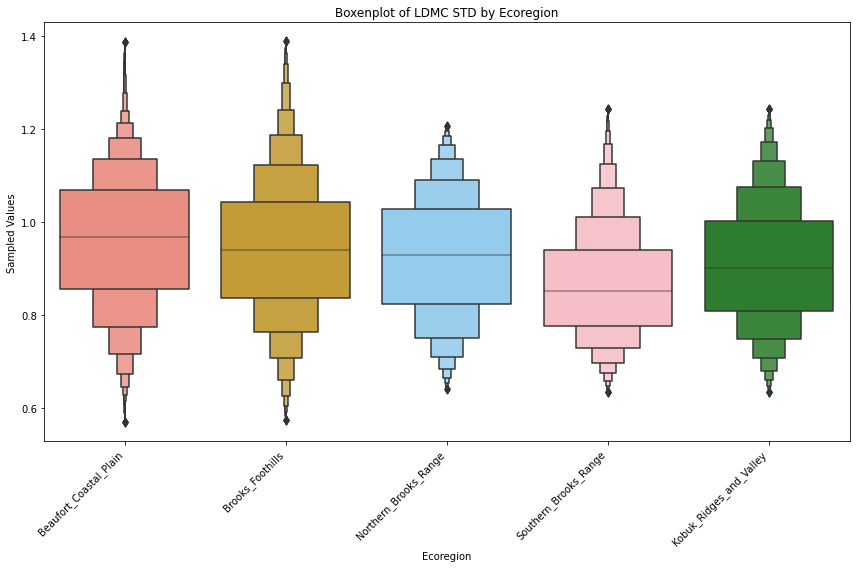

In [24]:
import os
import rasterio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(42)

# Folder containing the .tif files
tif_folder = r'D:\wenqu\chapter1_2\figures\ecoregion\eco_lands\ldmc_std'

# Dictionary to map each .tif file to its corresponding ecoregion and sample points
tif_info = {
    'Beaufort_Coastal_Plain_Arctic_Gravelly_Riverine_site6ab_ldmc_std.tif': ('Beaufort_Coastal_Plain', 33497),
    'Beaufort_Coastal_Plain_Arctic_Gravelly_Riverine_site6c_ldmc_std.tif': ('Beaufort_Coastal_Plain', 181197),
    'Beaufort_Coastal_Plain_Arctic_Gravelly_Riverine_site7_ldmc_std.tif': ('Beaufort_Coastal_Plain', 183403),
    'Beaufort_Coastal_Plain_Arctic_Peaty_Sandy_Lowland_site6ab_ldmc_std.tif': ('Beaufort_Coastal_Plain', 20401),
    'Beaufort_Coastal_Plain_Arctic_Peaty_Sandy_Lowland_site7_ldmc_std.tif': ('Beaufort_Coastal_Plain', 183403),
    'Beaufort_Coastal_Plain_Arctic_Peaty_Silty_Lowland_site6ab_ldmc_std.tif': ('Beaufort_Coastal_Plain', 33497),
    'Beaufort_Coastal_Plain_Arctic_Peaty_Silty_Lowland_site6c_ldmc_std.tif': ('Beaufort_Coastal_Plain', 181197),
    'Beaufort_Coastal_Plain_Arctic_Peaty_Silty_Lowland_site7_ldmc_std.tif': ('Beaufort_Coastal_Plain', 183403),
    'Brooks_Foothills_Arctic_Rocky_Glaciated_Upland_site4a_ldmc_std.tif': ('Brooks_Foothills', 81225),
    'Brooks_Foothills_Arctic_Rocky_Glaciated_Upland_site4b_ldmc_std.tif': ('Brooks_Foothills', 220328),
    'Brooks_Foothills_Arctic_Gravelly_Riverine_site4a_ldmc_std.tif': ('Brooks_Foothills', 144299),
    'Brooks_Foothills_Arctic_Gravelly_Riverine_site4b_ldmc_std.tif': ('Brooks_Foothills', 220328),
    'Brooks_Foothills_Arctic_Peaty_Glaciated_Upland_site4a_ldmc_std.tif': ('Brooks_Foothills', 144299),
    'Brooks_Foothills_Arctic_Peaty_Glaciated_Upland_site4b_ldmc_std.tif': ('Brooks_Foothills', 169308),
    'Brooks_Foothills_Arctic_Rocky_Upland_site4a_ldmc_std.tif': ('Brooks_Foothills', 13812),
    'Brooks_Foothills_Arctic_Rocky_Upland_site6c_ldmc_std.tif': ('Brooks_Foothills', 6397),
    'Northern_Brooks_Range_Arctic_Rocky_Acidic_Alpine_site3b_ldmc_std.tif': ('Northern_Brooks_Range', 607152),
    'Northern_Brooks_Range_Arctic_Rocky_Glaciated_Upland_site3b_ldmc_std.tif': ('Northern_Brooks_Range', 392847),
    'Southern_Brooks_Range_Boreal_Gravelly_Riverine_site2a_c_1b_ldmc_std.tif': ('Southern_Brooks_Range', 232652),
    'Southern_Brooks_Range_Boreal_Gravelly_Riverine_site3b_ldmc_std.tif': ('Southern_Brooks_Range', 86845),
    'Southern_Brooks_Range_Boreal_Rocky_Acidic_Alpine_site2a_c_1b_ldmc_std.tif': ('Southern_Brooks_Range', 242746),
    'Southern_Brooks_Range_Boreal_Rocky_Acidic_Alpine_site3b_ldmc_std.tif': ('Southern_Brooks_Range', 67786),
    'Southern_Brooks_Range_Boreal_Rocky_Alkaline_Alpine_site3b_ldmc_std.tif': ('Southern_Brooks_Range', 49196),
    'Southern_Brooks_Range_Boreal_Rocky_Glaciated_Upland_site2a_c_1b_ldmc_std.tif': ('Southern_Brooks_Range', 232747),
    'Southern_Brooks_Range_Boreal_Rocky_Glaciated_Upland_site3b_ldmc_std.tif': ('Southern_Brooks_Range', 88024),
    'Kobuk_Ridges_and_Valley_Boreal_Gravelly_Riverine_site2a_c_1b_ldmc_std.tif': ('Kobuk_Ridges_and_Valley', 356712),
    'Kobuk_Ridges_and_Valley_Boreal_Peaty_Glaciated_Upland_site2a_c_1b_ldmc_std.tif': ('Kobuk_Ridges_and_Valley', 363506),
    'Kobuk_Ridges_and_Valley_Boreal_Rocky_Glaciated_Upland_site2a_c_1b_ldmc_std.tif': ('Kobuk_Ridges_and_Valley', 279781)
}

# List to store the summarized data for each unique ecoregion
ecoregion_values = {}

# Loop through all .tif files and sample the specified number of points
for tif_file, (ecoregion, n_samples) in tif_info.items():
    tif_path = os.path.join(tif_folder, tif_file)
    
    if n_samples == 0:
        continue  # Skip files with zero sample points
    
    # Open the .tif file
    with rasterio.open(tif_path) as src:
        data = src.read(1)  # Read the raster data (assuming the first band)
        valid_mask = ~np.isnan(data)
        valid_indices = np.column_stack(np.where(valid_mask))
        
        if len(valid_indices) >= int(n_samples):
            sampled_indices = valid_indices[np.random.choice(len(valid_indices), int(n_samples), replace=False)]
        else:
            sampled_indices = valid_indices  # Take all points if less than required
        
        sampled_values = data[sampled_indices[:, 0], sampled_indices[:, 1]]
        
        if ecoregion not in ecoregion_values:
            ecoregion_values[ecoregion] = []
        
        ecoregion_values[ecoregion].extend(sampled_values)

# Convert the sampled values to a DataFrame for plotting
df_samples = pd.DataFrame({
    'Ecoregion': [ecoregion for ecoregion in ecoregion_values.keys() for _ in ecoregion_values[ecoregion]],
    'Sampled Values': [value for values in ecoregion_values.values() for value in values]
})

# Define a specific color palette for each ecoregion
color_map = {
    'Beaufort_Coastal_Plain': 'salmon',
    'Brooks_Foothills': 'goldenrod',
    'Northern_Brooks_Range': 'lightskyblue',
    'Southern_Brooks_Range': 'lightpink',
    'Kobuk_Ridges_and_Valley': 'forestgreen'
}

# Apply the specified color for each ecoregion
df_samples['Color'] = df_samples['Ecoregion'].map(lambda x: color_map.get(x, 'black'))

# Create a palette dictionary for Seaborn
palette = {ecoregion: color_map[ecoregion] for ecoregion in df_samples['Ecoregion'].unique()}

# Create the boxenplot grouped by ecoregion
plt.figure(figsize=(12, 8))
sns.boxenplot(
    data=df_samples, 
    x='Ecoregion', 
    y='Sampled Values', 
    palette=palette
)

plt.title('Boxenplot of LDMC STD by Ecoregion')
plt.xlabel('Ecoregion')
plt.ylabel('Sampled Values')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig(r'D:\wenqu\chapter1_2\figures\ecolandsacpe_figures\Boxenplot of LDMC Std by Ecoregion.png', dpi=300, bbox_inches='tight')
plt.show()
